In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pickle
import h5py
import loadTDT as tdt
import scipy
from scipy import signal
from scipy.signal import detrend
import statsmodels.formula.api as smf
from scipy.signal import resample
from scipy.signal import medfilt
from scipy.signal import butter
from scipy.signal import filtfilt
from scipy.ndimage import median
from statsmodels import robust
from scipy import ndimage, misc
from scipy.stats import levene, ttest_ind
from scipy.ndimage import gaussian_filter1d
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import matplotlib.patches as patches
sns.set_context("poster")

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
from util import *
# from util_newest import *
from behavior_utils import *

In [3]:
ggp=np.array([[0.133     , 0.133     , 0.133     , 1.        ],
       [0.22953434, 0.57685998, 0.42976558, 1.        ],
       [0.57609486, 0.42953354, 0.90002989, 1.        ]])
pal2=[(ggp[1][0],ggp[1][1],ggp[1][2]),
       (ggp[2][0],ggp[2][1],ggp[2][2])]

In [4]:
#pickle.dump(alldat, open("alldat.p","wb"))
alldat = pickle.load(open('alldat.p','rb'),encoding='latin')

In [5]:
SI_values = [0.923146667,
5.694566667,
8.174833333,
15.38203333,
17.23946667,
17.9068,
19.91993333,
21.0655,
21.59936667,
22.9674,
23.8683,
26.3597,
29.34046667,
30.08563333,
31.84296667,
34.63466667,
35.035,
37.19266667,
37.33733333,
38.88333333,
41.80833333,
44.65566667,
46.01266667,
47.61433333,
48.64866667,
51.307,
53.231,
55.44313333,
60.00433333,
64.07533333,
68.424,
71.16,
72.58366667,
75.13066667,
85.21866667]


r2s =[3819,
3786,
3815,
3811,
3793,
3802,
3801,
3775,
3771,
3827,
3799,
3825,
3795,
3807,
3788,
3800,
3772,
3776,
3752,
3785,
3824,
3806,
3804,
3789,
3774,
3814,
3810,
3754,
3784,
3779,
3783,
3778,
3803,
3780,
3809]

# cutoff for resilience based on distribution from controls
RFCUTOFF=20

#metadat=pd.read_csv('/jukebox/witten/Anna/fig_data_plotting_code/QuantifyingDefeat-main/si_sucrose_tt_anna_all.csv')
metadat=pd.read_csv('si_sucrose_tt_anna_all.csv')

In [445]:
SI_values_rf = [0.923146667,
5.694566667,
8.174833333,
15.38203333,
17.23946667,
17.9068,
18.07363333,
18.94116667,
19.91993333,
20.83193333,
21.0655,
21.59936667,
22.9674,
23.8683,
24.53563333,
26.3597,
29.34046667,
30.08563333,
31.84296667,
33.24436667,
33.2666,
33.61133333,
34.63466667,
35.035,
35.291,
37.19266667,
37.33733333,
37.62666667,
37.97133333,
38.88333333,
40.51833333,
40.71833333,
41.80833333,
41.90866667,
43.143,
44.36666667,
44.65566667,
45.07833333,
45.49,
45.81233333,
46.01266667,
46.37966667,
46.82466667,
47.34733333,
47.61433333,
47.65866667,
47.79233333,
47.92566667,
48.18166667,
48.34833333,
48.64866667,
49.26033333,
49.70533333,
49.80533333,
49.81633333,
51.09566667,
51.307,
52.55266667,
52.71933333,
53.231,
55.44313333,
55.789,
57.34633333,
59.54833333,
60.00433333,
60.327,
62.37333333,
62.596,
63.152,
64.07533333,
68.424,
71.16,
72.58366667,
75.13066667,
85.21866667]

r2s_rf=[3819,
3786,
3815,
3811,
3793,
3802,
4121,
4102,
3801,
4120,
3775,
3771,
3827,
3799,
4101,
3825,
3795,
3807,
3788,
4123,
111755,
111753,
3800,
3772,
4112,
3776,
3752,
111759,
111758,
3785,
4110,
107501,
3824,
111765,
4103,
4119,
3806,
111757,
111762,
4111,
3804,
4118,
111763,
111750,
3789,
107504,
4122,
4109,
4115,
111761,
3774,
111751,
4113,
111752,
4104,
111764,
3814,
4114,
111754,
3810,
3754,
111745,
4108,
111760,
3784,
4105,
4124,
111766,
111756,
3779,
3783,
3778,
3803,
3780,
3809]

# cutoff for resilience based on distribution from controls
RFCUTOFF_rf=33

#metadat_rf=pd.read_csv('/jukebox/witten/Anna/fig_data_plotting_code/QuantifyingDefeat-main/si_sucrose_tt_FP_fos1_fos2.csv')
metadat_rf=pd.read_csv('si_sucrose_tt_FP_fos1_fos2.csv')

In [134]:
## Random forest classifiers
import pickle
#rfs = pickle.load(open('rfs_2101_new_behaviors.p','rb'),encoding='latin')
rfs = pickle.load(open('rfs_2202_new_behaviors.p','rb'),encoding='latin')
rfs_old = pickle.load(open('rfs_2101_old_behaviors.p','rb'),encoding='latin')
rf_anna_old = pickle.load(open('rf_scores_2.p','rb'),encoding='latin')
#rf_anna_new = pickle.load(open('/jukebox/witten/Anna/fig_data_plotting_code/QuantifyingDefeat-main/QuantifyBehavior/rf_scores_new0423.p','rb'),encoding='latin')
rf_anna_new = pickle.load(open('rf_scores_new0423.p','rb'),encoding='latin')
#rf_anna_new = pickle.load(open('/jukebox/witten/Anna/Social_Defeat/RF/rfs_2304_new_behaviors.p','rb'),encoding='latin')
#rf_anna = pickle.load(open('/jukebox/witten/Anna/fig_data_plotting_code/QuantifyingDefeat-main/QuantifyBehavior/rf_scores.p','rb'),encoding='latin')
rf_anna = pickle.load(open('rf_scores.p','rb'),encoding='latin')
#rf_im = pickle.load(open('/jukebox/witten/Anna/Social_Defeat/RF/rf_scores_anna_imaging.p','rb'),encoding='latin')
#rf_im_new = pickle.load(open('rf_scores_imaging_new.p','rb'),encoding='latin')
#rf_im_new = pickle.load(open('/jukebox/witten/Anna/fig_data_plotting_code/QuantifyingDefeat-main/QuantifyBehavior/rf_scores_newimaging_AND_fp.p','rb'),encoding='latin')
rf_fos1 = pickle.load(open('rf_scores_fos1.p','rb'),encoding='latin')
rf_fos2 = pickle.load(open('rf_scores_fos2.p','rb'),encoding='latin')

In [135]:
#behaviors = ['e','a','x','s','z','i','t','f','d','w','p','r']
behaviors = ['e','a','x','s','z','i','t','f','d','w','p','u']
rf_scores = {}
for k in rf_anna.keys():
    m = k[1:5]
    if k[11] == '0':
        d = k[10:12]
        #print('10')
    else:
        #print('<10')
        d = k[10]    
    rf_scores[(int(m),int(d))] = {}
    for b in behaviors:
        rf_scores[(int(m),int(d))][b]=rf_anna[k][b]

In [136]:
behaviors = ['e','a','x','s','z','i','t','f','d','w','p','r']
rf_scores_old = {}
for k in rf_anna_old.keys():
    m = k[1:5]
    if k[11] == '0':
        d = k[10:12]
        #print('10')
    else:
        #print('<10')
        d = k[10]    
    rf_scores_old[(int(m),int(d))] = {}
    for b in behaviors:
        rf_scores_old[(int(m),int(d))][b]=rf_anna_old[k][b]

In [137]:
behaviors = ['e','a','x','s','z','i','f','u']
rf_scores_new = {}
for k in rf_anna_new.keys():
    m = k[1:5]
    if k[11] == '0':
        d = k[10:12]
        #print('10')
    else:
        #print('<10')
        d = k[10]    
    rf_scores_new[(int(m),int(d))] = {}
    for b in behaviors:
        rf_scores_new[(int(m),int(d))][b]=rf_anna_new[k][b]

In [138]:
behaviors = ['e','a','x','s','z','i','f','u']
rf_scores_fos1 = {}
for k in rf_fos1.keys():
    m = k[0]
    d = k[1]
    rf_scores_fos1[(int(m),int(d))] = {}
    for b in behaviors:
        rf_scores_fos1[(int(m),int(d))][b]=rf_fos1[k][b]

In [139]:
behaviors = ['e','a','x','s','z','i','f','u']
rf_scores_fos2 = {}
for k in rf_fos2.keys():
    m = k[0][1:5]
    d = k[1]
    rf_scores_fos2[(int(m),int(d))] = {}
    for b in behaviors:
        rf_scores_fos2[(int(m),int(d))][b]=rf_fos2[k][b]

In [140]:
rf_scores_all = rf_scores
def Merge(dict1, dict2):
    return(dict2.update(dict1))

Merge(rf_scores_fos1,rf_scores_all)
Merge(rf_scores_fos2,rf_scores_all)
#Merge(rf_scores_im_new,rf_scores_all)

In [447]:
FS=100
rf_totals = {'m':[],'d':[],'t':[],'b':[],'r2s':[],'rb':[]}
fight_check = {'m':[],'d':[],'r2s':[],'rb':[],'F':[],'T':[],'f':[],'a':[],'si':[],'r':[],'R':[]}
total_time = 5*60*FS
for i,m in enumerate(r2s_rf):
    for d in range(1,11):
        if (m,d) not in rf_scores_all:
            continue
        rf=rf_scores_all[(m,d)]
        for b,l in rf.items():
            t=l
            rf_totals['b'].append(b)
            rf_totals['m'].append(str(m))
            rf_totals['d'].append(d)
            rf_totals['t'].append(np.sum(t)/len(t))
            rf_totals['r2s'].append(i)
            rf_totals['rb'].append(i>=RFCUTOFF_rf)
        #a=rf['attack']
        a=rf['a']
        #b=np.logical_and(a,rf['fightback'])
        b=np.logical_and(a,rf['f'])
        rf_totals['b'].append('fightWhenAttacked')
        #rf_totals['b'].append('f')
        rf_totals['m'].append(str(m))
        rf_totals['d'].append(d)
        rf_totals['t'].append(np.sum(b)/np.sum(a))
        rf_totals['r2s'].append(i)
        rf_totals['rb'].append(i>=RFCUTOFF_rf)
        
        #a=rf['attack']
        a=rf['a']
        #b=np.logical_and(a,rf['runaway'])
        b=np.logical_and(a,rf['x'])
        rf_totals['b'].append('fleeWhenAttacked')
        #rf_totals['b'].append('x')
        rf_totals['m'].append(str(m))
        rf_totals['d'].append(d)
        rf_totals['t'].append(np.sum(b)/np.sum(a))
        rf_totals['r2s'].append(i)
        rf_totals['rb'].append(i>=RFCUTOFF_rf)

        
        fight_check['m'].append(str(m))
        fight_check['d'].append(d)
        fight_check['r2s'].append(i)
        fight_check['rb'].append(i>=RFCUTOFF)
        #fight_check['F'].append(np.sum(rf['fightback']))
        fight_check['F'].append(np.sum(rf['f']))
        fight_check['T'].append(len(t))
        #fight_check['f'].append(np.sum(np.logical_and(rf['attack'],rf['fightback'])))
        fight_check['f'].append(np.sum(np.logical_and(rf['a'],rf['f'])))
        #fight_check['a'].append(np.sum(rf['attack']))
        fight_check['a'].append(np.sum(rf['a']))
        fight_check['si'].append(SI_values_rf[i])
        #fight_check['R'].append(np.sum(rf['runaway']))
        fight_check['R'].append(np.sum(rf['x']))
        #fight_check['r'].append(np.sum(np.logical_and(rf['attack'],rf['runaway'])))
        fight_check['r'].append(np.sum(np.logical_and(rf['a'],rf['x'])))
        
fight_check_df=pd.DataFrame(fight_check)
rf_df=pd.DataFrame(rf_totals)
rf_df.m=rf_df.m.astype(int)
rf_df = pd.merge(metadat_rf,rf_df,left_on='Mouse',right_on='m')

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

750
42 33
being attacked 1 0.037359485739782344 0.9703003529973485
42 33
being attacked 2 0.40732678190280863 0.6849599912746795
42 33
being attacked 3 0.3986286968865808 0.6913304275141199
42 33
being attacked 4 0.7822535050267682 0.43659568287243766
42 33
being attacked 5 0.5645424383822762 0.5741156649932455
42 33
being attacked 6 0.7599268567533691 0.44974559604539943
42 33
being attacked 7 1.0124790026533832 0.3146532391024692
42 33
being attacked 8 -1.283485689046633 0.20338136922773167
42 33
being attacked 9 1.5514035416709606 0.12512986746180407
42 33
being attacked 10 0.07848553028060695 0.9376565814770761
being attacked [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  750
Model:                                 GEE   No. clusters:                       75
Method:                        Generalized   Min

42 33
fighting while attacked 7 -0.473193924083339 0.637486767048812
42 33
fighting while attacked 8 -0.24384271315506714 0.8080366285124665
42 33
fighting while attacked 9 1.3328253449641665 0.1867341971335078
42 33
fighting while attacked 10 0.19701855453881906 0.844360533655896
fighting while attacked [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  750
Model:                                 GEE   No. clusters:                       75
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Sun, 05 May 2024  

<Figure size 1000x1000 with 0 Axes>

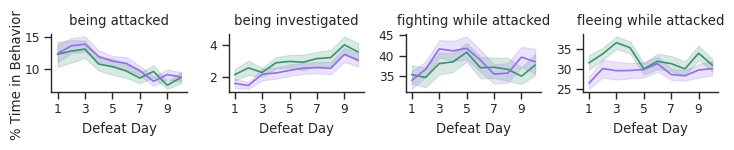

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  750
Model:                                 GEE   No. clusters:                       75
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Sun, 05 May 2024   Scale:                          50.929
Covariance type:                    robust   Time:                         21:29:49
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9321      1.336      8.185      0.000       8.314      13.550
si     

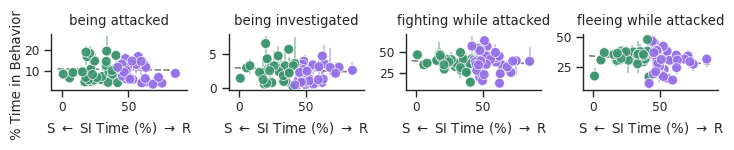

In [449]:
# b2tdict={'attack':'being attacked',
#      'standing against wall':'standing against wall',
#      'fightback':'fighting',
#      'runaway':'fleeing',
#      'sniffing':'being investigated',
#      'freezing':'immobile',
#      'approach':'approaching aggressor',
#      'fightWhenAttacked':'fighting while attacked',
#      'fightWhenNotAttacked': 'fighting while not attacked',
#      'notAttackedWhenFight':'not attacked while fighting',
#       'fleeWhenAttacked':'fleeing while attacked',
#      'freezeWhenAttacked':'immobile while attacked',
#       'fleeWhenSniffed':'fleeing while sniffed',
#      'freezeWhenSniffed':'immobile while sniffed',
#       'fightWhenSniffed':'fighting while sniffed',
#        'fleeWhenNotAttackedOrSniffed':'fleeing while not attacked or sniffed',
#      'freezeWhenNotAttackedOrSniffed':'immobile while not attacked or sniffed',
#       'fightWhenNotAttackedOrSniffed':'fighting while not attacked or sniffed',
#         'attackWhenNotFightOrFlee':'not fighting or fleeing while attacked',
#      'fightToFleeRatio': 'fight vs flee'}
b2tdict={'a':'being attacked',
     #'attack':'attacked2',
     'w':'standing against wall',
     'f':'fightback',
     'x':'runaway',
     's':'being investigated',
     #'sniffing':'sniffed2',
     'z':'freezing',
     'e':'approach',
     'i':'investigate aggressor',
     't':'tail rattle',
     'r':'rattle',
     'b':'barrier',
     'd':'defense',
     'p':'pursued',
     'u':'vigilant',
     'fightWhenAttacked':'fighting while attacked',
     'fleeWhenAttacked':'fleeing while attacked'}

#border=['z','u','f','x']
border=['a','s','fightWhenAttacked','fleeWhenAttacked']
#border=['attack','sniffing','fightWhenAttacked','fleeWhenAttacked']
rf_df_plot=rf_df
rf_df_plot['c']=[b2tdict[b] for b in rf_df_plot.b.values]
rf_df_plot['si']= [SI_values_rf[i] for i in rf_df_plot.r2s.values]
rf_df_plot=rf_df_plot.query('b in %s'%(border))
rf_df_plot['t']=rf_df_plot['t']*100
rf_df_plot['sex']='male'

rf_summary=make_behavior_plots(rf_df_plot,offset=0.5,order=[b2tdict[b] for b in border],
                    ylabel='% Time in Behavior',aspect=0.83,height=1.5)

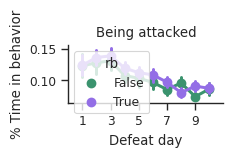

In [450]:
fig, axes = plt.subplots(1, 1, figsize=(2.5, 1.5), sharey=False)
sns.pointplot(data=rf_df.loc[(rf_df['b']=='a')], x="d", y="t", hue="rb",ci=68,palette=pal2,markersize=20,legend=True,)
plt.xlabel('Defeat day')
plt.ylabel('% Time in behavior',va='bottom')
plt.xticks(np.arange(0,10,step=2))
plt.xlim(-1,10)
plt.title('Being attacked')
sns.despine()
# plt.savefig('rf_attackvsday_ugly.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

In [6]:
## t-SNE
#saved=pickle.load(open('../../figures/final_figures/figshare/tsne_2101.p','rb'))
import pickle
#saved=pickle.load(open('/jukebox/witten/Anna/fig_data_plotting_code/QuantifyingDefeat-main/QuantifyBehavior/t-sne_model.p','rb'))
saved=pickle.load(open('t-sne_model.p','rb'))
#X_embedded=saved['training']
mlp2=saved['projection']
labeled_map=saved['map']
e2_test=saved['embeddings']

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [7]:
#import pickle
#pickle.dump(embeddings2, open("embeddings2.p","wb"))
embeddings2 = pickle.load(open('embeddings2.p','rb'),encoding='latin')

In [8]:
## Anna: replace these with your own 

xe,ye=(np.array([-61.84045874, -59.44965165, -57.05884455, -54.66803746, -52.27723037,
                -49.88642327, -47.49561618, -45.10480909, -42.714002,   -40.3231949,
                -37.93238781, -35.54158072, -33.15077362, -30.75996653, -28.36915944,
                -25.97835234, -23.58754525, -21.19673816, -18.80593106, -16.41512397,
                -14.02431688, -11.63350979,  -9.24270269,  -6.8518956,   -4.46108851,
                -2.07028141,   0.32052568,   2.71133277,   5.10213987,   7.49294696,
                9.88375405,  12.27456114,  14.66536824,  17.05617533,  19.44698242,
                21.83778952,  24.22859661,  26.6194037,   29.0102108,   31.40101789,
                33.79182498,  36.18263207,  38.57343917,  40.96424626,  43.35505335,
                45.74586045,  48.13666754,  50.52747463,  52.91828173,  55.30908882,
                57.69989591]),
 np.array( [-62.86710643, -60.38971776, -57.91232908, -55.43494041, -52.95755173,
             -50.48016306, -48.00277438, -45.52538571, -43.04799703, -40.57060836,
             -38.09321968, -35.61583101, -33.13844233, -30.66105366, -28.18366498,
             -25.70627631, -23.22888763, -20.75149896, -18.27411028, -15.79672161,
             -13.31933293, -10.84194426,  -8.36455558,  -5.88716691,  -3.40977823,
              -0.93238956,   1.54499912,   4.02238779,   6.49977647,   8.97716514,
              11.45455382,  13.93194249,  16.40933117,  18.88671984,  21.36410852,
              23.84149719,  26.31888587,  28.79627454,  31.27366322,  33.75105189,
              36.22844057,  38.70582924,  41.18321792,  43.66060659,  46.13799527,
              48.61538394,  51.09277262,  53.57016129,  56.04754997,  58.52493864,
              61.00232732]))

map_shape=(50,50)
xmin=min(xe)
xmax=max(xe)
ymin=min(ye)
ymax=max(ye)
labels={} #Anna: this is where the frame-by-frame tSNE cluster info is for each mouse/day
for k,e in embeddings2.items():

    def to_coords(xy):
        
        x = (xy[0] - xmin) / (xmax - xmin) * map_shape[0]
        y = (xy[1] - ymin) / (ymax - ymin) * map_shape[1]
        if x >= map_shape[0]:
            x = map_shape[0]-1
        if y >= map_shape[1]:
            y = map_shape[1]-1
        if x < 0:
            x=0
        if y < 0:
            y=0
        return int(x), int(y)
    labels[k] = np.array([labeled_map[to_coords(point)] for point in e])

In [9]:
# dists here is tsne_dists
dists=[]
for i in range(1,18):
    ds=[]
    for k in labels.keys():
        #ds.append(alldat[k]['TopBetweenCentroidDistance'][labels[k]==i])
        ds.append(alldat[k]['body_part_tracking']['TopBetweenCentroidDistance'][labels[k]==i])
    dists.append(np.mean(np.concatenate(ds)))

tsne_dists=dists
dists

[232.90686263690472,
 185.6917293594533,
 202.02764425305966,
 465.0162008921633,
 284.04031362770564,
 213.77351374341595,
 316.38760347802116,
 375.0348620449249,
 306.53549848676846,
 406.49363078805675,
 470.8613266502949,
 191.68955682582188,
 284.0088259717928,
 354.44988764641107,
 485.7480468390343,
 370.8933914224106,
 528.1325273305198]

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.
/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


(-0.5, 49.5, -4.575, 49.5)

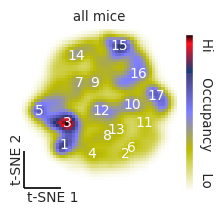

In [10]:
import skimage
import scipy
from skimage.feature import peak_local_max
from skimage.morphology import watershed
sns.set_context("paper")
sns.set_style('dark')
sigma=1.5
percentile=30

X_pred=np.row_stack(e2_test.values())

def heatmap(data, axlims=None, bins=100, normed=True, sigma=0.0):
    from scipy.ndimage.filters import gaussian_filter
    # Initial histogram
    heatmap, xedges, yedges = np.histogram2d(data[:,0], data[:, 1],
            bins=bins, range=axlims, normed=normed)
    # Convolve with Gaussian
    heatmap = gaussian_filter(heatmap, sigma=sigma)
    return heatmap,xedges,yedges

# Find local maxima as "seeds" for the watershed tranlsform
all_map_density,xe,ye = heatmap(X_pred, bins=50, sigma=sigma)
density_cutoff = np.percentile(all_map_density, percentile)
density_mask = all_map_density > density_cutoff
local_maxes = peak_local_max(all_map_density, indices=False)
local_maxes[np.logical_not(density_mask)] = False
markers, n_peaks = scipy.ndimage.label(local_maxes)

# Compute watershed transform
labeled_map = watershed(-all_map_density, markers, watershed_line=False)
labeled_map = labeled_map.astype('float64')

labeled_map_viz = watershed(-all_map_density, markers, watershed_line=True)
labeled_map_viz = labeled_map_viz.astype('float64')

labeled_map2=labeled_map.copy()
for i in range(1,49):
    for j in range(1,49):
        a=labeled_map[i][j]!=labeled_map[i-1][j]
        b=labeled_map[i][j]!=labeled_map[i+1][j]
        c=labeled_map[i][j]!=labeled_map[i][j-1]
        d=labeled_map[i][j]!=labeled_map[i][j+1]
        if a or b or c or d:
            labeled_map2[i][j]=0

viz = all_map_density.copy()


plt.figure(figsize=(2.2,2.2))
im=plt.imshow(viz.T,cmap='gist_stern_r',origin='lower')
#im=plt.imshow(viz.T,cmap='gist_stern_r',origin='lower',vmin=0,vmax=0.00025)

xlist=[]
ylist=[]
for i in np.unique((labeled_map).flatten()):
    x=np.where(labeled_map*local_maxes.astype(int)==i)[0][0]
    y=np.where(labeled_map*local_maxes.astype(int)==i)[1][0]
    xlist.append(x)
    ylist.append(y)
    plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,size=10,
    #plt.text(x,y,np.where(tsne_dists_unsorted==int(i)-1)[0][0]+1,size=10,
            verticalalignment='center',
            horizontalalignment='center',
            color='white')

cbar=plt.colorbar(im,fraction=0.046)
cbar.set_ticks([])
cbar.set_label('Hi      Occupancy     Lo',rotation=-90,va='bottom')

plt.vlines(x=0,ymin=-2,ymax=10,color='k')
plt.text(0,-1,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10)
plt.hlines(y=-2,xmin=0,xmax=12,color='k')
plt.text(1,-2.8,'t-SNE 1',size=10,verticalalignment='top')
plt.title('all mice')
plt.axis('off')
#plt.show()
# plt.savefig('tsne_plot.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')


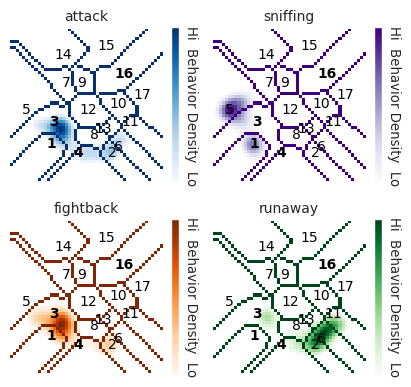

In [23]:
# b2p={'fightback':'Oranges', 
#      'attack':'Blues', 
#      'freezing':'Reds', 
#      'runaway':'Greens', 
#      'sniffing':'Purples', 
#      'approach':'Greys'
# }
b2p={'f':'Oranges', 
     'a':'Blues', 
     'z':'Reds', 
     'x':'Greens', 
     's':'Purples', 
     'e':'Greys'
}
# b2t=[('attack','being attacked'),
#      ('sniffing','being investigated'),
     
#      ('fightback','fighting'),
#      ('runaway','fleeing'),
#      ('approach','approaching aggressor'),
#      ('freezing','immobile')]
b2t=[('a','attack'),
     ('s','sniffing'),
     ('f','fightback'),
     ('x','runaway'),
     ('e','approach'),
     ('z','freezing')]
attack_map=np.zeros(1)
sns.set_context("paper")
sns.set_style('dark')
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(4.2,4))
rc=0
for b,t in b2t[:4]:
    col=int(rc%2)
    row=int(rc/2)
    ax=axs[row][col]
    e=[]
    #for k in rf_scores:
    for k in embeddings2:
        e.append(embeddings2[k][rf_scores[k][b]])
    e=np.row_stack(e)
    z,_,_ = heatmap(e,
                    bins=(xe,ye), sigma=2)
    z[labeled_map_viz==0]=z.max()
    mx=np.ma.masked_array(z, z<np.percentile(z,80))
    im=ax.imshow(mx.T,origin='lower',cmap=b2p[b])
    for i in np.unique((labeled_map).flatten()):
        x=np.where(labeled_map*local_maxes.astype(int)==i)[0]
        y=np.where(labeled_map*local_maxes.astype(int)==i)[1]
        if np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1 in [1,3,4,16]:
            ax.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
                     size=10,
                    verticalalignment='center',
                    horizontalalignment='center',
                    color='k', weight='bold')
        else:
            ax.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
                     size=10,
                    verticalalignment='center',
                    horizontalalignment='center',
                    color='k')
    ax.set_title(t,fontsize=10)
    ax.axis('off')
    rc+=1
    #if b=='attack':
    if b=='a':
        attack_map=z
    cbar=plt.colorbar(im,fraction=0.046,ax=ax)
    cbar.set_ticks([])
    cbar.set_label('Hi  Behavior Density  Lo',rotation=-90,va='bottom')

#plt.show()
# plt.savefig('tsne_RF_bar.pdf',transparent=True,dpi=300,
#                    bbox_inches='tight')


In [24]:
cbar_list=['Far                     Close',
           'Far                     Close',
           'Far                     Close',
           'Fast                Slow',
           'Fast                     Slow',
           'Low                     High',
           'Low                     High',
           'Toward             Away',
           'Toward             Away',
           'Fast                Slow',
           'Far                     Close',
           'Far                     Close'
          ]

vars_list = [
"Proximity", 
"swNose-blTTI dist", 
"swNose-blNOSE dist", 
"SW velocity", 
"BL velocity", 
"SW side height", 
"BL side height",
"SW orientaiton",
"BL orientation",
"BL-SW between centroid velocity",
"BL dist to short wall",
"BL dist to long wall"
]

In [11]:
hists = {}
for i in range(len(r2s)):
    m = r2s[i]
    for j in range(10):
        test_key = (m,j+1)
        if test_key not in embeddings2:
            continue
        embedded_mlp=embeddings2[test_key]
        z,_,_ = heatmap(embedded_mlp, bins=(xe,ye), sigma=1.5)
        hists[test_key]=z/z.sum()

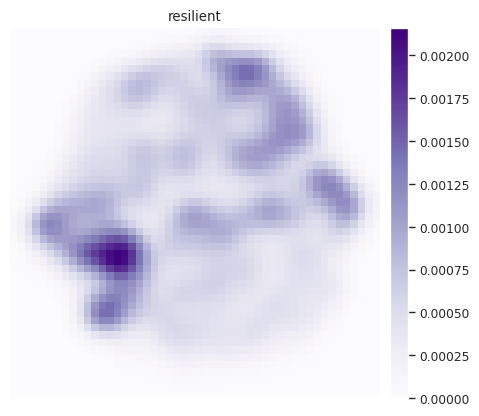

In [12]:
resilient_map=np.zeros(hists[(3814,1)].shape)
resilient_maps=[]
for m in r2s[RFCUTOFF:]:
    sub_m=np.zeros(hists[(3814,1)].shape)
    for d in range(1,11):
        if (m,d) in hists:
            sub_m += hists[(m,d)]
    resilient_map+=sub_m/sub_m.sum()
    resilient_maps.append(sub_m/sub_m.sum())
resilient_map=resilient_map/resilient_map.sum()
plt.figure()
im=plt.imshow(resilient_map.T,origin='lower',cmap='Purples')
plt.title('resilient')
cbar=plt.colorbar(im,fraction=0.048,orientation='vertical',pad=0.02)
plt.axis('off')
plt.show()

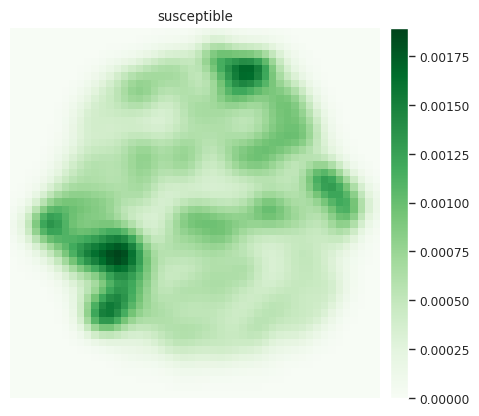

In [13]:
susceptible_map=np.zeros(hists[(3814,1)].shape)
susceptible_maps=[]
for m in r2s[:RFCUTOFF]:
    sub_m=np.zeros(hists[(3814,1)].shape)
    for d in range(1,11):
        if (m,d) in hists:
            sub_m += hists[(m,d)]
    susceptible_map+=sub_m/sub_m.sum()
    susceptible_maps.append(sub_m/sub_m.sum())
susceptible_map=susceptible_map/susceptible_map.sum()
plt.figure()
im=plt.imshow(susceptible_map.T,origin='lower',cmap='Greens')
plt.title('susceptible')
cbar=plt.colorbar(im,fraction=0.048,orientation='vertical',pad=0.02)
plt.axis('off')
plt.show()

In [14]:
mouse_maps = {}
mouse_maps['resilient_fp'] = resilient_map
mouse_maps['susceptible_fp'] = susceptible_map

#pickle.dump(mouse_maps, open("t-sne_maps_SR_FP.p","wb"))

In [15]:
from matplotlib.colors import LinearSegmentedColormap
cm = LinearSegmentedColormap.from_list(
        "Custom", [ggp[1],'white',ggp[2]], N=55)

(-0.5, 49.5, -0.5, 49.5)

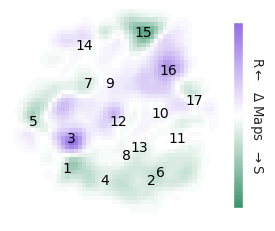

In [16]:
diffmap=susceptible_map-resilient_map
plt.figure(figsize=(3,3))
plt.imshow(-1*diffmap.T,
#plt.imshow(diffmap.T,
           cmap=cm,
           vmin=-0.0003,vmax=0.0003,
          origin='lower')
for i in np.unique((labeled_map).flatten()):
    x=np.where(labeled_map*local_maxes.astype(int)==i)[0]
    y=np.where(labeled_map*local_maxes.astype(int)==i)[1]
    plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
             size=10,
            verticalalignment='center',
            horizontalalignment='center',
            color='k')
cbar=plt.colorbar(fraction=0.04)
cbar.set_label(r'R$\leftarrow$  $\Delta$ Maps  $\rightarrow$S',rotation=-90,va='bottom')
#cbar.set_label(r'S$\leftarrow$  $\Delta$ Maps  $\rightarrow$R',rotation=-90,va='bottom')
cbar.set_ticks([])
plt.axis('off')
#plt.show()
# plt.savefig('tsne_SR.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

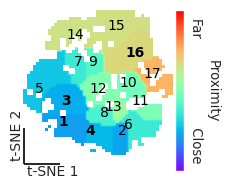

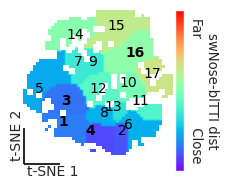

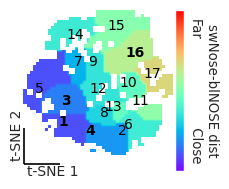

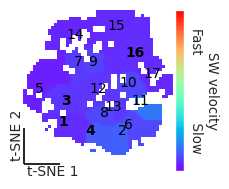

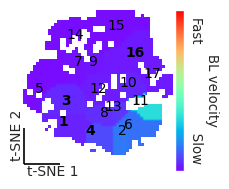

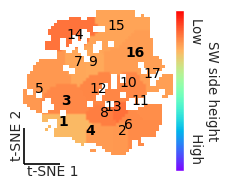

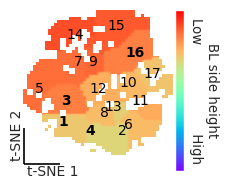

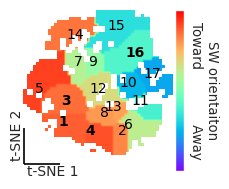

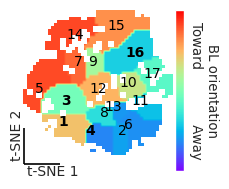

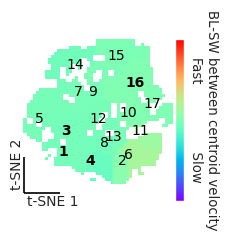

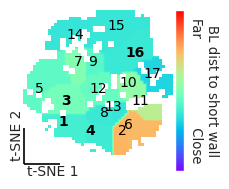

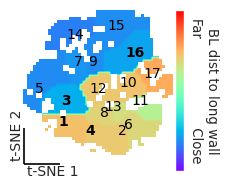

In [23]:
sns.set_context("paper")
sns.set_style("dark")
#for j in range(len(vars_list)-1):
for j in range(len(vars_list)):
    plt.figure(figsize=(2.2,2.1))
    z=np.zeros(labeled_map.shape)
    for i in np.unique(labeled_map.flatten()):
        if i in range(1,18):
            x=np.where(labeled_map*local_maxes.astype(int)==i)[0][0]
            y=np.where(labeled_map*local_maxes.astype(int)==i)[1][0]
            if np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1 in [1,3,4,16]:
            #if np.where(tsne_dists_unsorted==int(i)-1)[0][0]+1 in [1,3,4,16]:
                plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
                #plt.text(x,y,np.where(tsne_dists_unsorted==int(i)-1)[0][0]+1,
                         size=10,
                        verticalalignment='center',
                        horizontalalignment='center',
                        color='k', weight='bold')
            else:
                plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
                #plt.text(x,y,np.where(tsne_dists_unsorted==int(i)-1)[0][0]+1,
                         size=10,
                        verticalalignment='center',
                        horizontalalignment='center',
                        color='k')
            ds=[]
            for k in embeddings2:
                #ds.append(alldat[k]['extracted_features'][labels[k]==i,j])
                ds.append(alldat[k]['extracted_features'].T[labels[k]==i,j])
            z[np.where(labeled_map.astype(int)==int(i))[0],np.where(labeled_map.astype(int)==int(i))[1]]=np.mean(np.concatenate(ds))


    mx=np.ma.masked_array(z, np.abs(diffmap)<np.percentile(np.abs(diffmap),30))
    im=plt.imshow(mx.T,origin='lower',
                cmap='rainbow',vmin=-1,vmax=1)
                #cmap='rainbow',vmin=-.5,vmax=.75)

    plt.vlines(x=0,ymin=-2,ymax=10,color='k')
    plt.text(0,-1,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10)
    plt.hlines(y=-2,xmin=0,xmax=12,color='k')
    plt.text(1,-2.5,'t-SNE 1',size=10,va='top')

    cbar=plt.colorbar(im,fraction=0.048,orientation='vertical',pad=0.02)
    cbar.set_ticks([])
    cbar.set_label(vars_list[j]+'\n'+cbar_list[j],rotation=-90,va='bottom')
    plt.axis('off')
    plt.show()

In [24]:
feature = 11
for k in alldat:
    dist_to_wall = np.empty(np.shape(alldat[k]['extracted_features'][feature]))
    for i in range(0,len(alldat[k]['extracted_features'][feature])):
        if alldat[k]['extracted_features'][feature][i] <= alldat[k]['extracted_features'][feature-1][i]:
            dist_to_wall[i] = alldat[k]['extracted_features'][feature][i]
        else:
            dist_to_wall[i] = alldat[k]['extracted_features'][feature-1][i]
    alldat[k]['distance_to_wall'] = dist_to_wall

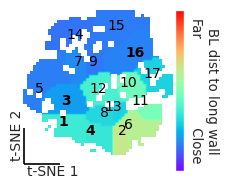

In [25]:
feature = 11
sns.set_context("paper")
sns.set_style("dark")
#for j in range(len(vars_list)):
plt.figure(figsize=(2.2,2.1))
z=np.zeros(labeled_map.shape)
for i in np.unique(labeled_map.flatten()):
    if i in range(1,18):
        x=np.where(labeled_map*local_maxes.astype(int)==i)[0][0]
        y=np.where(labeled_map*local_maxes.astype(int)==i)[1][0]
        if np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1 in [1,3,4,16]:
        #if np.where(tsne_dists_unsorted==int(i)-1)[0][0]+1 in [1,3,4,16]:
            plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
            #plt.text(x,y,np.where(tsne_dists_unsorted==int(i)-1)[0][0]+1,
                     size=10,
                    verticalalignment='center',
                    horizontalalignment='center',
                    color='k', weight='bold')
        else:
            plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,
            #plt.text(x,y,np.where(tsne_dists_unsorted==int(i)-1)[0][0]+1,
                     size=10,
                    verticalalignment='center',
                    horizontalalignment='center',
                    color='k')
        ds=[]
        for k in embeddings2:
            #ds.append(alldat[k]['extracted_features'][labels[k]==i,j])
            #ds.append(alldat[k]['extracted_features'].T[labels[k]==i,j])
            #ds.append(alldat[k]['distance_to_wall'].T[labels[k]==i])
            ds.append(alldat[k]['distance_to_wall'].T[labels[k]==i])
        z[np.where(labeled_map.astype(int)==int(i))[0],np.where(labeled_map.astype(int)==int(i))[1]]=np.mean(np.concatenate(ds))


mx=np.ma.masked_array(z, np.abs(diffmap)<np.percentile(np.abs(diffmap),30))
im=plt.imshow(mx.T,origin='lower',
            cmap='rainbow',vmin=-1,vmax=1)
            #cmap='rainbow',vmin=-1,vmax=.5)

plt.vlines(x=0,ymin=-2,ymax=10,color='k')
plt.text(0,-1,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10)
plt.hlines(y=-2,xmin=0,xmax=12,color='k')
plt.text(1,-2.5,'t-SNE 1',size=10,va='top')

cbar=plt.colorbar(im,fraction=0.048,orientation='vertical',pad=0.02)
cbar.set_ticks([])
cbar.set_label(vars_list[feature]+'\n'+cbar_list[feature],rotation=-90,va='bottom')
plt.axis('off')
#plt.show()
plt.savefig('tSNE_wall_featurePlot.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

In [26]:
ms = []
ds = []
ls = []
ts = []
r2sc=[]
rbs=[]
r2s_i={m:np.where(np.array(r2s)==m)[0][0] for m in r2s}
for m,d in labels.keys():
    if m not in r2s:
        continue
    #for l in range(1,19):
    for l in range(1,18):
        ls.append(l)
        ts.append(np.sum(labels[(m,d)]==l)/len(labels[m,d])*100)
        ms.append(m)
        ds.append(d)
        rbs.append(r2s_i[m]>=RFCUTOFF)
        r2sc.append(r2s_i[m])

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/mnt/cup/labs/witten/Anna/fig_data_plotting_code/QuantifyingDefeat-main/FigureAnalysis/util.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['d_centered'] = dat['d']-dat['d'].unique().mean()
/mnt/cup/labs/witten/Anna/fig_data_plotting_code/QuantifyingDefeat-main/FigureAnalysis/util.py:29: SettingWithCopyWarning: 
A value is trying to be set

350
15 20
t-SNE 1 1 0.09285950940220762 0.9265766472850492
15 20
t-SNE 1 2 -1.064471966961295 0.29484210238449626
15 20
t-SNE 1 3 -0.21244045499372555 0.8330702334941414
15 20
t-SNE 1 4 0.4419945581190303 0.6613762863055065
15 20
t-SNE 1 5 -0.5564473261691356 0.5816591701990292
15 20
t-SNE 1 6 -0.28548298089954366 0.7770584231559602
15 20
t-SNE 1 7 -2.0023321623398993 0.05352272847960256
15 20
t-SNE 1 8 -1.0544965189317845 0.2993153647146893
15 20
t-SNE 1 9 0.4655387045738912 0.6446036189202371
15 20
t-SNE 1 10 -0.032287343444289664 0.974437399594832
t-SNE 1 [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equa

15 20
t-SNE 3 8 1.4043081404414333 0.16956952586394244
15 20
t-SNE 3 9 0.14396764249426036 0.8864016227561906
15 20
t-SNE 3 10 -0.6677058793254749 0.5089643725642918
t-SNE 3 [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                          29.582
Covariance type:                    robust   Time:                         11:54:58
        

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                          21.958
Covariance type:                    robust   Time:                         11:54:58
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9.1545      0.367     24.921      0

15 20
t-SNE 8 10 0.4382053104026714 0.6640927043194024
t-SNE 8 [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                           2.963
Covariance type:                    robust   Time:                         11:54:58
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

<Figure size 1000x1000 with 0 Axes>

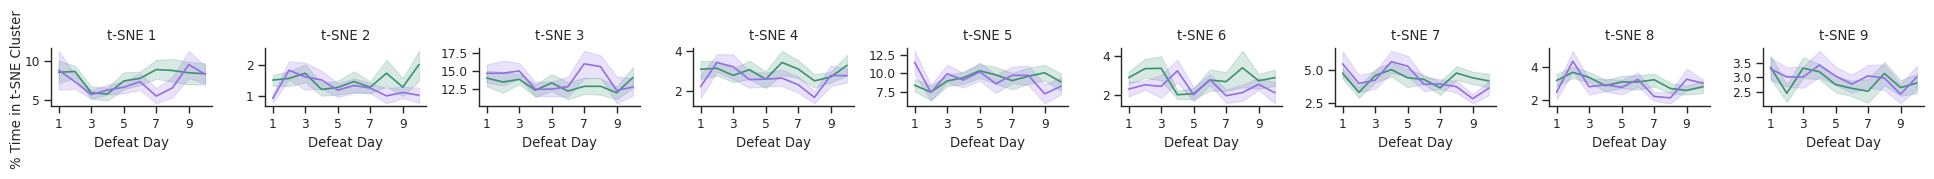

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                          27.813
Covariance type:                    robust   Time:                         11:55:00
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9300      1.089      7.283      0.000       5.796      10.064
si     

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                           6.333
Covariance type:                    robust   Time:                         11:55:00
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4191      0.429     10.303      0.000       3.578       5.260
si     

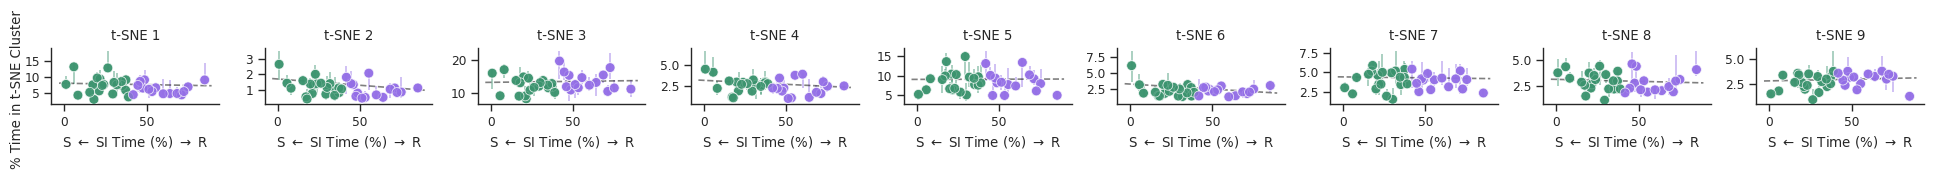

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/mnt/cup/labs/witten/Anna/fig_data_plotting_code/QuantifyingDefeat-main/FigureAnalysis/util.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['d_centered'] = dat['d']-dat['d'].unique().mean()
/mnt/cup/labs/witten/Anna/fig_data_plotting_code/QuantifyingDefeat-main/FigureAnalysis/util.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

350
15 20
t-SNE 10 1 -0.3523154076039912 0.7268419165674135
15 20
t-SNE 10 2 -0.005606973525901384 0.9955600649631398
15 20
t-SNE 10 3 -0.36021663513180857 0.7209805109123939
15 20
t-SNE 10 4 1.4787288753301113 0.14869558304775887
15 20
t-SNE 10 5 -0.10950079147001779 0.9134684763715346
15 20
t-SNE 10 6 0.30302828000180315 0.7637704217405404
15 20
t-SNE 10 7 -0.16273197605159015 0.8717218994563476
15 20
t-SNE 10 8 -0.6230677592478643 0.5375226126946558
15 20
t-SNE 10 9 -0.4262112471960423 0.6727212841817704
15 20
t-SNE 10 10 0.7233002190575742 0.47459142021859024
t-SNE 10 [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      E

15 20
t-SNE 12 7 -0.4641430468009375 0.6455927288886599
15 20
t-SNE 12 8 0.09195499662582479 0.927289754714687
15 20
t-SNE 12 9 1.7182980955322922 0.09511278576008174
15 20
t-SNE 12 10 0.624715220898074 0.5364538248360946
t-SNE 12 [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                          29.759
Covariance type:                   

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                          30.096
Covariance type:                    robust   Time:                         11:55:07
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6.0960      0.469     13.003      0

15 20
t-SNE 17 9 2.006654526855986 0.05303733846371246
15 20
t-SNE 17 10 1.1732970833861331 0.24907602030777512
t-SNE 17 [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                          22.658
Covariance type:                    robust   Time:                         11:55:07
                            coef    std err          z      P

<Figure size 1000x1000 with 0 Axes>

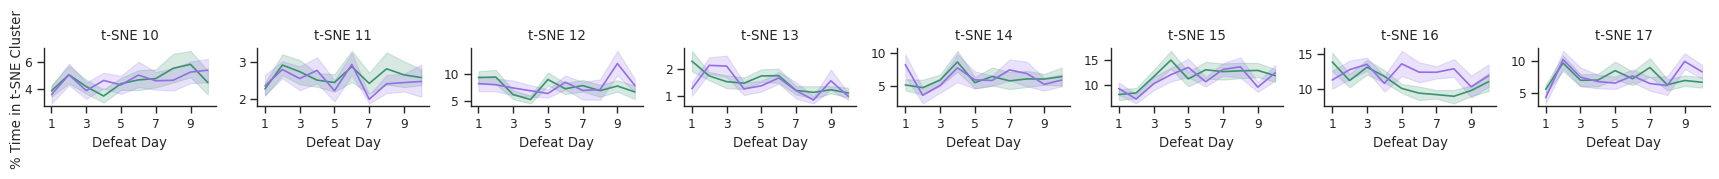

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                           9.796
Covariance type:                    robust   Time:                         11:55:08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6925      0.622      7.546      0.000       3.474       5.911
si     

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                          24.255
Covariance type:                    robust   Time:                         11:55:09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2309      0.799     12.803      0.000       8.665      11.797
si     

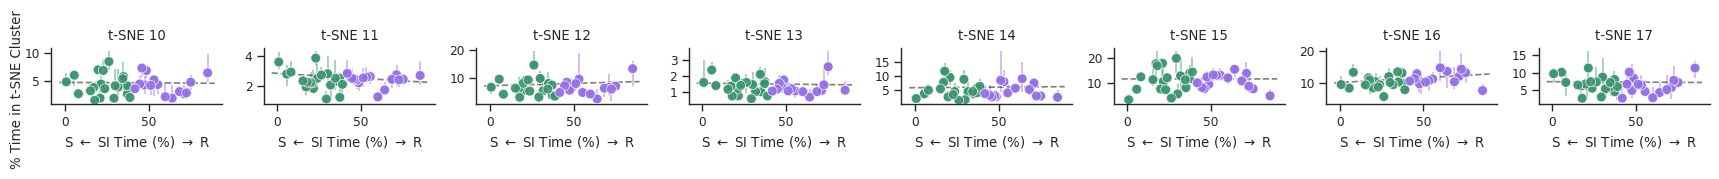

In [27]:
# Clusters labeled in order of distance
df=pd.DataFrame({'m':ms,'d':ds,'t':ts,
                 'c':[np.where(np.argsort(tsne_dists)==int(t)-1)[0][0]+1 for t in ls],
                 'r2s':r2sc,'rb':rbs})
df['sex']='male'
df['si']=[SI_values[i] for i in df.r2s]
df_plt=df.query('c in %s'%([1,2,3,4,5,6,7,8,9]))
#df_plt=df.query('c in %s'%([1,2,3,4,5,6,7,8]))
df_plt['c']=['t-SNE '+str(c) for c in df_plt.c]
tsne_df1=make_behavior_plots(df_plt,offset=0.5,ylabel='% Time in t-SNE Cluster',height=1.5,aspect=0.7)


df_plt=df.query('c in %s'%([10,11,12,13,14,15,16,17,18]))
#df_plt=df.query('c in %s'%([9,10,11,12,13,14,15,16,17]))

df_plt['c']=['t-SNE '+str(c) for c in df_plt.c]
tsne_df2=make_behavior_plots(df_plt,offset=0.5,ylabel='% Time in t-SNE Cluster',height=1.5,aspect=0.7)

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/mnt/cup/labs/witten/Anna/fig_data_plotting_code/QuantifyingDefeat-main/FigureAnalysis/util.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['d_centered'] = dat['d']-dat['d'].unique().mean()
/mnt/cup/labs/witten/Anna/fig_data_plotting_code/QuantifyingDefeat-main/FigureAnalysis/util.py:29: SettingWithCopyWarning: 
A value is trying to be set

350
15 20
t-SNE 1 1 1.738487694159869 0.0914485545894572
15 20
t-SNE 1 2 -0.031165835482192837 0.9753250206533035
15 20
t-SNE 1 3 0.7165861286928832 0.4786706345201863
15 20
t-SNE 1 4 -0.24323121316044793 0.809331923009517
15 20
t-SNE 1 5 -0.08678077534570378 0.9313702074155222
15 20
t-SNE 1 6 -0.7088889840258803 0.48337166549804955
15 20
t-SNE 1 7 0.4382696278220173 0.6640465580828421
15 20
t-SNE 1 8 0.060187881573161 0.9523690293733615
15 20
t-SNE 1 9 -1.7274152977324346 0.09344313122524403
15 20
t-SNE 1 10 -0.3474056183023018 0.7304926389674289
t-SNE 1 [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equatio

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                          29.601
Covariance type:                    robust   Time:                         11:55:14
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 13.4175      0.425     31.578      0

15 20
t-SNE 6 7 -1.247628599400624 0.22094828834126568
15 20
t-SNE 6 8 -1.7220771537354205 0.09441770885153927
15 20
t-SNE 6 9 0.13703086412162327 0.8918390358409662
15 20
t-SNE 6 10 -0.7422306670766569 0.4631982123709535
t-SNE 6 [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                           3.550
Covariance type:                    

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                          29.823
Covariance type:                    robust   Time:                         11:55:14
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.6817      0.433     17.745      0

<Figure size 1000x1000 with 0 Axes>

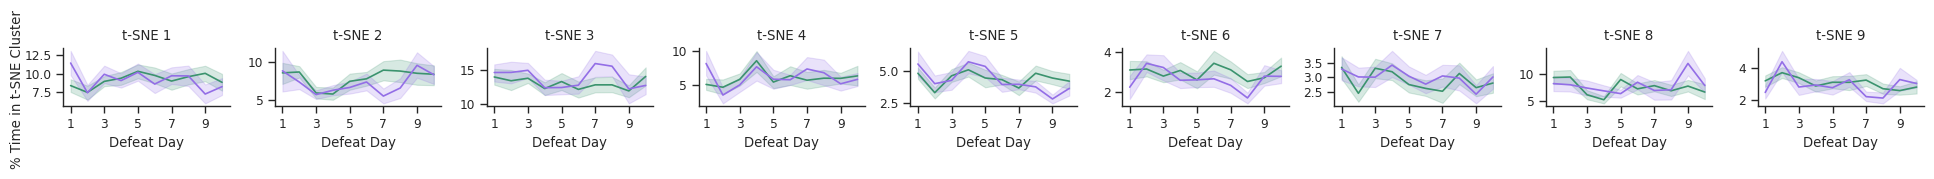

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                          22.005
Covariance type:                    robust   Time:                         11:55:16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1154      0.863     10.559      0.000       7.423      10.807
si     

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                          29.695
Covariance type:                    robust   Time:                         11:55:17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0251      0.904      7.771      0.000       5.253       8.797
si     

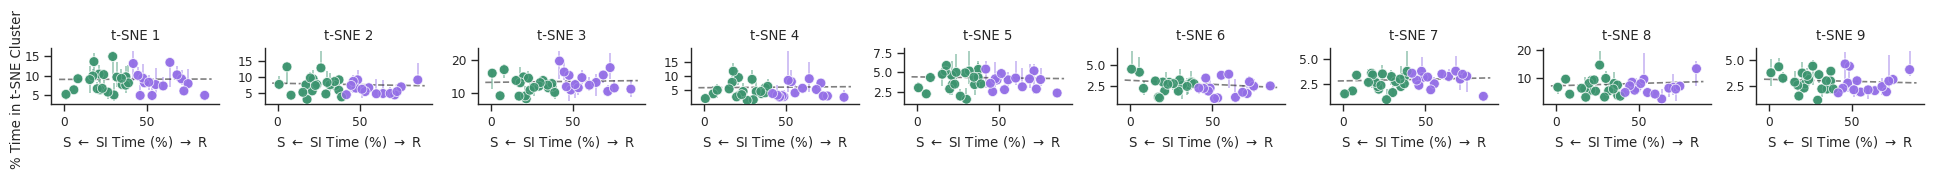

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/mnt/cup/labs/witten/Anna/fig_data_plotting_code/QuantifyingDefeat-main/FigureAnalysis/util.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['d_centered'] = dat['d']-dat['d'].unique().mean()
/mnt/cup/labs/witten/Anna/fig_data_plotting_code/QuantifyingDefeat-main/FigureAnalysis/util.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

350
15 20
t-SNE 10 1 -2.143115744133315 0.039569587422840585
15 20
t-SNE 10 2 1.181702340587965 0.24576972028364186
15 20
t-SNE 10 3 1.2402617776007805 0.22362503337102924
15 20
t-SNE 10 4 -0.6462161371194319 0.5226084077125207
15 20
t-SNE 10 5 -1.0990749256041314 0.279689384662493
15 20
t-SNE 10 6 -0.21512305829649614 0.8309953729087088
15 20
t-SNE 10 7 -0.016029240250711795 0.9873075859202944
15 20
t-SNE 10 8 -0.9811742079298533 0.3336458968987446
15 20
t-SNE 10 9 0.9378165696849066 0.3551521868352283
15 20
t-SNE 10 10 -0.4913409610984539 0.626437447320302
t-SNE 10 [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estima

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                           1.606
Covariance type:                    robust   Time:                         11:55:22
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.4081      0.077     18.178      0

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                          23.511
Covariance type:                    robust   Time:                         11:55:22
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 11.3729      0.320     35.506      0

<Figure size 1000x1000 with 0 Axes>

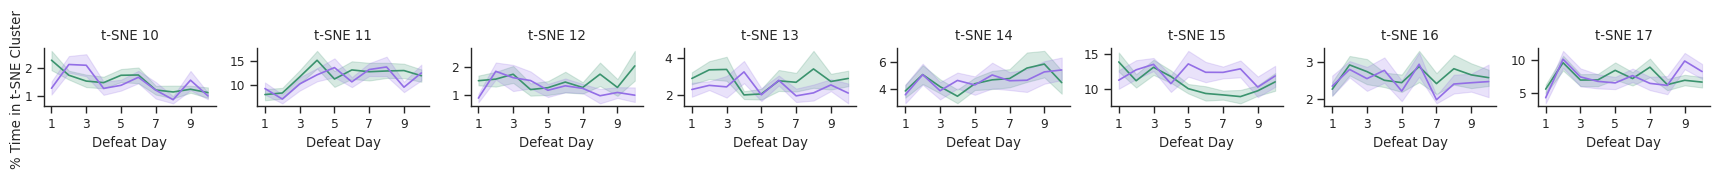

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                           1.184
Covariance type:                    robust   Time:                         11:55:23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5343      0.190      8.070      0.000       1.162       1.907
si     

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  350
Model:                                 GEE   No. clusters:                       35
Method:                        Generalized   Min. cluster size:                  10
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                10.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 09 Feb 2024   Scale:                           1.723
Covariance type:                    robust   Time:                         11:55:24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8303      0.216     13.100      0.000       2.407       3.254
si     

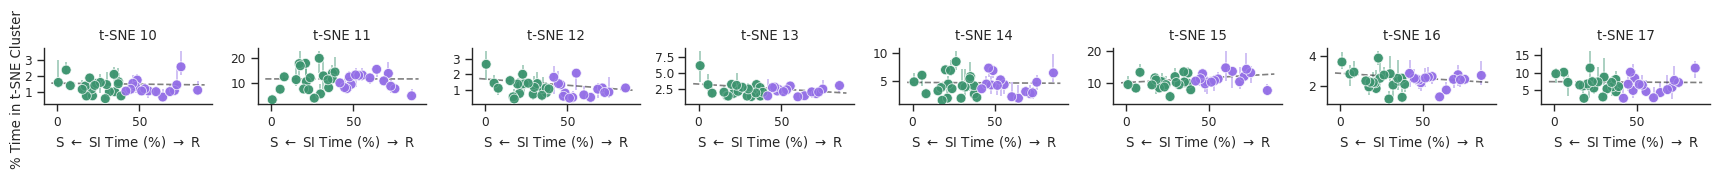

In [28]:
## Decode resilience category by t-SNE behavior occupancies (logistic regression)
df=pd.DataFrame({'m':ms,'d':ds,'t':ts,
                 'c':ls,
                 'r2s':r2sc,'rb':rbs})
df['sex']='male'
df['si']=[SI_values[i] for i in df.r2s]
df_plt=df.query('c in %s'%([1,2,3,4,5,6,7,8,9]))
#df_plt=df.query('c in %s'%([1,2,3,4,5,6,7,8]))
df_plt['c']=['t-SNE '+str(c) for c in df_plt.c]
tsne_df1=make_behavior_plots(df_plt,offset=0.5,ylabel='% Time in t-SNE Cluster',height=1.5,aspect=0.7)


df_plt=df.query('c in %s'%([10,11,12,13,14,15,16,17]))
#df_plt=df.query('c in %s'%([9,10,11,12,13,14,15,16,17]))

df_plt['c']=['t-SNE '+str(c) for c in df_plt.c]
tsne_df2=make_behavior_plots(df_plt,offset=0.5,ylabel='% Time in t-SNE Cluster',height=1.5,aspect=0.7)

## NEURAL ANALYSIS

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import loadTDT as tdt
from scipy import signal
from scipy.signal import detrend
from scipy.signal import resample
from scipy.signal import medfilt
from scipy.signal import butter
from scipy.signal import filtfilt
from statsmodels import robust
from scipy import ndimage, misc

"""
CONSTANTS
"""
#FP_FS=1017 #TDT daq rate
#DLC_FS_D = 120 #defeat cam frame rate
#FP_FS=1017 #TDT daq rate
# DLC_FS_P = 40 #pre/post tests frame rate
# PX2CM = 11.5 #12 pixels per cm
FP_FS=1000 #TDT daq rate
DLC_FS_D = 100 #defeat cam frame rate
DLC_FS_P = 30 #pre/post tests frame rate
PX2CM = 11.5 #12 pixels per cm
start_time_on = 320#324#200#240 #260 for prox  #234 for attack
stop_time_on = 395#384##380#300#360 #340 for prox  #274 for attack 
start_time_off = 270 #274
stop_time_off = 345 #334

BAD_LHb = {3771,3772,3776,3779,3784,3785,3788,3789,3795,3804,3819,3824,3825,3827}
BAD_LHb_im = {565,569,572,578}

"""
PLOTTING
"""
from statsmodels.stats.multitest import multipletests
#def plot_neural(behavior,preattack2nac,postattack2nac,preattack2ts,postattack2ts,
def plot_neural(behavior,preattack2lhb,postattack2lhb,
               lims=[-1.5,1.5],save=True):
    sns.set_context("paper")
    sns.set_style("ticks",{
        'legend.frameon':False
    })
    
    
    ggp=np.array([[0.22953434, 0.57685998, 0.42976558, 1.        ],
                  [0.57609486, 0.42953354, 0.90002989, 1.        ],
       [0.133     , 0.133     , 0.133     , 1.        ],
       ])
    
    boxes=[]
          
        
    ms=[]
    ds=[]
    ls=[]
    ts=[]
    r2sc=[]
    rbs=[]
    
    all_ys={}
    summs=[]
#     for PRE,POST,region,color in zip([preattack2nac,preattack2ts],
#                                      [postattack2nac,postattack2ts],
#                                      ['VTA-NAc','SN-TS'],
#                                      ['dodgerblue','orange']):
    for PRE,POST,region,color in zip([preattack2lhb],
                                     [postattack2lhb],
                                     ['LHb'],
                                     ['dodgerblue']):
        pre_extreme=np.abs(np.row_stack([np.row_stack(PRE[k]) for k in PRE if k[0] in r2s[:RFCUTOFF]])[:,start_time_on:stop_time_on].mean(axis=0)).argmax()+240
        #pre_extreme=np.abs(np.row_stack([np.row_stack(PRE[k]) for k in PRE if k[0] in r2s[:RFCUTOFF]])[:,start_time_on:stop_time_on].mean(axis=0)).argmax()+FS*2
        post_extreme=np.abs(np.row_stack([np.row_stack(POST[k]) for k in POST if k[0] in r2s[:RFCUTOFF]])[:,start_time_off:stop_time_off].mean(axis=0)).argmax()+240
        #post_extreme=np.abs(np.row_stack([np.row_stack(POST[k]) for k in POST if k[0] in r2s[:RFCUTOFF]])[:,start_time_off:stop_time_off].mean(axis=0)).argmax()+FS*2
        print(behavior,region,pre_extreme,post_extreme)
        ms=[]
        ds=[]
        ls=[]
        ts=[]
        r2sc=[]
        rbs=[]
        m2weights={}
        j=0
        ys=[[[],[]],[[],[]],[[],[]]]
        noverdays=[]
    
        these_sis=[]

        for j,m in enumerate(r2s):
            i=int(j>RFCUTOFF)

            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            ons1=[]
            offs1=[]
            for d in range(1,11):
                k=(m,d)
                #if k not in postattack2nac:
                if k not in postattack2lhb:
                    continue
                ons1.append(PRE[k])
                offs1.append(POST[k])

                ms.append(m)
                ds.append(d)
                ls.append('onset')
                #ts.append(np.row_stack(PRE[k])[:,(pre_extreme-30):(pre_extreme+30)].mean()) #Anna: assuming 30 is FS/4?
                ts.append(np.row_stack(PRE[k])[:,(pre_extreme-25):(pre_extreme+25)].mean())
                r2sc.append(j)
                rbs.append(i)
                ms.append(m)
                ds.append(d)
                ls.append('offset')
                #ts.append(np.row_stack(POST[k])[:,(post_extreme-30):(post_extreme+30)].mean())
                ts.append(np.row_stack(POST[k])[:,(post_extreme-25):(post_extreme+25)].mean())
                r2sc.append(j)
                rbs.append(i)
                
            if len(ons1)==0:
                print(m)
                continue


        df=pd.DataFrame({'m':ms,'d':ds,'c':ls,'t':ts,'r2s':r2sc,'rb':rbs})

        df['si']=[SI_values[i] for i in df.r2s]
        df['sex']='male'

        s=make_behavior_plots(df,offset=0.5,ylabel='Z-scored $\Delta$F/F',
                              order=['onset','offset'],aspect=1,height=2.7)
        summs.append(s)
    return(summs)


"""
Filtering functions for photometry
"""
#def butter_bandpass(lowcut, highcut, fs=1017, order=5):
def butter_bandpass(lowcut, highcut, fs=1000, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


#def butter_bandpass_filter(data, lowcut, highcut, fs=1017, order=5):
def butter_bandpass_filter(data, lowcut, highcut, fs=1000, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y


#def butter_lowpass(cutoff, fs=1017, order=5):
def butter_lowpass(cutoff, fs=1000, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

#def butter_lowpass_filter(data, cutoff, fs=1017, order=5):
def butter_lowpass_filter(data, cutoff, fs=1000, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

#def butter_highpass(cutoff, fs=1017, order=5):
def butter_highpass(cutoff, fs=1000, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

#def butter_highpass_filter(data, cutoff, fs=1017, order=5):
def butter_highpass_filter(data, cutoff, fs=1000, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

#def filter_raw(raw_signal,fs=1017):
def filter_raw(raw_signal,fs=1000):
    sig2 = butter_lowpass_filter(raw_signal,10,fs,order=3) # 10 hz
    sig3= butter_highpass_filter(sig2,0.1,fs,order=3)     # 0.05 hz
    hp = butter_highpass_filter(raw_signal,30,fs,order=3)
    return sig3


#def new_fp_peaks(raw_signal,fs=1017):
def new_fp_peaks(raw_signal,fs=1000):
    sig2 = butter_lowpass_filter(raw_signal,10,fs,order=3)
    sig3= butter_highpass_filter(sig2,0.1,fs,order=3)
    hp = butter_highpass_filter(raw_signal,4,fs,order=3)
    limit = np.max([ndimage.maximum_filter(-hp,fs)*2,ndimage.maximum_filter(sig3/np.std(hp),601)],axis=0)
    peaks = np.where(np.logical_and(sig3/np.std(hp)>=limit,sig3/np.std(hp)>2.5))[0]
    return peaks

#def moving_average(a, n=1017*10) :
def moving_average(a, n=1000*10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    ret[n-1:]=ret[n - 1:] / n
    ret[:n-1]=a[:-1].mean()
    return ret

#def filter_downsample(s,fs=1017,downsampled=DLC_FS_D):
def filter_downsample(s,fs=1000,downsampled=DLC_FS_D):
    fp1 = butter_lowpass_filter(s,30,fs=fs,order=3)
    fp = butter_highpass_filter(fp1,0.1,fs,order=3)
    ts = (fp-np.mean(fp))
    return ts

In [19]:
testpeaks=[]
BAD_SESSIONS=[(3752,4), (3752,5), (3752,6), (3752,7), (3783,5), (3783,7), (3799,6), (3803,5), (3803,8), (3806,3), (3809,7),(3809,8), (3811,9), (3811,10)]
BAD_SESSIONS_im=[(560,2),(582,6)]

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/ipykernel_launcher.py:142: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


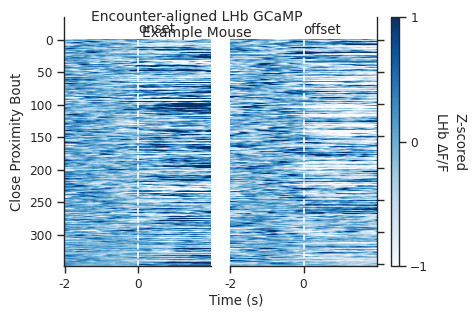

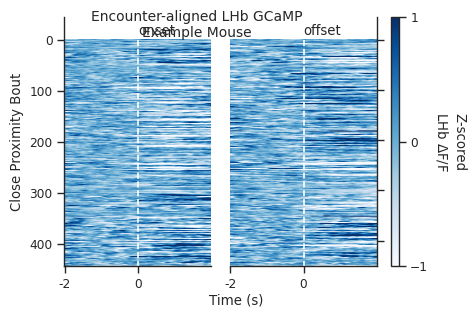

close proximity LHb 264 284
196
10 11
onset 1 -0.6520327451710051 0.5221904594868227
10 11
onset 2 -0.17214281633422562 0.8651455989644806
9 11
onset 3 -1.698194127021629 0.10669088512883727
10 10
onset 4 -1.515240962205168 0.14707508380427048
8 10
onset 5 -2.8898061428838524 0.010664190721774072
10 9
onset 6 -1.5443664144529017 0.14091034942805603
8 10
onset 7 0.2946442255778536 0.7720542543215176
8 11
onset 8 -0.3015686183287951 0.7666387110628967
10 10
onset 9 -0.5278218721699991 0.6040694393210226
10 10
onset 10 1.0351948623662666 0.31428619028945515
onset [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  196
Model:                                 GEE   No. clusters:                       21
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Eq

<Figure size 1000x1000 with 0 Axes>

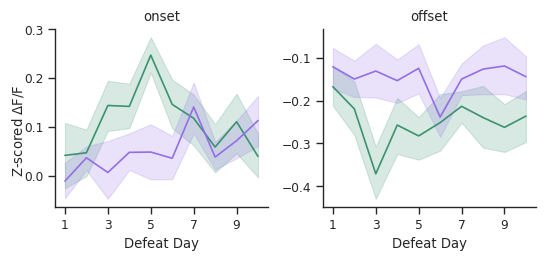

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  196
Model:                                 GEE   No. clusters:                       21
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                 9.3
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Mon, 20 May 2024   Scale:                           0.025
Covariance type:                    robust   Time:                         12:27:13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1373      0.025      5.491      0.000       0.088       0.186
si     

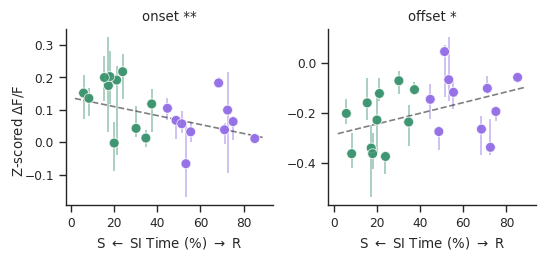

In [23]:
distance = 385 #14.5
#FS=120
FS=100
for behavior in ['close proximity']:
    #preattack2nac={}
    #postattack2nac={}
    preattack2lhb={}
    postattack2lhb={}
    #preattack2ts={}
    #postattack2ts={}
    preXs={}
    postXs={}
    span=2*FS
    sns.set_style("ticks")

    for m in r2s:
        #if m ==30 or m in BAD_NAC:
        if m in BAD_LHb:
            continue
        ims={('LHb','onset'):[],
             ('LHb','offset'):[]}
            #('VTA-NAc','onset'):[],
             #('SN-TS','onset'):[],
             #('VTA-NAc','offset'):[],
             #('SN-TS','offset'):[]}
        for d in range(1,11):
            k=(m,d)
            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            if k in BAD_SESSIONS:
                continue
            #if k not in rf_scores or 'fpnac_samp' not in alldat[k]:
            if k not in rf_scores or 'no_filt' not in alldat[k]:
                continue
                
            attack=(alldat[k]['body_part_tracking']['TopBetweenCentroidDistance']<distance).astype(int)#SHOULD BE 322 #385 #Anna: change to 423.69 as it is in cm
            #attack=(alldat[k]['TopBetweenCentroidDistance']<distance).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm

            if not np.sum(attack):
                continue
            starts = np.where(attack[1:]-attack[:-1]==1)[0]
            sparse_starts= [a for i,a in enumerate(starts) if np.sum(attack[a-FS:a])==0]
            #sparse_starts = starts
            #sparser_starts = starts[np.concatenate(([np.diff(starts)[0]>FS*5],np.diff(starts)>FS*5))]

            ends = np.where(attack[:-1]-attack[1:]==1)[0]
            sparse_ends= [a for i,a in enumerate(ends) if np.sum(attack[a+1:a+FS])==0]
            #sparse_ends=ends

            #before=np.array([(np.arange(start-span,start+span)/FS*FP_FS).astype(int) for start in sparse_starts if (start+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])
            #after=np.array([(np.arange(end-span,end+span)/FS*FP_FS).astype(int) for end in sparse_ends if end-span>0 and (end+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])

            before=np.array([(np.arange(start-span,start+span)).astype(int) for start in sparse_starts if (start+span)<len(alldat[k]['fp_lhb_samp'])])
            after=np.array([(np.arange(end-span,end+span)).astype(int) for end in sparse_ends if end-span>0 and (end+span)<len(alldat[k]['fp_lhb_samp'])])
            
            if not len(before) or not len(after):
                continue
            #preattack2nac[k]=[alldat[k]['fpnac_samp'][b]-alldat[k]['fpnac_samp'][b][:span].mean() for b in before]
            #postattack2nac[k]=[alldat[k]['fpnac_samp'][a]-alldat[k]['fpnac_samp'][a][:span].mean() for a in after]
            #preattack2ts[k]=[alldat[k]['fpts_samp'][b]-alldat[k]['fpts_samp'][b][:span].mean() for b in before]
            #postattack2ts[k]=[alldat[k]['fpts_samp'][a]-alldat[k]['fpts_samp'][a][:span].mean() for a in after]
            preattack2lhb[k]=[alldat[k]['no_filt'][b]-alldat[k]['no_filt'][b][:span].mean() for b in before]
            #preattack2lhb[k]=[alldat[k]['fp_lhb_samp'][b] for b in before]
            postattack2lhb[k]=[alldat[k]['no_filt'][a]-alldat[k]['no_filt'][a][:span].mean() for a in after]
            #postattack2lhb[k]=[alldat[k]['fp_lhb_samp'][a] for a in after]

            preX=np.zeros((before.shape[0],before.shape[1]))
            postX=np.zeros((before.shape[0],before.shape[1]))
            
#             ims[('VTA-NAc','onset')].append(preattack2nac[k])
#             ims[('VTA-NAc','offset')].append(postattack2nac[k])
#             ims[('SN-TS','onset')].append(preattack2ts[k])
#             ims[('SN-TS','offset')].append(postattack2ts[k])

            # Where the timecourses are (that the topplot selects from)
            ims[('LHb','onset')].append(preattack2lhb[k]) 
            ims[('LHb','offset')].append(postattack2lhb[k])
            
            
#         if len(ims[('SN-TS','offset')])==0:
#             continue
            
        toplot={3810:'Resilient',
               3801:'Susceptible'}
        
#         cols={'VTA-NAc':"Blues",
#              'SN-TS':'Oranges'}
        cols={'LHb':"Blues"}
        
        if m in toplot:
            #for reg  in ['VTA-NAc','SN-TS']:
            for reg  in ['LHb']:
                fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(4,3))
                for onoff in ['onset','offset']:
                    side=int(onoff=='offset')
                    sns.set_context("paper")
                    sns.set_style('white')

                    im=np.row_stack(ims[(reg,onoff)])
                    im2=axs[side].imshow(im,aspect='auto',cmap=cols[reg],vmin=-1,vmax=1)
                    for a in np.cumsum([len(a) for a in ims[(reg,onoff)]]):
                        axs[side].axhline(y=a,color='white',linewidth=0.33)
                    #axs[side].set_xticks([0,240,479])
                    axs[side].set_xticks([0,FS*2,FS*4])
                    axs[side].set_xticklabels([-2,0,2])
                    axs[side].set_yticks([tick for tick in axs[side].get_yticks() if tick>=0])

                    axs[side].set_ylim(len(im),-int(len(im))/10)
                    sns.despine()
                    #axs[side].plot((240,240),(0,len(im)),linestyle='--',color='white')
                    axs[side].plot((FS*2,FS*2),(0,len(im)),linestyle='--',color='white')
                    #axs[side].text(240,-10,'%s'%(onoff))
                    axs[side].text(FS*2,-10,'%s'%(onoff))
                    axs[side].set_xlabel('')
                    axs[side].set_ylabel('Close Proximity Bout')
                    if side:
                        axs[1].yaxis.set_label_position("right")
                        axs[1].yaxis.tick_right()
                        axs[1].spines['left'].set_visible(False)
                        axs[1].spines['right'].set_visible(True)
                        axs[1].set_ylabel('')
                        axs[1].set_yticklabels([])
                    axs[1].yaxis.tick_right()
                    axs[0].yaxis.tick_left()
                    axs[0].xaxis.tick_bottom()
                    axs[1].xaxis.tick_bottom()

                from mpl_toolkits.axes_grid1.inset_locator import inset_axes
                cbar_ax = inset_axes(axs[1],
                           width="5%",  # width = 5% of parent_bbox width
                           height="100%",  # height : 50%
                           loc='lower left',
                           bbox_to_anchor=(1.1, 0., 1, 1),
                           bbox_transform=axs[1].transAxes,
                           borderpad=0,
                           )
                cbar=fig.colorbar(im2, cax=cbar_ax,ticks=[-1, 0, 1, 2])
                cbar.set_label('Z-scored\n%s $\Delta$F/F'%reg,rotation=-90,va='bottom')
                fig.text(0.6, 0.0, 'Time (s)', ha='center')
                plt.tight_layout(pad=1,h_pad=2)
                plt.suptitle("Encounter-aligned %s GCaMP\nExample Mouse"%reg,size=10,
                            verticalalignment='top')

                plt.show()


    #s=plot_neural(behavior,preattack2nac,postattack2nac,preattack2ts,postattack2ts,lims=(-1,1,-1.5,2),
    #s=plot_neural(behavior,preattack2lhb,postattack2lhb,lims=(-1,1,-1.5,2),
    s=plot_neural(behavior,preattack2lhb,postattack2lhb,lims=(-1.5,2),
               save=True)

    prox_summary=s

In [24]:
from itertools import permutations
nrows=np.arange(len(xe)).astype(int)
xy2lhb={(i,j):[] for i,j in permutations(nrows,2)}

mean_lhb={}

def heatmapdiff(data,data2, axlims=None, bins=100, normed=True, sigma=0.0,subtract=0):
    from scipy.ndimage.filters import gaussian_filter
    # Initial histogram
    heatmap, xedges, yedges = np.histogram2d(data[:,0], data[:, 1],
            bins=bins, range=axlims, normed=normed)
    heatmap2, xedges, yedges = np.histogram2d(data2[:,0], data2[:, 1],
            bins=bins, range=axlims, normed=normed)
    
    # Convolve with Gaussian
    heatmap = gaussian_filter((heatmap+0.000001)/(heatmap2+0.000001)-subtract, sigma=sigma)
    return heatmap,xedges,yedges

def heatmapmean(data,z, xe,ye, normed=True, sigma=0.0):
    from scipy.ndimage.filters import gaussian_filter
    heatmap, xedges, yedges = np.histogram2d(data[:,0], data[:, 1],
            bins=(xe,ye))
    xbins=np.digitize(data[:,0],xe)
    ybins=np.digitize(data[:,1],ye)
    df=pd.DataFrame({'x':xbins,'y':ybins,'n':z})

    df=df.groupby(['x','y']).mean() # get mean value of dF/F when animal is in that bucket (pixel)
    #df=df.groupby(['x','y']).median() # get median value of dF/F when animal is in that bucket (pixel)
    df=df.add_suffix('').reset_index()
    
    meanmap=np.zeros([50,50])
    for x,y,n in df.values:
        if x>=50 or y>=50:
            continue
        meanmap[int(x),int(y)]=n
    return gaussian_filter(meanmap,sigma=sigma)

def heatmap(data, axlims=None, bins=100, normed=True, sigma=0.0):
    from scipy.ndimage.filters import gaussian_filter
    # Initial histogram
    heatmap, xedges, yedges = np.histogram2d(data[:,0], data[:, 1],
            bins=bins, range=axlims, normed=normed)
    # Convolve with Gaussian
    heatmap = gaussian_filter(heatmap, sigma=sigma)
    return heatmap,xedges,yedges

for i in range(len(xe)):
    xy2lhb[(i,i)]=[]

for k in alldat.keys():
    if 'no_filt' in alldat[k] and k[0] not in BAD_LHb and k not in BAD_SESSIONS:
        #lhb=alldat[k]['fp_lhb_samp']
        lhb=alldat[k]['no_filt']
        #nac=alldat[k]['fpnac_samp']
        #ts=alldat[k]['fpts_samp']
        #b=alldat[k]['body_part_tracking']['TopBetweenCentroidDistance']
        b=alldat[k]['TopBetweenCentroidDistance']
        #indices_fp=np.array([int(i*FP_FS/DLC_FS_D) for i in range(len(b)) if i*FP_FS/DLC_FS_D < len(nac)])
        #indices_fp=np.array([int(i) for i in range(len(b)) if i < len(lhb)])
        indices_fp=np.array([int(i+FS/2) for i in range(len(b)) if i < len(lhb)-int(FS/2)]) #Anna: shift 0.5s

        indices_behavior=np.arange(len(indices_fp))
        
        sigma=1.5
        mean_lhb[k]=heatmapmean(embeddings2[k][indices_behavior],lhb[indices_fp],xe=xe,ye=ye,sigma=sigma)

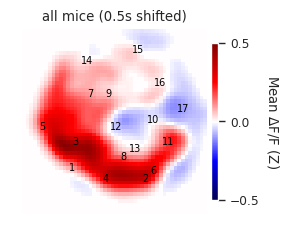

In [25]:
fp_maps=[]
for m in r2s:
    for d in range(1,11):
#         if (m,d) in mean_nac:
#             fp_maps.append(mean_nac[(m,d)])
        if (m,d) in mean_lhb:
            fp_maps.append(mean_lhb[(m,d)])

plt.figure(figsize=(3,3))
sns.set_style('dark')
image=np.mean(fp_maps,axis=0).T
image[np.abs(image-image[0][0])<0.01]=0
im=plt.imshow(image,origin='lower',cmap='seismic',
              vmin=-0.5,vmax=0.5)
cbar=plt.colorbar(im,fraction=0.04,orientation='vertical',pad=0.02)
cbar.ax.set_ylabel('Mean $\Delta$F/F (Z)',rotation=-90,va='bottom')

# add clusters labels
cbar.set_ticks([-0.5,0,0.5])
for i in np.unique((labeled_map).flatten()):
    x=np.where(labeled_map*local_maxes.astype(int)==i)[0][0]
    y=np.where(labeled_map*local_maxes.astype(int)==i)[1][0]
    xlist.append(x)
    ylist.append(y)
    plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,size=7,
            verticalalignment='center',
            horizontalalignment='center',
            color='k')
    
plt.vlines(x=1,ymin=2,ymax=12,color='w')
plt.text(0,-1,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10,color='w')
plt.hlines(y=2,xmin=1,xmax=12,color='w')
plt.text(0.5,-6,'t-SNE 1',size=10,color='w')
plt.title('all mice (0.5s shifted)')
plt.axis('off')
#plt.show()
plt.savefig('tsne_plot_LHb_5s.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

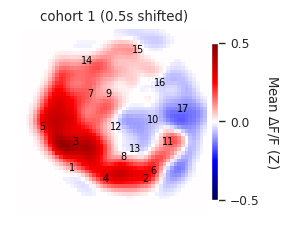

In [130]:
fp_maps=[]
for m in r2s:
    if m <= 3800:
        for d in range(1,11):
    #         if (m,d) in mean_nac:
    #             fp_maps.append(mean_nac[(m,d)])
            if (m,d) in mean_lhb:
                fp_maps.append(mean_lhb[(m,d)])

plt.figure(figsize=(3,3))
sns.set_style('dark')
image=np.mean(fp_maps,axis=0).T
image[np.abs(image-image[0][0])<0.01]=0
im=plt.imshow(image,origin='lower',cmap='seismic',
              vmin=-0.5,vmax=0.5)
cbar=plt.colorbar(im,fraction=0.04,orientation='vertical',pad=0.02)
cbar.ax.set_ylabel('Mean $\Delta$F/F (Z)',rotation=-90,va='bottom')

# add clusters labels
cbar.set_ticks([-0.5,0,0.5])
for i in np.unique((labeled_map).flatten()):
    x=np.where(labeled_map*local_maxes.astype(int)==i)[0][0]
    y=np.where(labeled_map*local_maxes.astype(int)==i)[1][0]
    xlist.append(x)
    ylist.append(y)
    plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,size=7,
            verticalalignment='center',
            horizontalalignment='center',
            color='k')
    
plt.vlines(x=1,ymin=2,ymax=12,color='w')
plt.text(0,-1,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10,color='w')
plt.hlines(y=2,xmin=1,xmax=12,color='w')
plt.text(0.5,-6,'t-SNE 1',size=10,color='w')
plt.title('cohort 1 (0.5s shifted)')
plt.axis('off')
#plt.show()
plt.savefig('tsne_plot_LHb_5s_COHORT 1.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

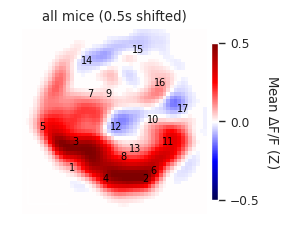

In [35]:
fp_maps=[]
for m in r2s:
    if m > 3800:
        for d in range(1,11):
    #         if (m,d) in mean_nac:
    #             fp_maps.append(mean_nac[(m,d)])
            if (m,d) in mean_lhb:
                fp_maps.append(mean_lhb[(m,d)])

plt.figure(figsize=(3,3))
sns.set_style('dark')
image=np.mean(fp_maps,axis=0).T
image[np.abs(image-image[0][0])<0.01]=0
im=plt.imshow(image,origin='lower',cmap='seismic',
              vmin=-0.5,vmax=0.5)
cbar=plt.colorbar(im,fraction=0.04,orientation='vertical',pad=0.02)
cbar.ax.set_ylabel('Mean $\Delta$F/F (Z)',rotation=-90,va='bottom')

# add clusters labels
cbar.set_ticks([-0.5,0,0.5])
for i in np.unique((labeled_map).flatten()):
    x=np.where(labeled_map*local_maxes.astype(int)==i)[0][0]
    y=np.where(labeled_map*local_maxes.astype(int)==i)[1][0]
    xlist.append(x)
    ylist.append(y)
    plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,size=7,
            verticalalignment='center',
            horizontalalignment='center',
            color='k')
    
plt.vlines(x=1,ymin=2,ymax=12,color='w')
plt.text(0,-1,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10,color='w')
plt.hlines(y=2,xmin=1,xmax=12,color='w')
plt.text(0.5,-6,'t-SNE 1',size=10,color='w')
plt.title('cohort 2 (0.5s shifted)')
plt.axis('off')
#plt.show()
plt.savefig('tsne_plot_LHb_5s_COHORT 2.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

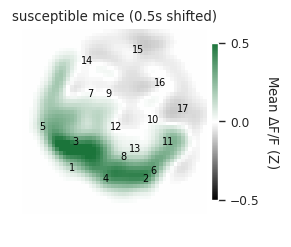

In [36]:
import matplotlib.colors

## Make a S-R diff map for FP data on t-SNE
R_fp_maps=[]
for m in r2s:
    if m in r2s[RFCUTOFF:]: 
        for d in range(1,11):
            if (m,d) in mean_lhb:
                R_fp_maps.append(mean_lhb[(m,d)])
                
S_fp_maps=[]
for m in r2s:
    if m not in r2s[RFCUTOFF:]: 
        for d in range(1,11):
            if (m,d) in mean_lhb:
                S_fp_maps.append(mean_lhb[(m,d)])

#diff_fp_maps = S_fp_maps - R_fp_maps

## Plot
plt.figure(figsize=(3,3))
sns.set_style('dark')
image=np.mean(S_fp_maps,axis=0).T
image[np.abs(image-image[0][0])<0.01]=0

# # convert zeros to nans for plotting: Anna added
# image_nan = image
# for i in range(0,np.shape(image_nan)[0]):
#     for j in range(0,np.shape(image_nan)[1]):
#         if image_nan[i,j] == 0.0:
#             image_nan[i,j] = np.nan

our_green = (28/256,117/256,59/256)

GrGy = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","white",our_green])

im=plt.imshow(image,origin='lower',cmap=GrGy,
#im=plt.imshow(image_nan,origin='lower',cmap='Greens',
              vmin = -0.5,vmax=0.5)
cbar=plt.colorbar(im,fraction=0.04,orientation='vertical',pad=0.02)
cbar.ax.set_ylabel('Mean $\Delta$F/F (Z)',rotation=-90,va='bottom')

cbar.set_ticks([-0.5,0,0.5])
for i in np.unique((labeled_map).flatten()):
    x=np.where(labeled_map*local_maxes.astype(int)==i)[0][0]
    y=np.where(labeled_map*local_maxes.astype(int)==i)[1][0]
    xlist.append(x)
    ylist.append(y)
    plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,size=7,
            verticalalignment='center',
            horizontalalignment='center',
            color='k')
plt.vlines(x=1,ymin=2,ymax=12,color='w')
plt.text(0,-1,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10,color='w')
plt.hlines(y=2,xmin=1,xmax=12,color='w')
plt.text(0.5,-6,'t-SNE 1',size=10,color='w')
plt.axis('off')
plt.xticks([0,20,40],[np.round(xe[0]),np.round(xe[20]),np.round(xe[40])],rotation=20)
plt.title('susceptible mice (0.5s shifted)')
#plt.show()
plt.savefig('tsne_LHb_S_plot_5s.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

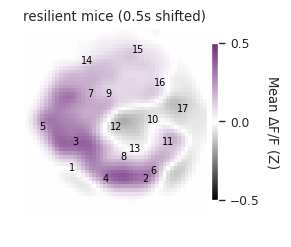

In [37]:
## Plot
plt.figure(figsize=(3,3))
sns.set_style('dark')
image=np.mean(R_fp_maps,axis=0).T
image[np.abs(image-image[0][0])<0.01]=0

our_purple = (112/256,43/256,126/256)

PrGy = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","white",our_purple])
            
im=plt.imshow(image,origin='lower',cmap=PrGy,
#im=plt.imshow(image_nan,origin='lower',cmap='Purples',
              vmin=-0.5,vmax=0.5)
cbar=plt.colorbar(im,fraction=0.04,orientation='vertical',pad=0.02)
cbar.ax.set_ylabel('Mean $\Delta$F/F (Z)',rotation=-90,va='bottom')

cbar.set_ticks([-0.5,0,0.5])
for i in np.unique((labeled_map).flatten()):
    x=np.where(labeled_map*local_maxes.astype(int)==i)[0][0]
    y=np.where(labeled_map*local_maxes.astype(int)==i)[1][0]
    xlist.append(x)
    ylist.append(y)
    plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,size=7,
            verticalalignment='center',
            horizontalalignment='center',
            color='k')
plt.vlines(x=1,ymin=2,ymax=12,color='w')
plt.text(0,-1,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10,color='w')
plt.hlines(y=2,xmin=1,xmax=12,color='w')
plt.text(0.5,-6,'t-SNE 1',size=10,color='w')
plt.axis('off')
plt.title('resilient mice (0.5s shifted)')
#plt.show()
plt.savefig('tsne_LHb_R_plot_5s.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

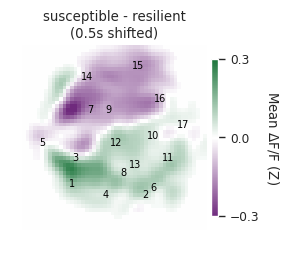

In [38]:
S_fp_maps = np.array(S_fp_maps)
R_fp_maps = np.array(R_fp_maps)

diff_fp_maps = np.mean(S_fp_maps,0) - np.mean(R_fp_maps,0)

PRGn_new = matplotlib.colors.LinearSegmentedColormap.from_list("", [our_purple,"white",our_green])

## Plot
plt.figure(figsize=(3,3))
sns.set_style('dark')
#image=np.mean(diff_fp_maps,axis=0).T
image=diff_fp_maps.T

image[np.abs(image-image[0][0])<0.01]=0
#im=plt.imshow(image,origin='lower',cmap='PRGn',
im=plt.imshow(image,origin='lower',cmap=PRGn_new,
              vmin=-0.3,vmax=0.3)
cbar=plt.colorbar(im,fraction=0.04,orientation='vertical',pad=0.02)
cbar.ax.set_ylabel('Mean $\Delta$F/F (Z)',rotation=-90,va='bottom')

cbar.set_ticks([-0.3,0,0.3])
for i in np.unique((labeled_map).flatten()):
    x=np.where(labeled_map*local_maxes.astype(int)==i)[0][0]
    y=np.where(labeled_map*local_maxes.astype(int)==i)[1][0]
    xlist.append(x)
    ylist.append(y)
    plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,size=7,
            verticalalignment='center',
            horizontalalignment='center',
            color='k')
plt.vlines(x=1,ymin=2,ymax=12,color='w')
plt.text(0,-1,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10,color='w')
plt.hlines(y=2,xmin=1,xmax=12,color='w')
plt.text(0.5,-6,'t-SNE 1',size=10,color='w')
plt.axis('off')
plt.title('susceptible - resilient\n(0.5s shifted)')
#plt.show()
plt.savefig('tsne_SR_plot_5s.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

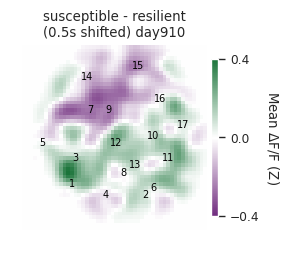

In [39]:
day_start = 9
day_end = 10

## Make a S-R diff map for FP data on t-SNE
R_fp_maps=[]
for m in r2s:
    if m in r2s[RFCUTOFF:]: 
        for d in range(day_start,day_end+1):
            if (m,d) in mean_lhb:
                R_fp_maps.append(mean_lhb[(m,d)])
                
S_fp_maps=[]
for m in r2s:
    if m not in r2s[RFCUTOFF:]: 
        for d in range(day_start,day_end+1):
            if (m,d) in mean_lhb:
                S_fp_maps.append(mean_lhb[(m,d)])
                
S_fp_maps = np.array(S_fp_maps)
R_fp_maps = np.array(R_fp_maps)

diff_fp_maps = np.mean(S_fp_maps,0) - np.mean(R_fp_maps,0)

## Plot
plt.figure(figsize=(3,3))
sns.set_style('dark')
#image=np.mean(diff_fp_maps,axis=0).T
image=diff_fp_maps.T

image[np.abs(image-image[0][0])<0.01]=0
#im=plt.imshow(image,origin='lower',cmap='PRGn',
im=plt.imshow(image,origin='lower',cmap=PRGn_new,
              vmin=-0.4,vmax=0.4)
cbar=plt.colorbar(im,fraction=0.04,orientation='vertical',pad=0.02)
cbar.ax.set_ylabel('Mean $\Delta$F/F (Z)',rotation=-90,va='bottom')

cbar.set_ticks([-0.4,0,0.4])
for i in np.unique((labeled_map).flatten()):
    x=np.where(labeled_map*local_maxes.astype(int)==i)[0][0]
    y=np.where(labeled_map*local_maxes.astype(int)==i)[1][0]
    xlist.append(x)
    ylist.append(y)
    plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,size=7,
            verticalalignment='center',
            horizontalalignment='center',
            color='k')
plt.vlines(x=1,ymin=2,ymax=12,color='w')
plt.text(0,-1,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10,color='w')
plt.hlines(y=2,xmin=1,xmax=12,color='w')
plt.text(0.5,-6,'t-SNE 1',size=10,color='w')
plt.axis('off')
plt.title('susceptible - resilient\n(0.5s shifted) day910')
#plt.show()
plt.savefig('tsne_SR_plot_5s_day910.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

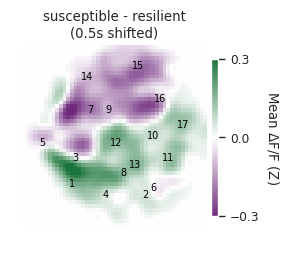

In [40]:
## Make a S-R diff map for FP data on t-SNE
R_fp_maps=[]
for m in r2s:
    if m in r2s[RFCUTOFF:]: 
        if m >= 3801:
            for d in range(1,11):
                if (m,d) in mean_lhb:
                    R_fp_maps.append(mean_lhb[(m,d)])
                
S_fp_maps=[]
for m in r2s:
    if m not in r2s[RFCUTOFF:]: 
        if m >= 3801:
            for d in range(1,11):
                if (m,d) in mean_lhb:
                    S_fp_maps.append(mean_lhb[(m,d)])
                
S_fp_maps = np.array(S_fp_maps)
R_fp_maps = np.array(R_fp_maps)

diff_fp_maps = np.mean(S_fp_maps,0) - np.mean(R_fp_maps,0)

## Plot
plt.figure(figsize=(3,3))
sns.set_style('dark')
#image=np.mean(diff_fp_maps,axis=0).T
image=diff_fp_maps.T

image[np.abs(image-image[0][0])<0.01]=0
#im=plt.imshow(image,origin='lower',cmap='PRGn',
im=plt.imshow(image,origin='lower',cmap=PRGn_new,
              vmin=-0.3,vmax=0.3)
cbar=plt.colorbar(im,fraction=0.04,orientation='vertical',pad=0.02)
cbar.ax.set_ylabel('Mean $\Delta$F/F (Z)',rotation=-90,va='bottom')

cbar.set_ticks([-0.3,0,0.3])
for i in np.unique((labeled_map).flatten()):
    x=np.where(labeled_map*local_maxes.astype(int)==i)[0][0]
    y=np.where(labeled_map*local_maxes.astype(int)==i)[1][0]
    xlist.append(x)
    ylist.append(y)
    plt.text(x,y,np.where(np.argsort(tsne_dists)==int(i)-1)[0][0]+1,size=7,
            verticalalignment='center',
            horizontalalignment='center',
            color='k')
plt.vlines(x=1,ymin=2,ymax=12,color='w')
plt.text(0,-1,'t-SNE 2',rotation=90,horizontalalignment='right',verticalalignment='bottom',size=10,color='w')
plt.hlines(y=2,xmin=1,xmax=12,color='w')
plt.text(0.5,-6,'t-SNE 1',size=10,color='w')
plt.axis('off')
plt.title('susceptible - resilient\n(0.5s shifted)')
#plt.show()
plt.savefig('tsne_SR_plot_5s_cohort 2.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

In [42]:
vars_list

['Proximity',
 'swNose-blTTI dist',
 'swNose-blNOSE dist',
 'SW velocity',
 'BL velocity',
 'SW side height',
 'BL side height',
 'SW orientaiton',
 'BL orientation',
 'BL-SW between centroid velocity',
 'BL dist to short wall',
 'BL dist to long wall']

In [140]:
# calculating prox
clusters_original = [5,1,3,14,7,4,9,12,8,13,15,2,6,10,16,11,17]
FS = 100
pix2cm = 30
tSNE_scatter_avged = {'proximity':[],'activity':[],'occupancy':[],'cluster':[]}
for b in range(1,18):
    label_prox = []
    label_fp = []
    label_occupancy = []
    for i,m in enumerate(r2s):
        if m not in BAD_LHb:
            for d in range(1,11):
                k = (m,d)
                if k not in BAD_SESSIONS:
                    dist = np.sqrt(np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][0]-alldat[k]['body_part_tracking']['TopSWCentroid'][0]))+np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][1]-alldat[k]['body_part_tracking']['TopSWCentroid'][1])))/pix2cm
                    label_prox.append(np.mean(dist[labels[k]==b],0))
                    lhb_shifted = np.roll(alldat[k]['fp_lhb_samp'],-int(FS/2))
                    #label_fp.append(np.mean(alldat[k]['fp_lhb_samp'][labels[k]==b],0))
                    label_fp.append(np.mean(lhb_shifted[labels[k]==b],0))
                    label_occupancy.append(np.sum(labels[k]==b)/FS)
    label_prox_avg = np.mean(label_prox,0)
    label_fp_avg  = np.mean(label_fp,0)
    label_occupancy_avg = np.mean(label_occupancy,0)
    
    # place into dataframe            
    tSNE_scatter_avged['proximity'].append(label_prox_avg)
    tSNE_scatter_avged['activity'].append(label_fp_avg)
    tSNE_scatter_avged['occupancy'].append(label_occupancy_avg)
    #tSNE_scatter_avged['cluster'].append(b)
    tSNE_scatter_avged['cluster'].append(clusters_original[b-1])
tSNE_scatter_avged_df=pd.DataFrame(tSNE_scatter_avged)

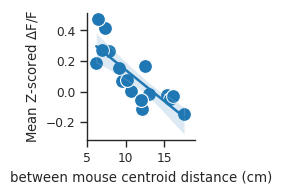

In [142]:
plt.figure(figsize=(2,2))
sns.set_style("white")
sns.set_style('ticks')
#sns.scatterplot(data=tSNE_scatter_avged_df, x='proximity', y='activity',hue="cluster",size="occupancy",sizes=(40, 400),legend="brief",alpha=.7, palette="rocket_r")
ax = sns.scatterplot(data=tSNE_scatter_avged_df, x='proximity', y='activity',s=100)
sns.regplot(data=tSNE_scatter_avged_df, x='proximity', y='activity', scatter=False, ax=ax)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.xlim(5,19)
plt.xlabel('between mouse centroid distance (cm)')
plt.ylabel('Mean Z-scored $\Delta$F/F')
#plt.title('All Mice')
# plt.show()
# plt.savefig('tSNE_proxVSactivity.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

In [44]:
# calculating prox
FS = 100
feature = 8
clusters_original = [5,1,3,14,7,4,9,12,8,13,15,2,6,10,16,11,17]
pix2cm = 30
tSNE_scatter_avged = {'proximity':[],'activity':[],'occupancy':[],'cluster':[]}
for b in range(1,18):
    label_prox = []
    label_fp = []
    label_occupancy = []
    for i,m in enumerate(r2s):
        if m not in BAD_LHb:
            for d in range(1,11):
                k = (m,d)
                if k not in BAD_SESSIONS:
                    #dist = np.sqrt(np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][0]-alldat[k]['body_part_tracking']['TopSWCentroid'][0]))+np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][1]-alldat[k]['body_part_tracking']['TopSWCentroid'][1])))/pix2cm
                    dist = alldat[k]['extracted_features'][feature]
                    label_prox.append(np.mean(dist[labels[k]==b],0))
                    ## move neural data 0.5s
                    #lhb_shifted = np.roll(alldat[k]['fp_lhb_samp'],-int(FS/2))
                    lhb_shifted = np.roll(alldat[k]['no_filt'],-int(FS/2))
                    #label_fp.append(np.mean(alldat[k]['fp_lhb_samp'][labels[k]==b],0))
                    label_fp.append(np.mean(lhb_shifted[labels[k]==b],0))
                    label_occupancy.append(np.sum(labels[k]==b)/FS)
    label_prox_avg = np.mean(label_prox,0)
    label_fp_avg  = np.mean(label_fp,0)
    label_occupancy_avg = np.mean(label_occupancy,0)
    
    # place into dataframe            
    tSNE_scatter_avged['proximity'].append(label_prox_avg)
    tSNE_scatter_avged['activity'].append(label_fp_avg)
    tSNE_scatter_avged['occupancy'].append(label_occupancy_avg)
    #tSNE_scatter_avged['cluster'].append(b)
    tSNE_scatter_avged['cluster'].append(clusters_original[b-1])
tSNE_scatter_avged_df=pd.DataFrame(tSNE_scatter_avged)

In [45]:
# calculating prox
FS = 100
clusters_original = [5,1,3,14,7,4,9,12,8,13,15,2,6,10,16,11,17]
pix2cm = 30
tSNE_scatter_R_avged = {'proximity':[],'activity':[],'occupancy':[],'cluster':[]}
for b in range(1,18):
    label_prox = []
    label_fp = []
    label_occupancy = []
    for i,m in enumerate(r2s):
        for m in r2s[RFCUTOFF:]:
            if m not in BAD_LHb:
                for d in range(1,11):
                    k = (m,d)
                    if k not in BAD_SESSIONS:
                        #dist = np.sqrt(np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][0]-alldat[k]['body_part_tracking']['TopSWCentroid'][0]))+np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][1]-alldat[k]['body_part_tracking']['TopSWCentroid'][1])))/pix2cm
                        dist = alldat[k]['extracted_features'][feature]
                        label_prox.append(np.mean(dist[labels[k]==b],0))
                        ## move neural data 0.5s
                        #lhb_shifted = np.roll(alldat[k]['fp_lhb_samp'],-int(FS/2))
                        lhb_shifted = np.roll(alldat[k]['no_filt'],-int(FS/2))
                        #label_fp.append(np.mean(alldat[k]['fp_lhb_samp'][labels[k]==b],0))
                        label_fp.append(np.mean(lhb_shifted[labels[k]==b],0))
                        label_occupancy.append(np.sum(labels[k]==b)/FS)
    label_prox_avg = np.mean(label_prox,0)
    label_fp_avg  = np.mean(label_fp,0)
    label_occupancy_avg = np.mean(label_occupancy,0)
    
    # place into dataframe            
    tSNE_scatter_R_avged['proximity'].append(label_prox_avg)
    tSNE_scatter_R_avged['activity'].append(label_fp_avg)
    tSNE_scatter_R_avged['occupancy'].append(label_occupancy_avg)
    #tSNE_scatter_avged['cluster'].append(b)
    tSNE_scatter_R_avged['cluster'].append(clusters_original[b-1])
tSNE_scatter_R_avged_df=pd.DataFrame(tSNE_scatter_R_avged)

In [46]:
FS = 100
clusters_original = [5,1,3,14,7,4,9,12,8,13,15,2,6,10,16,11,17]
pix2cm = 30
tSNE_scatter_S_avged = {'proximity':[],'activity':[],'occupancy':[],'cluster':[]}
for b in range(1,18):
    label_prox = []
    label_fp = []
    label_occupancy = []
    for i,m in enumerate(r2s):
        for m in r2s[:RFCUTOFF]:
            if m not in BAD_LHb:
                for d in range(1,11):
                    k = (m,d)
                    if k not in BAD_SESSIONS:
                        #dist = np.sqrt(np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][0]-alldat[k]['body_part_tracking']['TopSWCentroid'][0]))+np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][1]-alldat[k]['body_part_tracking']['TopSWCentroid'][1])))/pix2cm
                        dist = alldat[k]['extracted_features'][feature]
                        label_prox.append(np.mean(dist[labels[k]==b],0))
                        ## move neural data 0.5s
                        #lhb_shifted = np.roll(alldat[k]['fp_lhb_samp'],-int(FS/2))
                        lhb_shifted = np.roll(alldat[k]['no_filt'],-int(FS/2))
                        #label_fp.append(np.mean(alldat[k]['fp_lhb_samp'][labels[k]==b],0))
                        label_fp.append(np.mean(lhb_shifted[labels[k]==b],0))
                        label_occupancy.append(np.sum(labels[k]==b)/FS)
    label_prox_avg = np.mean(label_prox,0)
    label_fp_avg  = np.mean(label_fp,0)
    label_occupancy_avg = np.mean(label_occupancy,0)
    
    # place into dataframe            
    tSNE_scatter_S_avged['proximity'].append(label_prox_avg)
    tSNE_scatter_S_avged['activity'].append(label_fp_avg)
    tSNE_scatter_S_avged['occupancy'].append(label_occupancy_avg)
    #tSNE_scatter_avged['cluster'].append(b)
    tSNE_scatter_S_avged['cluster'].append(clusters_original[b-1])
tSNE_scatter_S_avged_df=pd.DataFrame(tSNE_scatter_S_avged)

In [47]:
tSNE_scatter_SR_avged = {'proximity':[],'activity':[]}#,'occupancy':[],'cluster':[]}
for i in range(1,len(clusters_original)):
    tSNE_scatter_SR_avged['proximity'].append(tSNE_scatter_avged['proximity'][i])
    tSNE_scatter_SR_avged['activity'].append(tSNE_scatter_S_avged['activity'][i]-tSNE_scatter_R_avged['activity'][i])
tSNE_scatter_SR_avged_df=pd.DataFrame(tSNE_scatter_SR_avged)

Text(0.5, 1.0, 'Stressed orientation to aggressor')

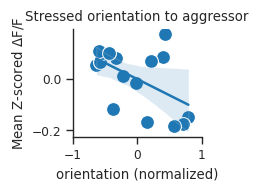

In [48]:
plt.figure(figsize=(2.3,2))
sns.set_style("white")
sns.set_style('ticks')
#sns.scatterplot(data=tSNE_scatter_avged_df, x='proximity', y='activity',hue="cluster",size="occupancy",sizes=(40, 400),legend="brief",alpha=.7, palette="rocket_r")
ax = sns.scatterplot(data=tSNE_scatter_SR_avged_df, x='proximity', y='activity',s=100)
sns.regplot(data=tSNE_scatter_SR_avged_df, x='proximity', y='activity', scatter=False, ax=ax)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.xlim(-1,1)
plt.xlabel('orientation (normalized)')
plt.ylabel('Mean Z-scored $\Delta$F/F')
plt.title('Stressed orientation to aggressor')
# plt.show()
# plt.savefig('tSNE_SR_orientationtoaggressorVSactivity.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

In [49]:
r, p = scipy.stats.pearsonr(tSNE_scatter_SR_avged_df['proximity'], tSNE_scatter_SR_avged_df['activity'])
print(p)
print(r)

0.03844996491530704
-0.5211369631179332


In [50]:
# calculating prox
FS = 100
feature = 6
clusters_original = [5,1,3,14,7,4,9,12,8,13,15,2,6,10,16,11,17]
pix2cm = 30
tSNE_scatter_avged = {'proximity':[],'activity':[],'occupancy':[],'cluster':[]}
for b in range(1,18):
    label_prox = []
    label_fp = []
    label_occupancy = []
    for i,m in enumerate(r2s):
        if m not in BAD_LHb:
            for d in range(1,11):
                k = (m,d)
                if k not in BAD_SESSIONS:
                    #dist = np.sqrt(np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][0]-alldat[k]['body_part_tracking']['TopSWCentroid'][0]))+np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][1]-alldat[k]['body_part_tracking']['TopSWCentroid'][1])))/pix2cm
                    dist = alldat[k]['extracted_features'][feature]
                    label_prox.append(np.mean(dist[labels[k]==b],0))
                    ## move neural data 0.5s
                    #lhb_shifted = np.roll(alldat[k]['fp_lhb_samp'],-int(FS/2))
                    lhb_shifted = np.roll(alldat[k]['no_filt'],-int(FS/2))
                    #label_fp.append(np.mean(alldat[k]['fp_lhb_samp'][labels[k]==b],0))
                    label_fp.append(np.mean(lhb_shifted[labels[k]==b],0))
                    label_occupancy.append(np.sum(labels[k]==b)/FS)
    label_prox_avg = np.mean(label_prox,0)
    label_fp_avg  = np.mean(label_fp,0)
    label_occupancy_avg = np.mean(label_occupancy,0)
    
    # place into dataframe            
    tSNE_scatter_avged['proximity'].append(label_prox_avg)
    tSNE_scatter_avged['activity'].append(label_fp_avg)
    tSNE_scatter_avged['occupancy'].append(label_occupancy_avg)
    #tSNE_scatter_avged['cluster'].append(b)
    tSNE_scatter_avged['cluster'].append(clusters_original[b-1])
tSNE_scatter_avged_df=pd.DataFrame(tSNE_scatter_avged)

In [51]:
# calculating prox
FS = 100
clusters_original = [5,1,3,14,7,4,9,12,8,13,15,2,6,10,16,11,17]
pix2cm = 30
tSNE_scatter_R_avged = {'proximity':[],'activity':[],'occupancy':[],'cluster':[]}
for b in range(1,18):
    label_prox = []
    label_fp = []
    label_occupancy = []
    for i,m in enumerate(r2s):
        for m in r2s[RFCUTOFF:]:
            if m not in BAD_LHb:
                for d in range(1,11):
                    k = (m,d)
                    if k not in BAD_SESSIONS:
                        #dist = np.sqrt(np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][0]-alldat[k]['body_part_tracking']['TopSWCentroid'][0]))+np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][1]-alldat[k]['body_part_tracking']['TopSWCentroid'][1])))/pix2cm
                        dist = alldat[k]['extracted_features'][feature]
                        label_prox.append(np.mean(dist[labels[k]==b],0))
                        ## move neural data 0.5s
                        #lhb_shifted = np.roll(alldat[k]['fp_lhb_samp'],-int(FS/2))
                        lhb_shifted = np.roll(alldat[k]['no_filt'],-int(FS/2))
                        #label_fp.append(np.mean(alldat[k]['fp_lhb_samp'][labels[k]==b],0))
                        label_fp.append(np.mean(lhb_shifted[labels[k]==b],0))
                        label_occupancy.append(np.sum(labels[k]==b)/FS)
    label_prox_avg = np.mean(label_prox,0)
    label_fp_avg  = np.mean(label_fp,0)
    label_occupancy_avg = np.mean(label_occupancy,0)
    
    # place into dataframe            
    tSNE_scatter_R_avged['proximity'].append(label_prox_avg)
    tSNE_scatter_R_avged['activity'].append(label_fp_avg)
    tSNE_scatter_R_avged['occupancy'].append(label_occupancy_avg)
    #tSNE_scatter_avged['cluster'].append(b)
    tSNE_scatter_R_avged['cluster'].append(clusters_original[b-1])
tSNE_scatter_R_avged_df=pd.DataFrame(tSNE_scatter_R_avged)

In [52]:
FS = 100
clusters_original = [5,1,3,14,7,4,9,12,8,13,15,2,6,10,16,11,17]
pix2cm = 30
tSNE_scatter_S_avged = {'proximity':[],'activity':[],'occupancy':[],'cluster':[]}
for b in range(1,18):
    label_prox = []
    label_fp = []
    label_occupancy = []
    for i,m in enumerate(r2s):
        for m in r2s[:RFCUTOFF]:
            if m not in BAD_LHb:
                for d in range(1,11):
                    k = (m,d)
                    if k not in BAD_SESSIONS:
                        #dist = np.sqrt(np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][0]-alldat[k]['body_part_tracking']['TopSWCentroid'][0]))+np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][1]-alldat[k]['body_part_tracking']['TopSWCentroid'][1])))/pix2cm
                        dist = alldat[k]['extracted_features'][feature]
                        label_prox.append(np.mean(dist[labels[k]==b],0))
                        ## move neural data 0.5s
                        #lhb_shifted = np.roll(alldat[k]['fp_lhb_samp'],-int(FS/2))
                        lhb_shifted = np.roll(alldat[k]['no_filt'],-int(FS/2))
                        #label_fp.append(np.mean(alldat[k]['fp_lhb_samp'][labels[k]==b],0))
                        label_fp.append(np.mean(lhb_shifted[labels[k]==b],0))
                        label_occupancy.append(np.sum(labels[k]==b)/FS)
    label_prox_avg = np.mean(label_prox,0)
    label_fp_avg  = np.mean(label_fp,0)
    label_occupancy_avg = np.mean(label_occupancy,0)
    
    # place into dataframe            
    tSNE_scatter_S_avged['proximity'].append(label_prox_avg)
    tSNE_scatter_S_avged['activity'].append(label_fp_avg)
    tSNE_scatter_S_avged['occupancy'].append(label_occupancy_avg)
    #tSNE_scatter_avged['cluster'].append(b)
    tSNE_scatter_S_avged['cluster'].append(clusters_original[b-1])
tSNE_scatter_S_avged_df=pd.DataFrame(tSNE_scatter_S_avged)

In [53]:
tSNE_scatter_SR_avged = {'proximity':[],'activity':[]}#,'occupancy':[],'cluster':[]}
for i in range(1,len(clusters_original)):
    tSNE_scatter_SR_avged['proximity'].append(tSNE_scatter_avged['proximity'][i])
    tSNE_scatter_SR_avged['activity'].append(tSNE_scatter_S_avged['activity'][i]-tSNE_scatter_R_avged['activity'][i])
tSNE_scatter_SR_avged_df=pd.DataFrame(tSNE_scatter_SR_avged)

Text(0.5, 1.0, 'Stressed side height')

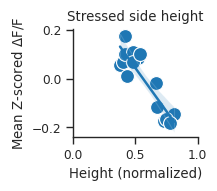

In [54]:
plt.figure(figsize=(2.3,2))
sns.set_style("white")
sns.set_style('ticks')
#sns.scatterplot(data=tSNE_scatter_avged_df, x='proximity', y='activity',hue="cluster",size="occupancy",sizes=(40, 400),legend="brief",alpha=.7, palette="rocket_r")
ax = sns.scatterplot(data=tSNE_scatter_SR_avged_df, x='proximity', y='activity',s=100)
sns.regplot(data=tSNE_scatter_SR_avged_df, x='proximity', y='activity', scatter=False, ax=ax)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.xlim(0,1)
plt.xlabel('Height (normalized)')
plt.ylabel('Mean Z-scored $\Delta$F/F')
plt.title('Stressed side height')
# plt.show()
# plt.savefig('tSNE_SR_stressedsideheightVSactivity.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

In [55]:
r, p = scipy.stats.pearsonr(tSNE_scatter_SR_avged_df['proximity'], tSNE_scatter_SR_avged_df['activity'])
print(p)
print(r)

3.61814534839434e-06
-0.8911787304989048


In [56]:
# calculating prox
FS = 100
feature = 0
clusters_original = [5,1,3,14,7,4,9,12,8,13,15,2,6,10,16,11,17]
pix2cm = 30
tSNE_scatter_avged = {'proximity':[],'activity':[],'occupancy':[],'cluster':[]}
for b in range(1,18):
    label_prox = []
    label_fp = []
    label_occupancy = []
    for i,m in enumerate(r2s):
        if m not in BAD_LHb:
            for d in range(1,11):
                k = (m,d)
                if k not in BAD_SESSIONS:
                    dist = np.sqrt(np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][0]-alldat[k]['body_part_tracking']['TopSWCentroid'][0]))+np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][1]-alldat[k]['body_part_tracking']['TopSWCentroid'][1])))/pix2cm
                    #dist = alldat[k]['extracted_features'][feature]
                    label_prox.append(np.mean(dist[labels[k]==b],0))
                    ## move neural data 0.5s
                    #lhb_shifted = np.roll(alldat[k]['fp_lhb_samp'],-int(FS/2))
                    lhb_shifted = np.roll(alldat[k]['no_filt'],-int(FS/2))
                    #label_fp.append(np.mean(alldat[k]['fp_lhb_samp'][labels[k]==b],0))
                    label_fp.append(np.mean(lhb_shifted[labels[k]==b],0))
                    label_occupancy.append(np.sum(labels[k]==b)/FS)
    label_prox_avg = np.mean(label_prox,0)
    label_fp_avg  = np.mean(label_fp,0)
    label_occupancy_avg = np.mean(label_occupancy,0)
    
    # place into dataframe            
    tSNE_scatter_avged['proximity'].append(label_prox_avg)
    tSNE_scatter_avged['activity'].append(label_fp_avg)
    tSNE_scatter_avged['occupancy'].append(label_occupancy_avg)
    #tSNE_scatter_avged['cluster'].append(b)
    tSNE_scatter_avged['cluster'].append(clusters_original[b-1])
tSNE_scatter_avged_df=pd.DataFrame(tSNE_scatter_avged)

In [57]:
# calculating prox
FS = 100
clusters_original = [5,1,3,14,7,4,9,12,8,13,15,2,6,10,16,11,17]
pix2cm = 30
tSNE_scatter_R_avged = {'proximity':[],'activity':[],'occupancy':[],'cluster':[]}
for b in range(1,18):
    label_prox = []
    label_fp = []
    label_occupancy = []
    for i,m in enumerate(r2s):
        for m in r2s[RFCUTOFF:]:
            if m not in BAD_LHb:
                for d in range(1,11):
                    k = (m,d)
                    if k not in BAD_SESSIONS:
                        dist = np.sqrt(np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][0]-alldat[k]['body_part_tracking']['TopSWCentroid'][0]))+np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][1]-alldat[k]['body_part_tracking']['TopSWCentroid'][1])))/pix2cm
                        #dist = alldat[k]['extracted_features'][feature]
                        label_prox.append(np.mean(dist[labels[k]==b],0))
                        ## move neural data 0.5s
                        #lhb_shifted = np.roll(alldat[k]['fp_lhb_samp'],-int(FS/2))
                        lhb_shifted = np.roll(alldat[k]['no_filt'],-int(FS/2))
                        #label_fp.append(np.mean(alldat[k]['fp_lhb_samp'][labels[k]==b],0))
                        label_fp.append(np.mean(lhb_shifted[labels[k]==b],0))
                        label_occupancy.append(np.sum(labels[k]==b)/FS)
    label_prox_avg = np.mean(label_prox,0)
    label_fp_avg  = np.mean(label_fp,0)
    label_occupancy_avg = np.mean(label_occupancy,0)
    
    # place into dataframe            
    tSNE_scatter_R_avged['proximity'].append(label_prox_avg)
    tSNE_scatter_R_avged['activity'].append(label_fp_avg)
    tSNE_scatter_R_avged['occupancy'].append(label_occupancy_avg)
    #tSNE_scatter_avged['cluster'].append(b)
    tSNE_scatter_R_avged['cluster'].append(clusters_original[b-1])
tSNE_scatter_R_avged_df=pd.DataFrame(tSNE_scatter_R_avged)

In [58]:
FS = 100
clusters_original = [5,1,3,14,7,4,9,12,8,13,15,2,6,10,16,11,17]
pix2cm = 30
tSNE_scatter_S_avged = {'proximity':[],'activity':[],'occupancy':[],'cluster':[]}
for b in range(1,18):
    label_prox = []
    label_fp = []
    label_occupancy = []
    for i,m in enumerate(r2s):
        for m in r2s[:RFCUTOFF]:
            if m not in BAD_LHb:
                for d in range(1,11):
                    k = (m,d)
                    if k not in BAD_SESSIONS:
                        dist = np.sqrt(np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][0]-alldat[k]['body_part_tracking']['TopSWCentroid'][0]))+np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][1]-alldat[k]['body_part_tracking']['TopSWCentroid'][1])))/pix2cm
                        #dist = alldat[k]['extracted_features'][feature]
                        label_prox.append(np.mean(dist[labels[k]==b],0))
                        ## move neural data 0.5s
                        #lhb_shifted = np.roll(alldat[k]['fp_lhb_samp'],-int(FS/2))
                        lhb_shifted = np.roll(alldat[k]['no_filt'],-int(FS/2))
                        #label_fp.append(np.mean(alldat[k]['fp_lhb_samp'][labels[k]==b],0))
                        label_fp.append(np.mean(lhb_shifted[labels[k]==b],0))
                        label_occupancy.append(np.sum(labels[k]==b)/FS)
    label_prox_avg = np.mean(label_prox,0)
    label_fp_avg  = np.mean(label_fp,0)
    label_occupancy_avg = np.mean(label_occupancy,0)
    
    # place into dataframe            
    tSNE_scatter_S_avged['proximity'].append(label_prox_avg)
    tSNE_scatter_S_avged['activity'].append(label_fp_avg)
    tSNE_scatter_S_avged['occupancy'].append(label_occupancy_avg)
    #tSNE_scatter_avged['cluster'].append(b)
    tSNE_scatter_S_avged['cluster'].append(clusters_original[b-1])
tSNE_scatter_S_avged_df=pd.DataFrame(tSNE_scatter_S_avged)

In [59]:
tSNE_scatter_SR_avged = {'proximity':[],'activity':[]}#,'occupancy':[],'cluster':[]}
for i in range(1,len(clusters_original)):
    tSNE_scatter_SR_avged['proximity'].append(tSNE_scatter_avged['proximity'][i])
    tSNE_scatter_SR_avged['activity'].append(tSNE_scatter_S_avged['activity'][i]-tSNE_scatter_R_avged['activity'][i])
tSNE_scatter_SR_avged_df=pd.DataFrame(tSNE_scatter_SR_avged)

Text(0.5, 1.0, 'Proximity')

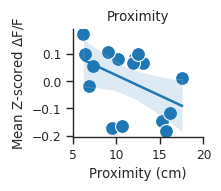

In [60]:
plt.figure(figsize=(2.3,2))
sns.set_style("white")
sns.set_style('ticks')
#sns.scatterplot(data=tSNE_scatter_avged_df, x='proximity', y='activity',hue="cluster",size="occupancy",sizes=(40, 400),legend="brief",alpha=.7, palette="rocket_r")
ax = sns.scatterplot(data=tSNE_scatter_SR_avged_df, x='proximity', y='activity',s=100)
sns.regplot(data=tSNE_scatter_SR_avged_df, x='proximity', y='activity', scatter=False, ax=ax)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.xlim(5,20)
plt.xlabel('Proximity (cm)')
plt.ylabel('Mean Z-scored $\Delta$F/F')
plt.title('Proximity')
# plt.show()
# plt.savefig('tSNE_SR_proximityVSactivity.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

In [61]:
r, p = scipy.stats.pearsonr(tSNE_scatter_SR_avged_df['proximity'], tSNE_scatter_SR_avged_df['activity'])
print(p)
print(r)

0.07642827158769748
-0.45521771764955477


In [62]:
long_wall_check = pickle.load(open('features_wall.p','rb'),encoding='latin')

In [70]:
## Anna: 0 - short; 1 - long; 2 - closest
feature = 2
for k in alldat:
    if k[1] < 10:
        title_name = 'm' + str(k[0]) + '_csds' + str(k[1]) + '_'
        alldat[k]['long_check'] = long_wall_check[title_name][feature]
#         alldat[k]['distance_to_wall_raw'] = features_wall[title_name][feature]
#         alldat[k]['distance_to_short_wall_raw'] = features_wall[title_name]['short_wall']
#         alldat[k]['distance_to_long_wall_raw'] = features_wall[title_name]['long_wall']
    else:
        title_name = 'm' + str(k[0]) + '_csds' + str(k[1])
        alldat[k]['long_check'] = long_wall_check[title_name][feature]
#         alldat[k]['distance_to_wall_raw'] = features_wall[title_name][feature]
#         alldat[k]['distance_to_short_wall_raw'] = features_wall[title_name]['short_wall']
#         alldat[k]['distance_to_long_wall_raw'] = features_wall[title_name]['long_wall']

In [86]:
# calculating prox
FS = 100
clusters_original = [5,1,3,14,7,4,9,12,8,13,15,2,6,10,16,11,17]
pix2cm = 30
tSNE_scatter_avged = {'proximity':[],'activity':[],'occupancy':[],'cluster':[]}
for b in range(1,18):
    label_prox = []
    label_fp = []
    label_occupancy = []
    for i,m in enumerate(r2s):
        if m not in BAD_LHb:
            for d in range(1,11):
                k = (m,d)
                if k not in BAD_SESSIONS:
                    dist = alldat[k]['long_check']
                    #dist = alldat[k]['extracted_features'][feature]
                    label_prox.append(np.mean(dist[labels[k]==b],0))
                    ## move neural data 0.5s
                    #lhb_shifted = np.roll(alldat[k]['fp_lhb_samp'],-int(FS/2))
                    lhb_shifted = np.roll(alldat[k]['no_filt'],-int(FS/2))
                    #label_fp.append(np.mean(alldat[k]['fp_lhb_samp'][labels[k]==b],0))
                    label_fp.append(np.mean(lhb_shifted[labels[k]==b],0))
                    label_occupancy.append(np.sum(labels[k]==b)/FS)
    label_prox_avg = np.mean(label_prox,0)
    label_fp_avg  = np.mean(label_fp,0)
    label_occupancy_avg = np.mean(label_occupancy,0)
    
    # place into dataframe            
    tSNE_scatter_avged['proximity'].append(label_prox_avg)
    tSNE_scatter_avged['activity'].append(label_fp_avg)
    tSNE_scatter_avged['occupancy'].append(label_occupancy_avg)
    #tSNE_scatter_avged['cluster'].append(b)
    tSNE_scatter_avged['cluster'].append(clusters_original[b-1])
tSNE_scatter_avged_df=pd.DataFrame(tSNE_scatter_avged)

In [71]:
# calculating prox
FS = 100
clusters_original = [5,1,3,14,7,4,9,12,8,13,15,2,6,10,16,11,17]
pix2cm = 30
tSNE_scatter_R_avged = {'proximity':[],'activity':[],'occupancy':[],'cluster':[]}
for b in range(1,18):
    label_prox = []
    label_fp = []
    label_occupancy = []
    for i,m in enumerate(r2s):
        for m in r2s[RFCUTOFF:]:
            if m not in BAD_LHb:
                for d in range(1,11):
                    k = (m,d)
                    if k not in BAD_SESSIONS:
                        #dist = np.sqrt(np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][0]-alldat[k]['body_part_tracking']['TopSWCentroid'][0]))+np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][1]-alldat[k]['body_part_tracking']['TopSWCentroid'][1])))/pix2cm
                        #dist = alldat[k]['extracted_features'][feature]
                        dist = alldat[k]['long_check']
                        label_prox.append(np.mean(dist[labels[k]==b],0))
                        ## move neural data 0.5s
                        lhb_shifted = np.roll(alldat[k]['no_filt'],-int(FS/2))
                        #label_fp.append(np.mean(alldat[k]['fp_lhb_samp'][labels[k]==b],0))
                        label_fp.append(np.mean(lhb_shifted[labels[k]==b],0))
                        label_occupancy.append(np.sum(labels[k]==b)/FS)
    label_prox_avg = np.mean(label_prox,0)
    label_fp_avg  = np.mean(label_fp,0)
    label_occupancy_avg = np.mean(label_occupancy,0)
    
    # place into dataframe            
    tSNE_scatter_R_avged['proximity'].append(label_prox_avg)
    tSNE_scatter_R_avged['activity'].append(label_fp_avg)
    tSNE_scatter_R_avged['occupancy'].append(label_occupancy_avg)
    #tSNE_scatter_avged['cluster'].append(b)
    tSNE_scatter_R_avged['cluster'].append(clusters_original[b-1])
tSNE_scatter_R_avged_df=pd.DataFrame(tSNE_scatter_R_avged)

In [72]:
FS = 100
clusters_original = [5,1,3,14,7,4,9,12,8,13,15,2,6,10,16,11,17]
pix2cm = 30
tSNE_scatter_S_avged = {'proximity':[],'activity':[],'occupancy':[],'cluster':[]}
for b in range(1,18):
    label_prox = []
    label_fp = []
    label_occupancy = []
    for i,m in enumerate(r2s):
        for m in r2s[:RFCUTOFF]:
            if m not in BAD_LHb:
                for d in range(1,11):
                    k = (m,d)
                    if k not in BAD_SESSIONS:
                        #dist = np.sqrt(np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][0]-alldat[k]['body_part_tracking']['TopSWCentroid'][0]))+np.square((alldat[k]['body_part_tracking']['TopBLCentroid'][1]-alldat[k]['body_part_tracking']['TopSWCentroid'][1])))/pix2cm
                        #dist = alldat[k]['extracted_features'][feature]
                        dist = alldat[k]['long_check']
                        label_prox.append(np.mean(dist[labels[k]==b],0))
                        ## move neural data 0.5s
                        lhb_shifted = np.roll(alldat[k]['no_filt'],-int(FS/2))
                        #label_fp.append(np.mean(alldat[k]['fp_lhb_samp'][labels[k]==b],0))
                        label_fp.append(np.mean(lhb_shifted[labels[k]==b],0))
                        label_occupancy.append(np.sum(labels[k]==b)/FS)
    label_prox_avg = np.mean(label_prox,0)
    label_fp_avg  = np.mean(label_fp,0)
    label_occupancy_avg = np.mean(label_occupancy,0)
    
    # place into dataframe            
    tSNE_scatter_S_avged['proximity'].append(label_prox_avg)
    tSNE_scatter_S_avged['activity'].append(label_fp_avg)
    tSNE_scatter_S_avged['occupancy'].append(label_occupancy_avg)
    #tSNE_scatter_avged['cluster'].append(b)
    tSNE_scatter_S_avged['cluster'].append(clusters_original[b-1])
tSNE_scatter_S_avged_df=pd.DataFrame(tSNE_scatter_S_avged)

In [89]:
tSNE_scatter_SR_avged = {'proximity':[],'activity':[]}#,'occupancy':[],'cluster':[]}
for i in range(1,len(clusters_original)):
    tSNE_scatter_SR_avged['proximity'].append(tSNE_scatter_avged['proximity'][i])
    tSNE_scatter_SR_avged['activity'].append(tSNE_scatter_S_avged['activity'][i]-tSNE_scatter_R_avged['activity'][i])
tSNE_scatter_SR_avged_df=pd.DataFrame(tSNE_scatter_SR_avged)

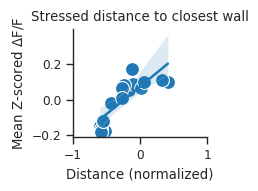

In [90]:
plt.figure(figsize=(2.3,2))
sns.set_style("white")
sns.set_style('ticks')
#sns.scatterplot(data=tSNE_scatter_avged_df, x='proximity', y='activity',hue="cluster",size="occupancy",sizes=(40, 400),legend="brief",alpha=.7, palette="rocket_r")
ax = sns.scatterplot(data=tSNE_scatter_SR_avged_df, x='proximity', y='activity',s=100)
sns.regplot(data=tSNE_scatter_SR_avged_df, x='proximity', y='activity', scatter=False, ax=ax)
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.xlim(-1,1)
plt.xlabel('Distance (normalized)')
plt.ylabel('Mean Z-scored $\Delta$F/F')
plt.title('Stressed distance to closest wall')
# plt.show()
plt.savefig('tSNE_SR_closestwallVSactivity_ugly.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

In [91]:
r, p = scipy.stats.pearsonr(tSNE_scatter_SR_avged_df['proximity'], tSNE_scatter_SR_avged_df['activity'])
print(p)
print(r)

9.01393437219382e-05
0.8229970436081369


In [120]:
cluster = 17
sparse_time = 0
FS=100
for behavior in ['close proximity']:
    #preattack2nac={}
    #postattack2nac={}
    preattack2lhb={}
    postattack2lhb={}
    #preattack2ts={}
    #postattack2ts={}
    preXs={}
    postXs={}
    span=2*FS
    sns.set_style("ticks")

    for m in r2s:
        #if m ==30 or m in BAD_NAC:
        if m ==30 or m in BAD_LHb:
            continue
        ims={('LHb','onset'):[],
             ('LHb','offset'):[]}
            #('VTA-NAc','onset'):[],
             #('SN-TS','onset'):[],
             #('VTA-NAc','offset'):[],
             #('SN-TS','offset'):[]}
        for d in range(1,11):
            k=(m,d)
            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            if k in BAD_SESSIONS:
                continue
            #if k not in rf_scores or 'fpnac_samp' not in alldat[k]:
            if k not in rf_scores or 'no_filt' not in alldat[k]:
                continue
                
            ## Find behavior sessions 
            #attack=(alldat[k]['body_part_tracking']['TopBetweenCentroidDistance']<120).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm
            attack=(labels[k]==cluster).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm

            if not np.sum(attack):
                continue
            starts = np.where(attack[1:]-attack[:-1]==1)[0] ## Find frames where behaviors start
            sparse_starts= [a for i,a in enumerate(starts) if np.sum(attack[a-FS*sparse_time:a])==0] ## Select starts that happen >1s apart
            #sparse_starts = starts
            
            ends = np.where(attack[:-1]-attack[1:]==1)[0] ## Find frames where behaviors end
            sparse_ends= [a for i,a in enumerate(ends) if np.sum(attack[a+1:a+FS*sparse_time])==0] ## Select ends that happen >1s apart
            #sparse_ends = ends
            
            #before=np.array([(np.arange(start-span,start+span)/FS*FP_FS).astype(int) for start in sparse_starts if (start+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])
            #after=np.array([(np.arange(end-span,end+span)/FS*FP_FS).astype(int) for end in sparse_ends if end-span>0 and (end+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])
            
            ## Create sessions 2s before and 2s after start/end + exclude starts/ends that occur at the edges 
            before=np.array([(np.arange(start-span,start+span)).astype(int) for start in sparse_starts if (start+span)<len(alldat[k]['fp_lhb_samp'])])
            after=np.array([(np.arange(end-span,end+span)).astype(int) for end in sparse_ends if end-span>0 and (end+span)<len(alldat[k]['fp_lhb_samp'])])
            
            if not len(before) or not len(after):
                continue
            #preattack2nac[k]=[alldat[k]['fpnac_samp'][b]-alldat[k]['fpnac_samp'][b][:span].mean() for b in before]
            #postattack2nac[k]=[alldat[k]['fpnac_samp'][a]-alldat[k]['fpnac_samp'][a][:span].mean() for a in after]
            #preattack2ts[k]=[alldat[k]['fpts_samp'][b]-alldat[k]['fpts_samp'][b][:span].mean() for b in before]
            #postattack2ts[k]=[alldat[k]['fpts_samp'][a]-alldat[k]['fpts_samp'][a][:span].mean() for a in after]
            #preattack2lhb[k]=[alldat[k]['fp_lhb_samp'][b]-alldat[k]['fp_lhb_samp'][b][:span].mean() for b in before]
            preattack2lhb[k]=[alldat[k]['no_filt'][b] for b in before]
            #postattack2lhb[k]=[alldat[k]['fp_lhb_samp'][a]-alldat[k]['fp_lhb_samp'][a][:span].mean() for a in after]
            postattack2lhb[k]=[alldat[k]['no_filt'][a] for a in after]

            preX=np.zeros((before.shape[0],before.shape[1]))
            postX=np.zeros((before.shape[0],before.shape[1]))
            
#             ims[('VTA-NAc','onset')].append(preattack2nac[k])
#             ims[('VTA-NAc','offset')].append(postattack2nac[k])
#             ims[('SN-TS','onset')].append(preattack2ts[k])
#             ims[('SN-TS','offset')].append(postattack2ts[k])
            ims[('LHb','onset')].append(preattack2lhb[k])
            ims[('LHb','offset')].append(postattack2lhb[k])
#     s=plot_neural(behavior,preattack2lhb,postattack2lhb,lims=(-1.5,2),
#           save=False)

#     prox_summary=s

## Place into a dataframe
time = np.arange(-2,2,1/100)

tSNE_timecourse_onset = {'m':[],'d':[],'t':[],'onset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in preattack2lhb: 
            for trial in range(0,len(preattack2lhb[k])):
                for frame in range(0,len(preattack2lhb[k][0])):
                    tSNE_timecourse_onset['m'].append(m)
                    tSNE_timecourse_onset['d'].append(d)
                    tSNE_timecourse_onset['t'].append(time[frame])
                    tSNE_timecourse_onset['onset'].append(preattack2lhb[k][trial][frame])
                    tSNE_timecourse_onset['r2s'].append(i)
                    tSNE_timecourse_onset['rb'].append(i>=RFCUTOFF)
tSNE_timecourse_onset_df=pd.DataFrame(tSNE_timecourse_onset)

tSNE_timecourse_offset = {'m':[],'d':[],'t':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in postattack2lhb: 
            for trial in range(0,len(postattack2lhb[k])):
                for frame in range(0,len(postattack2lhb[k][0])):
                    tSNE_timecourse_offset['m'].append(m)
                    tSNE_timecourse_offset['d'].append(d)
                    tSNE_timecourse_offset['t'].append(time[frame])
                    tSNE_timecourse_offset['offset'].append(postattack2lhb[k][trial][frame])
                    tSNE_timecourse_offset['r2s'].append(i)
                    tSNE_timecourse_offset['rb'].append(i>=RFCUTOFF)
tSNE_timecourse_offset_df=pd.DataFrame(tSNE_timecourse_offset)

## Average across all events and days at once (per mouse)
tSNE_timecourse_events = {'m':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        mouse_alldays_onset = []
        mouse_alldays_offset = []
        for d in range(1,11):
            k = (m,d)
            if k not in BAD_SESSIONS:
                mouse_alldays_onset.append(np.array(preattack2lhb[k][:]))
                mouse_alldays_offset.append(np.array(postattack2lhb[k][:]))
        mouse_alldays_onset_concat =  mouse_alldays_onset[0]
        mouse_alldays_offset_concat =  mouse_alldays_offset[0]
        for session in range(1,len(mouse_alldays_onset)-1):
            mouse_alldays_onset_concat =np.concatenate((mouse_alldays_onset_concat,mouse_alldays_onset[session]))
            mouse_alldays_offset_concat =np.concatenate((mouse_alldays_offset_concat,mouse_alldays_offset[session]))                
        mouse_alldays_onset_avg = np.mean(mouse_alldays_onset_concat,0) #average across all sessions and all days at once
        mouse_alldays_offset_avg = np.mean(mouse_alldays_offset_concat,0) #average across all sessions and all days at once

        # place into dataframe        
        for frame in range(0,len(time)):
            tSNE_timecourse_events['m'].append(m)
            tSNE_timecourse_events['t'].append(time[frame])
            tSNE_timecourse_events['onset'].append(mouse_alldays_onset_avg[frame])
            tSNE_timecourse_events['offset'].append(mouse_alldays_offset_avg[frame])
            tSNE_timecourse_events['r2s'].append(i)
            tSNE_timecourse_events['rb'].append(i>=RFCUTOFF)
tSNE_timecourse_events_df=pd.DataFrame(tSNE_timecourse_events)

## Average across day (per mouse)
tSNE_timecourse_day_avged = {'m':[],'d':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        for d in range(1,11):
            mouse_dayavg_onset = []
            mouse_dayavg_offset = []
            k = (m,d)
            if k not in BAD_SESSIONS:
                mouse_dayavg_onset.append(np.mean(preattack2lhb[k],0))
                mouse_dayavg_offset.append(np.mean(postattack2lhb[k],0))
                for frame in range(0,len(time)):
                    tSNE_timecourse_day_avged['m'].append(m)
                    tSNE_timecourse_day_avged['d'].append(d)
                    tSNE_timecourse_day_avged['t'].append(time[frame])
                    tSNE_timecourse_day_avged['onset'].append(mouse_dayavg_onset[0][frame])
                    tSNE_timecourse_day_avged['offset'].append(mouse_dayavg_offset[0][frame])
                    tSNE_timecourse_day_avged['r2s'].append(i)
                    tSNE_timecourse_day_avged['rb'].append(i>=RFCUTOFF)
tSNE_timecourse_day_avged_df=pd.DataFrame(tSNE_timecourse_day_avged)

## Average across day avgs to get one avg per mouse
tSNE_timecourse_avged = {'m':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        mouse_dayavg_onset = []
        mouse_dayavg_offset = []
        for d in range(1,11):
            k = (m,d)
            if k not in BAD_SESSIONS:
                mouse_dayavg_onset.append(np.mean(preattack2lhb[k],0))
                mouse_dayavg_offset.append(np.mean(postattack2lhb[k],0))
        mouse_dayavg_onset_avg = np.mean(mouse_dayavg_onset,0)
        mouse_dayavg_offset_avg = np.mean(mouse_dayavg_offset,0)
# place into dataframe            
        for frame in range(0,len(time)):
            tSNE_timecourse_avged['m'].append(m)
            tSNE_timecourse_avged['t'].append(time[frame])
            tSNE_timecourse_avged['onset'].append(mouse_dayavg_onset_avg[frame])
            tSNE_timecourse_avged['offset'].append(mouse_dayavg_offset_avg[frame])
            tSNE_timecourse_avged['r2s'].append(i)
            tSNE_timecourse_avged['rb'].append(i>=RFCUTOFF)
tSNE_timecourse_avged_df=pd.DataFrame(tSNE_timecourse_avged)

## Average across all mice to get peaks
tSNE_timecourse_avged_overall = {'t':[],'onset':[],'offset':[]}
for frame in range(0,len(time)):
    tSNE_timecourse_avged_overall['t'].append(time[frame])
    tSNE_timecourse_avged_overall['onset'].append(tSNE_timecourse_day_avged_df.loc[tSNE_timecourse_day_avged['t']==time[frame], 'onset'].mean())
    tSNE_timecourse_avged_overall['offset'].append(tSNE_timecourse_day_avged_df.loc[tSNE_timecourse_day_avged['t']==time[frame], 'offset'].mean())
tSNE_timecourse_avged_overall_df=pd.DataFrame(tSNE_timecourse_avged_overall)

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


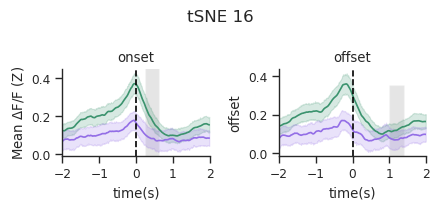

In [242]:
import matplotlib.patches as patches
fig, axes = plt.subplots(1, 2, figsize=(4.5, 2.1), sharey=False)
fig.suptitle('tSNE %i' % cluster)
sns.lineplot(ax=axes[0],data=tSNE_timecourse_events_df, x='t', y='onset', hue='rb', ci=68,palette=ggp[[1,2]],legend=False)
axes[0].set_xlabel('time(s)')
axes[0].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[0].set_title('onset')
axes[0].axvline(x=0,color='k',linestyle='--')
axes[0].set(xlim=(-2, 2))
#axes[0].set(ylim=(-.25, 1.25))
axes[0].set(xticks=range(-2, 3, 1))#, xticklabels=['a', 'b', 'c', 'd', 'e'])
axes[0].set_facecolor("white")
axes[0].add_patch(
     patches.Rectangle(
        (0.23, -0.3), #first value = left bottom x ; second value = left bottom y 
        0.4,
        1.5,
        linewidth=1, edgecolor=None, facecolor='grey',
                         zorder=0,alpha=0.2)) 
sns.despine()

sns.lineplot(ax=axes[1],data=tSNE_timecourse_events_df, x='t', y='offset', hue='rb', ci=68,palette=ggp[[1,2]],legend=False)
axes[1].set_xlabel('time(s)')
#axes[1].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[1].set_title('offset')
axes[1].axvline(x=0,color='k',linestyle='--')
#axes[1] = plt.gca()
axes[1].get_xaxis().set_visible(True)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set(xlim=(-2, 2))
#axes[0].set(ylim=(-.25, 1.25))
axes[1].set_facecolor("white")
axes[1].add_patch(
     patches.Rectangle(
        (1, -0.15), #first value = left bottom x ; second value = left bottom y 
        0.4,
        0.5,
        linewidth=1, edgecolor=None, facecolor='grey',
                         zorder=0,alpha=0.2)) 
plt.title('offset')
plt.savefig('tSNE%ivstime0s.pdf' % cluster,transparent=True,dpi=300,
                    bbox_inches='tight')

Text(0.5, 1.0, 'offset')

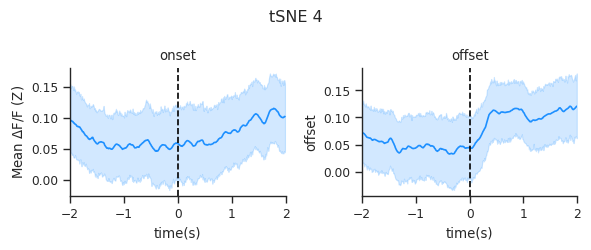

In [73]:
# all mice
fig, axes = plt.subplots(1, 2, figsize=(6, 2.5), sharey=False)
fig.suptitle('tSNE %i' % cluster)
sns.lineplot(ax=axes[0],data=tSNE_timecourse_avged_df, x='t',y='onset', ci=68,color='dodgerblue')
axes[0].set_xlabel('time(s)')
axes[0].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[0].set_title('onset')
axes[0].axvline(x=0,color='k',linestyle='--')
axes[0].set(xlim=(-2, 2))
sns.despine()

sns.lineplot(ax=axes[1],data=tSNE_timecourse_avged_df, x='t', y='offset', ci=68,color='dodgerblue')
axes[1].set_xlabel('time(s)')
#axes[1].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[1].set_title('onset')
axes[1].axvline(x=0,color='k',linestyle='--')
axes[1] = plt.gca()
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set(xlim=(-2, 2))
plt.title('offset')

In [121]:
on_peak = np.where(tSNE_timecourse_avged_overall_df['onset']==max(tSNE_timecourse_avged_overall_df['onset'][200:-1]))

In [122]:
off_peak = np.where(tSNE_timecourse_avged_overall_df['offset']==max(tSNE_timecourse_avged_overall_df['offset'][200:-1]))

close proximity LHb 262 244
196
10 11
onset 1 0.3868709772689819 0.7031506729863946
10 11
onset 2 -1.071875008829073 0.29720299474193485
9 11
onset 3 -0.4381594595939596 0.6664837301849851
10 10
onset 4 -0.8124084023154449 0.42717185704283256
8 10
onset 5 -1.0013348564758502 0.3315690813270642
10 9
onset 6 -0.6141625036748966 0.5472398760520469
8 10
onset 7 -0.5122414050916132 0.6154800819099246
8 11
onset 8 0.8196161561797317 0.4237776741035346
10 10
onset 9 -2.4591775287321576 0.024278490241673965
10 10
onset 10 -1.4390540108348107 0.16729845457227877
onset [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  196
Model:                                 GEE   No. clusters:                       21
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equ

<Figure size 1000x1000 with 0 Axes>

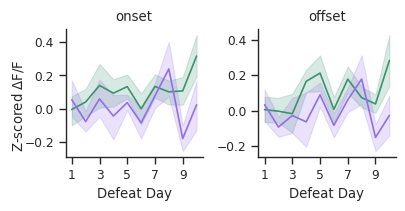

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  196
Model:                                 GEE   No. clusters:                       21
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                 9.3
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Tue, 21 May 2024   Scale:                           0.108
Covariance type:                    robust   Time:                         17:09:18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1404      0.070      2.012      0.044       0.004       0.277
si     

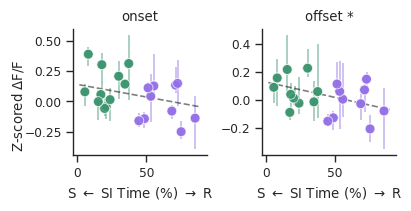

In [123]:
"""
CONSTANTS
"""
twindow = 20
#distance = 385
start_time_on = 150 #on_peak[0][0]-twindow #300 for prox 
stop_time_on = 250 #on_peak[0][0]+twindow #400 for prox   
start_time_off = off_peak[0][0]-twindow #254 for prox 
stop_time_off = off_peak[0][0]+twindow #304 for prox 

"""
PLOTTING
"""
from statsmodels.stats.multitest import multipletests
#def plot_neural(behavior,preattack2nac,postattack2nac,preattack2ts,postattack2ts,
def plot_neural_both(behavior,preattack2lhb,postattack2lhb,
               lims=[-1.5,1.5],save=False):
    sns.set_context("paper")
    sns.set_style("ticks",{
        'legend.frameon':False
    })
    
    
    ggp=np.array([[0.22953434, 0.57685998, 0.42976558, 1.        ],
                  [0.57609486, 0.42953354, 0.90002989, 1.        ],
       [0.133     , 0.133     , 0.133     , 1.        ],
       ])
    
    boxes=[]
          
        
    ms=[]
    ds=[]
    ls=[]
    ts=[]
    r2sc=[]
    rbs=[]
    
    all_ys={}
    summs=[]
#     for PRE,POST,region,color in zip([preattack2nac,preattack2ts],
#                                      [postattack2nac,postattack2ts],
#                                      ['VTA-NAc','SN-TS'],
#                                      ['dodgerblue','orange']):
    for PRE,POST,region,color in zip([preattack2lhb],
                                     [postattack2lhb],
                                     ['LHb'],
                                     ['dodgerblue']):
        pre_extreme=np.abs(np.row_stack([np.row_stack(PRE[k]) for k in PRE if k[0] in r2s[:RFCUTOFF]])[:,start_time_on:stop_time_on].mean(axis=0)).argmax()+240
        #pre_extreme=np.abs(np.row_stack([np.row_stack(PRE[k]) for k in PRE if k[0] in r2s[:RFCUTOFF]])[:,start_time_on:stop_time_on].mean(axis=0)).argmax()+FS*2
        post_extreme=np.abs(np.row_stack([np.row_stack(POST[k]) for k in POST if k[0] in r2s[:RFCUTOFF]])[:,start_time_off:stop_time_off].mean(axis=0)).argmax()+240
        #post_extreme=np.abs(np.row_stack([np.row_stack(POST[k]) for k in POST if k[0] in r2s[:RFCUTOFF]])[:,start_time_off:stop_time_off].mean(axis=0)).argmax()+FS*2
        print(behavior,region,pre_extreme,post_extreme)
        ms=[]
        ds=[]
        ls=[]
        ts=[]
        r2sc=[]
        rbs=[]
        m2weights={}
        j=0
        ys=[[[],[]],[[],[]],[[],[]]]
        noverdays=[]
    
        these_sis=[]

        for j,m in enumerate(r2s):
            i=int(j>RFCUTOFF)

            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            ons1=[]
            offs1=[]
            for d in range(1,11):
                k=(m,d)
                #if k not in postattack2nac:
                if k not in postattack2lhb:
                    continue
                ons1.append(PRE[k])
                offs1.append(POST[k])
                
                ms.append(m)
                ds.append(d)
                ls.append('onset')
                #ts.append(np.row_stack(PRE[k])[:,(pre_extreme-30):(pre_extreme+30)].mean()) #Anna: assuming 30 is FS/4?
                ts.append(np.row_stack(PRE[k])[:,(start_time_on):(stop_time_on)].mean())
                r2sc.append(j)
                rbs.append(i)
                ms.append(m)
                ds.append(d)
                ls.append('offset')
                #ts.append(np.row_stack(POST[k])[:,(post_extreme-30):(post_extreme+30)].mean())
                ts.append(np.row_stack(POST[k])[:,(start_time_off):(stop_time_off)].mean())
                r2sc.append(j)
                rbs.append(i)
                
            if len(ons1)==0:
                print(m)
                continue


        df=pd.DataFrame({'m':ms,'d':ds,'c':ls,'t':ts,'r2s':r2sc,'rb':rbs})

        df['si']=[SI_values[i] for i in df.r2s]
        df['sex']='male'

        s=make_behavior_plots(df,offset=0.5,ylabel='Z-scored $\Delta$F/F',
                              order=['onset','offset'],aspect=1.1,height=2.2)
        summs.append(s)
    return(summs,df)

FS=100
for behavior in ['close proximity']:
    #preattack2nac={}
    #postattack2nac={}
    preattack2lhb={}
    postattack2lhb={}
    #preattack2ts={}
    #postattack2ts={}
    preXs={}
    postXs={}
    span=2*FS
    sns.set_style("ticks")

    for m in r2s:
        #if m ==30 or m in BAD_NAC:
        if m ==30 or m in BAD_LHb:
            continue
        ims={('LHb','onset'):[],
             ('LHb','offset'):[]}
            #('VTA-NAc','onset'):[],
             #('SN-TS','onset'):[],
             #('VTA-NAc','offset'):[],
             #('SN-TS','offset'):[]}
        for d in range(1,11):
            k=(m,d)
            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            if k in BAD_SESSIONS:
                continue
            #if k not in rf_scores or 'fpnac_samp' not in alldat[k]:
            if k not in rf_scores or 'no_filt' not in alldat[k]:
                continue
                
            #attack=(alldat[k]['body_part_tracking']['TopBetweenCentroidDistance']<distance).astype(int)#SHOULD BE #322 120 #Anna: change to 5 as it is in cm
            #attack=(rf_scores_new[k]['a']==True).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm
            attack=(labels[k]==cluster).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm

            if not np.sum(attack):
                continue
            starts = np.where(attack[1:]-attack[:-1]==1)[0]
            sparse_starts= [a for i,a in enumerate(starts) if np.sum(attack[a-FS*sparse_time:a])==0]

            ends = np.where(attack[:-1]-attack[1:]==1)[0]
            sparse_ends= [a for i,a in enumerate(ends) if np.sum(attack[a+1:a+FS*sparse_time])==0]

            #before=np.array([(np.arange(start-span,start+span)/FS*FP_FS).astype(int) for start in sparse_starts if (start+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])
            #after=np.array([(np.arange(end-span,end+span)/FS*FP_FS).astype(int) for end in sparse_ends if end-span>0 and (end+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])

            before=np.array([(np.arange(start-span,start+span)).astype(int) for start in sparse_starts if (start+span)<len(alldat[k]['no_filt'])])
            after=np.array([(np.arange(end-span,end+span)).astype(int) for end in sparse_ends if end-span>0 and (end+span)<len(alldat[k]['no_filt'])])
            
            if not len(before) or not len(after):
                continue
            #preattack2nac[k]=[alldat[k]['fpnac_samp'][b]-alldat[k]['fpnac_samp'][b][:span].mean() for b in before]
            #postattack2nac[k]=[alldat[k]['fpnac_samp'][a]-alldat[k]['fpnac_samp'][a][:span].mean() for a in after]
            #preattack2ts[k]=[alldat[k]['fpts_samp'][b]-alldat[k]['fpts_samp'][b][:span].mean() for b in before]
            #postattack2ts[k]=[alldat[k]['fpts_samp'][a]-alldat[k]['fpts_samp'][a][:span].mean() for a in after]
           # preattack2lhb[k]=[alldat[k]['fp_lhb_samp'][b]-alldat[k]['fp_lhb_samp'][b][:span].mean() for b in before]
           # postattack2lhb[k]=[alldat[k]['fp_lhb_samp'][a]-alldat[k]['fp_lhb_samp'][a][:span].mean() for a in after]
            preattack2lhb[k]=[alldat[k]['no_filt'][b] for b in before]
            postattack2lhb[k]=[alldat[k]['no_filt'][a] for a in after]

            preX=np.zeros((before.shape[0],before.shape[1]))
            postX=np.zeros((before.shape[0],before.shape[1]))
            
#             ims[('VTA-NAc','onset')].append(preattack2nac[k])
#             ims[('VTA-NAc','offset')].append(postattack2nac[k])
#             ims[('SN-TS','onset')].append(preattack2ts[k])
#             ims[('SN-TS','offset')].append(postattack2ts[k])
            ims[('LHb','onset')].append(preattack2lhb[k])
            ims[('LHb','offset')].append(postattack2lhb[k])
    s,dat=plot_neural_both(behavior,preattack2lhb,postattack2lhb,lims=(-1.5,2),
          save=False)

    prox_summary=s
    
# plt.savefig('attackvsSI.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

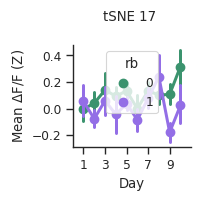

In [429]:
fig, axes = plt.subplots(1, 1, figsize=(2.1, 2.1), sharey=False)
sns.pointplot(data=dat.loc[(dat['c']=='onset')], x="d", y="t", hue="rb",ci=68,palette=pal2,markersize=20,legend=True,)
plt.xlabel('Day')
plt.ylabel('Mean $\Delta$F/F (Z)',va='bottom')
plt.xticks(np.arange(0,10,step=2))
plt.xlim(-1,10)
plt.title('tSNE %i \n' % cluster)
sns.despine()
plt.savefig('tSNE%ivsday0s.pdf' % cluster,transparent=True,dpi=300,
                    bbox_inches='tight')

In [124]:
tSNE_day1 = {'m':[],'onset':[],'r2s':[],'rb':[],'si':[]}
for i,m in enumerate(r2s):
    for d in range(1,2):
        k = (m,d)
        if k in preattack2lhb: 
            tSNE_day1['m'].append(m)
            #attack_days['d'].append(d)
            tSNE_day1['onset'].append(np.mean(np.mean(np.array(preattack2lhb[k])[:,start_time_on:stop_time_on],1)))
            tSNE_day1['r2s'].append(i)
            tSNE_day1['rb'].append(i>=RFCUTOFF)
            tSNE_day1['si'].append(SI_values[i])
tSNE_day1_df=pd.DataFrame(tSNE_day1)

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


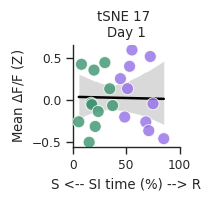

In [125]:
fig, axes = plt.subplots(1, 1, figsize=(2.1, 2.1), sharey=False)
sns.scatterplot(data=tSNE_day1_df,y='onset',x='si',hue='rb',
                          legend=False,s=75,ci=68, palette=ggp[[1,2]],alpha=0.8,zorder=500,marker='o')
sns.regplot(data=tSNE_day1_df, x='si', y='onset', scatter=False,color='k')
plt.xlabel('S <-- SI time (%) --> R')
plt.ylabel('Mean $\Delta$F/F (Z)',va='bottom')
plt.xlim((0,100))
plt.title('tSNE %i \nDay 1' % cluster)
#plt.set_facecolor("white")
sns.despine()

plt.savefig('tSNE%ivsSIDay1_time0s.pdf' % cluster,transparent=True,dpi=300,
                     bbox_inches='tight')

In [126]:
r, p = scipy.stats.pearsonr(tSNE_day1_df['si'], tSNE_day1_df['onset'])
print(p)
print(r)

0.9291787207400556
-0.02065777765702117


In [250]:
tSNE_alldays = {'m':[],'d':[],'onset':[],'r2s':[],'rb':[],'si':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in preattack2lhb: 
            tSNE_alldays['m'].append(m)
            tSNE_alldays['d'].append(d)
            tSNE_alldays['onset'].append(np.mean(np.mean(np.array(preattack2lhb[k])[:,start_time_on:stop_time_on],1)))
            tSNE_alldays['r2s'].append(i)
            tSNE_alldays['rb'].append(i>=RFCUTOFF)
            tSNE_alldays['si'].append(SI_values[i])
tSNE_alldays_df=pd.DataFrame(tSNE_alldays)

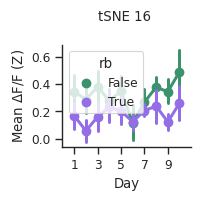

In [253]:
fig, axes = plt.subplots(1, 1, figsize=(2.1, 2.1), sharey=False)
sns.pointplot(data=tSNE_alldays_df, x="d", y="onset", hue="rb",ci=68,palette=pal2,markersize=20,legend=True,)
plt.xlabel('Day')
plt.ylabel('Mean $\Delta$F/F (Z)',va='bottom')
plt.xticks(np.arange(0,10,step=2))
plt.xlim(-1,10)
plt.title('tSNE %i \n' % cluster)
sns.despine()
# plt.savefig('tSNE%ivsday0s.pdf' % cluster,transparent=True,dpi=300,
#                     bbox_inches='tight')

In [128]:
total_frames = 7*60*FS

tSNE_occupancy = {'m':[],'d':[],'cluster':[],'occupancy':[],'r2s':[],'rb':[],'si':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        for b in range (1,18):
            tSNE_occupancy['m'].append(m)
            tSNE_occupancy['d'].append(d)
            tSNE_occupancy['cluster'].append(b)
            tSNE_occupancy['occupancy'].append(np.sum(labels[(m,d)]==b)/total_frames*100)
            tSNE_occupancy['r2s'].append(i)
            tSNE_occupancy['rb'].append(i>=RFCUTOFF)
            tSNE_occupancy['si'].append(SI_values[i])
tSNE_occupancy_df=pd.DataFrame(tSNE_occupancy)

tSNE_occupancy_day_avged = {'m':[],'cluster':[],'occupancy':[],'r2s':[],'rb':[],'si':[]}
for i,m in enumerate(r2s):    
    for b in range (1,18):
        mouse_occupancy = []   
        for d in range(1,11):
            mouse_occupancy.append(np.sum(labels[(m,d)]==b)/total_frames*100)
        
        # Place into a dataframe
        tSNE_occupancy_day_avged['m'].append(m)
        tSNE_occupancy_day_avged['cluster'].append(b)
        tSNE_occupancy_day_avged['occupancy'].append(np.mean(mouse_occupancy))
        tSNE_occupancy_day_avged['r2s'].append(i)
        tSNE_occupancy_day_avged['rb'].append(i>=RFCUTOFF)
        tSNE_occupancy_day_avged['si'].append(SI_values[i])
tSNE_occupancy_day_avged_df=pd.DataFrame(tSNE_occupancy_day_avged)

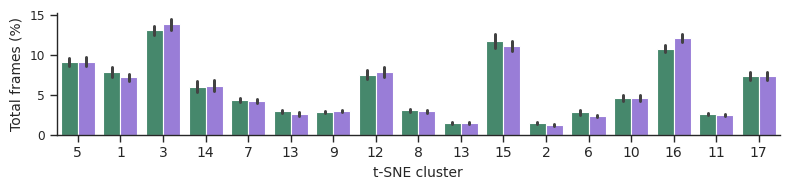

In [131]:
category_order = [12,13,16,2,9,10,11,4,17,15,6,3,8,14,7,5,1]
plt.rcParams['font.size'] = 10
#sns.catplot(data=tSNE_bars_avg_df, x="b", y="t", hue="rb", kind="box",palette=ggp[[1,2]],legend=False)
sns.catplot(data=tSNE_occupancy_day_avged_df, x="cluster", y="occupancy", hue="rb", kind="bar",ci=68, palette=ggp[[1,2]],legend=False, height=2,aspect=4) #, orient='h',order=category_order)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Total frames (%)',size = 10)
plt.xlabel('t-SNE cluster',size = 10)
plt.xticks(np.arange(0,17), [5,1,3,14,7,13,9,12,8,13,15,2,6,10,16,11,17],size = 10)
#plt.yticks(np.arange(0,17), [2,6,11,1,8,13,15,14,17,16,4,3,12,10,9,7,5])
plt.savefig('tsne_occupancy_bar.pdf',transparent=True,dpi=300,
                   bbox_inches='tight')

In [82]:
import scipy.stats as stats
b = 15
stats.ttest_ind(tSNE_occupancy_day_avged_df.loc[(tSNE_occupancy_day_avged_df['rb']==False) & (tSNE_occupancy_day_avged_df['cluster']==b),'occupancy'], tSNE_occupancy_day_avged_df.loc[(tSNE_occupancy_day_avged_df['rb']==True) & (tSNE_occupancy_day_avged_df['cluster']==b),'occupancy'])

Ttest_indResult(statistic=-2.00663233743321, pvalue=0.05303982042321322)

In [141]:
sparse_time = 6
FS=100
for behavior in ['close proximity']:
    #preattack2nac={}
    #postattack2nac={}
    preattack2lhb={}
    postattack2lhb={}
    #preattack2ts={}
    #postattack2ts={}
    preXs={}
    postXs={}
    span=2*FS
    sns.set_style("ticks")

    for m in r2s:
        #if m ==30 or m in BAD_NAC:
        if m ==30 or m in BAD_LHb:
            continue
        ims={('LHb','onset'):[],
             ('LHb','offset'):[]}
            #('VTA-NAc','onset'):[],
             #('SN-TS','onset'):[],
             #('VTA-NAc','offset'):[],
             #('SN-TS','offset'):[]}
        for d in range(1,11):
            k=(m,d)
            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            if k in BAD_SESSIONS:
                continue
            #if k not in rf_scores or 'fpnac_samp' not in alldat[k]:
            if k not in rf_scores_new or 'no_filt' not in alldat[k]:
                continue
                
            #attack=(alldat[k]['body_part_tracking']['TopBetweenCentroidDistance']<120).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm
            attack=(rf_scores_new[k]['a']==True).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm

            if not np.sum(attack):
                continue
            starts = np.where(attack[1:]-attack[:-1]==1)[0]
            sparse_starts= [a for i,a in enumerate(starts) if np.sum(attack[a-FS*sparse_time:a])==0]

            ends = np.where(attack[:-1]-attack[1:]==1)[0]
            sparse_ends= [a for i,a in enumerate(ends) if np.sum(attack[a+1:a+FS*sparse_time])==0]

            #before=np.array([(np.arange(start-span,start+span)/FS*FP_FS).astype(int) for start in sparse_starts if (start+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])
            #after=np.array([(np.arange(end-span,end+span)/FS*FP_FS).astype(int) for end in sparse_ends if end-span>0 and (end+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])

            before=np.array([(np.arange(start-span,start+span)).astype(int) for start in sparse_starts if (start+span)<len(alldat[k]['no_filt'])])
            after=np.array([(np.arange(end-span,end+span)).astype(int) for end in sparse_ends if end-span>0 and (end+span)<len(alldat[k]['no_filt'])])
            
            if not len(before) or not len(after):
                continue
            #preattack2nac[k]=[alldat[k]['fpnac_samp'][b]-alldat[k]['fpnac_samp'][b][:span].mean() for b in before]
            #postattack2nac[k]=[alldat[k]['fpnac_samp'][a]-alldat[k]['fpnac_samp'][a][:span].mean() for a in after]
            #preattack2ts[k]=[alldat[k]['fpts_samp'][b]-alldat[k]['fpts_samp'][b][:span].mean() for b in before]
            #postattack2ts[k]=[alldat[k]['fpts_samp'][a]-alldat[k]['fpts_samp'][a][:span].mean() for a in after]
            preattack2lhb[k]=[alldat[k]['no_filt'][b]-alldat[k]['no_filt'][b][:span].mean() for b in before]
            #preattack2lhb[k]=[alldat[k]['fp_lhb_samp'][b] for b in before]
            postattack2lhb[k]=[alldat[k]['no_filt'][a]-alldat[k]['no_filt'][a][:span].mean() for a in after]
            #postattack2lhb[k]=[alldat[k]['fp_lhb_samp'][a] for a in after]

            preX=np.zeros((before.shape[0],before.shape[1]))
            postX=np.zeros((before.shape[0],before.shape[1]))
            
#             ims[('VTA-NAc','onset')].append(preattack2nac[k])
#             ims[('VTA-NAc','offset')].append(postattack2nac[k])
#             ims[('SN-TS','onset')].append(preattack2ts[k])
#             ims[('SN-TS','offset')].append(postattack2ts[k])
            ims[('LHb','onset')].append(preattack2lhb[k])
            ims[('LHb','offset')].append(postattack2lhb[k])
            
## Place into a dataframe
time = np.arange(-2,2,1/100)

attack_timecourse_onset = {'m':[],'d':[],'t':[],'onset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in preattack2lhb: 
            for trial in range(0,len(preattack2lhb[k])):
                for frame in range(0,len(preattack2lhb[k][0])):
                    attack_timecourse_onset['m'].append(m)
                    attack_timecourse_onset['d'].append(d)
                    attack_timecourse_onset['t'].append(time[frame])
                    attack_timecourse_onset['onset'].append(preattack2lhb[k][trial][frame])
                    attack_timecourse_onset['r2s'].append(i)
                    attack_timecourse_onset['rb'].append(i>=RFCUTOFF)
attack_timecourse_onset_df=pd.DataFrame(attack_timecourse_onset)

attack_timecourse_offset = {'m':[],'d':[],'t':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in postattack2lhb: 
            for trial in range(0,len(postattack2lhb[k])):
                for frame in range(0,len(postattack2lhb[k][0])):
                    attack_timecourse_offset['m'].append(m)
                    attack_timecourse_offset['d'].append(d)
                    attack_timecourse_offset['t'].append(time[frame])
                    attack_timecourse_offset['offset'].append(postattack2lhb[k][trial][frame])
                    attack_timecourse_offset['r2s'].append(i)
                    attack_timecourse_offset['rb'].append(i>=RFCUTOFF)
attack_timecourse_offset_df=pd.DataFrame(attack_timecourse_offset)

## Average across all events and days at once (per mouse)
attack_timecourse_events = {'m':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        mouse_alldays_onset = []
        mouse_alldays_offset = []
        for d in range(1,11):
            k = (m,d)
            #if k not in BAD_SESSIONS:
            if k in preattack2lhb:
                mouse_alldays_onset.append(np.array(preattack2lhb[k][:]))
                mouse_alldays_offset.append(np.array(postattack2lhb[k][:]))
        mouse_alldays_onset_concat =  mouse_alldays_onset[0]
        mouse_alldays_offset_concat =  mouse_alldays_offset[0]
        for session in range(1,len(mouse_alldays_onset)-1):
            mouse_alldays_onset_concat =np.concatenate((mouse_alldays_onset_concat,mouse_alldays_onset[session]))
            mouse_alldays_offset_concat =np.concatenate((mouse_alldays_offset_concat,mouse_alldays_offset[session]))                
        mouse_alldays_onset_avg = np.mean(mouse_alldays_onset_concat,0) #average across all sessions and all days at once
        mouse_alldays_offset_avg = np.mean(mouse_alldays_offset_concat,0) #average across all sessions and all days at once

        # place into dataframe        
        for frame in range(0,len(time)):
            attack_timecourse_events['m'].append(m)
            attack_timecourse_events['t'].append(time[frame])
            attack_timecourse_events['onset'].append(mouse_alldays_onset_avg[frame])
            attack_timecourse_events['offset'].append(mouse_alldays_offset_avg[frame])
            attack_timecourse_events['r2s'].append(i)
            attack_timecourse_events['rb'].append(i>=RFCUTOFF)
attack_timecourse_events_df=pd.DataFrame(attack_timecourse_events)

## Average across day (per mouse)
attack_timecourse_day_avged = {'m':[],'d':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        for d in range(1,11):
            mouse_dayavg_onset = []
            mouse_dayavg_offset = []
            k = (m,d)
            #if k not in BAD_SESSIONS:
            if k in preattack2lhb:
                mouse_dayavg_onset.append(np.mean(preattack2lhb[k],0))
                mouse_dayavg_offset.append(np.mean(postattack2lhb[k],0))
                for frame in range(0,len(time)):
                    attack_timecourse_day_avged['m'].append(m)
                    attack_timecourse_day_avged['d'].append(d)
                    attack_timecourse_day_avged['t'].append(time[frame])
                    attack_timecourse_day_avged['onset'].append(mouse_dayavg_onset[0][frame])
                    attack_timecourse_day_avged['offset'].append(mouse_dayavg_offset[0][frame])
                    attack_timecourse_day_avged['r2s'].append(i)
                    attack_timecourse_day_avged['rb'].append(i>=RFCUTOFF)
attack_timecourse_day_avged_df=pd.DataFrame(attack_timecourse_day_avged)

## Average across day avgs to get one avg per mouse
attack_timecourse_avged = {'m':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        mouse_dayavg_onset = []
        mouse_dayavg_offset = []
        for d in range(1,11):
            k = (m,d)
            #if k not in BAD_SESSIONS:
            if k in preattack2lhb:
                mouse_dayavg_onset.append(np.mean(preattack2lhb[k],0))
                mouse_dayavg_offset.append(np.mean(postattack2lhb[k],0))
        mouse_dayavg_onset_avg = np.mean(mouse_dayavg_onset,0)
        mouse_dayavg_offset_avg = np.mean(mouse_dayavg_offset,0)
# place into dataframe            
        for frame in range(0,len(time)):
            attack_timecourse_avged['m'].append(m)
            attack_timecourse_avged['t'].append(time[frame])
            attack_timecourse_avged['onset'].append(mouse_dayavg_onset_avg[frame])
            attack_timecourse_avged['offset'].append(mouse_dayavg_offset_avg[frame])
            attack_timecourse_avged['r2s'].append(i)
            attack_timecourse_avged['rb'].append(i>=RFCUTOFF)
attack_timecourse_avged_df=pd.DataFrame(attack_timecourse_avged)

## Average across all mice to get peaks
attack_timecourse_avged_overall = {'t':[],'onset':[],'offset':[]}
for frame in range(0,len(time)):
    attack_timecourse_avged_overall['t'].append(time[frame])
    attack_timecourse_avged_overall['onset'].append(attack_timecourse_day_avged_df.loc[attack_timecourse_day_avged['t']==time[frame], 'onset'].mean())
    attack_timecourse_avged_overall['offset'].append(attack_timecourse_day_avged_df.loc[attack_timecourse_day_avged['t']==time[frame], 'offset'].mean())
attack_timecourse_avged_overall_df=pd.DataFrame(attack_timecourse_avged_overall)

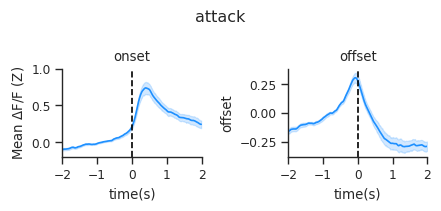

In [16]:
# all mice
fig, axes = plt.subplots(1, 2, figsize=(4.5, 2.1), sharey=False)
fig.suptitle('attack')
sns.lineplot(ax=axes[0],data=attack_timecourse_avged_df, x='t',y='onset', ci=68,color='dodgerblue')
axes[0].set_xlabel('time(s)')
axes[0].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[0].set_title('onset')
axes[0].axvline(x=0,color='k',linestyle='--')
axes[0].set(xlim=(-2, 2))
axes[0].set(ylim=(-0.2, 1))
axes[0].set(xticks=range(-2, 3, 1))#, xticklabels=['a', 'b', 'c', 'd', 'e'])
axes[0].set_facecolor("white")
sns.despine()

sns.lineplot(ax=axes[1],data=attack_timecourse_avged_df, x='t', y='offset', ci=68,color='dodgerblue')
axes[1].set_xlabel('time(s)')
#axes[1].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[1].set_title('offset')
axes[1].axvline(x=0,color='k',linestyle='--')
axes[1] = plt.gca()
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set(xlim=(-2, 2))
axes[1].set(xticks=range(-2, 3, 1))#, xticklabels=['a', 'b', 'c', 'd', 'e'])
axes[1].set_facecolor("white")
#plt.title('offset')

plt.savefig('attackall_ugly.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

In [298]:
np.where(attack_timecourse_avged_overall_df['onset']==max(attack_timecourse_avged_overall_df['onset']))[0][0]

240

close proximity LHb 260 269
196
10 11
onset 1 -1.9783932750210742 0.06256794242945463
10 11
onset 2 -1.3983614034545944 0.17811471445862098
9 11
onset 3 -2.0970531581363616 0.05038033945275909
10 10
onset 4 -2.2409039201495564 0.03788052841821431
8 10
onset 5 -3.3429317807477177 0.0041283576224736595
10 9
onset 6 -1.2053573037095113 0.24457611223599962
8 10
onset 7 0.2770721053091877 0.7852724520783958
8 11
onset 8 -0.9999505497171298 0.33135600675822063
10 10
onset 9 -0.617102979047073 0.5448945302695527
10 10
onset 10 -0.3909035020065533 0.7004567404295424
onset [False False False False  True False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  196
Model:                                 GEE   No. clusters:                       21
Method:                        Generalized   Min. cluster size:                   6
                      Estimatin

<Figure size 1000x1000 with 0 Axes>

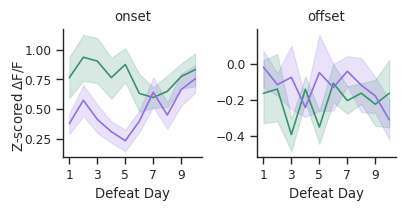

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  196
Model:                                 GEE   No. clusters:                       21
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                 9.3
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Thu, 06 Jun 2024   Scale:                           0.202
Covariance type:                    robust   Time:                         16:46:15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8938      0.118      7.602      0.000       0.663       1.124
si     

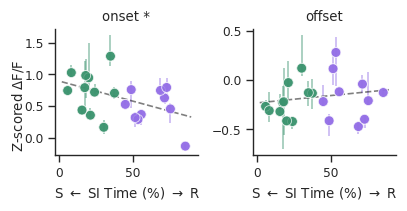

In [142]:
"""
CONSTANTS
"""
#distance = 385
start_time_on = np.where(attack_timecourse_avged_overall_df['onset']==max(attack_timecourse_avged_overall_df['onset']))[0][0]-20#229 #300 for prox 
stop_time_on = np.where(attack_timecourse_avged_overall_df['onset']==max(attack_timecourse_avged_overall_df['onset']))[0][0]+20#269 #400 for prox   
start_time_off = 300 #254 for prox 
stop_time_off = 400 #304 for prox 

"""
PLOTTING
"""
from statsmodels.stats.multitest import multipletests
#def plot_neural(behavior,preattack2nac,postattack2nac,preattack2ts,postattack2ts,
def plot_neural_both(behavior,preattack2lhb,postattack2lhb,
               lims=[-1.5,1.5],save=False):
    sns.set_context("paper")
    sns.set_style("ticks",{
        'legend.frameon':False
    })
    
    
    ggp=np.array([[0.22953434, 0.57685998, 0.42976558, 1.        ],
                  [0.57609486, 0.42953354, 0.90002989, 1.        ],
       [0.133     , 0.133     , 0.133     , 1.        ],
       ])
    
    boxes=[]
          
        
    ms=[]
    ds=[]
    ls=[]
    ts=[]
    r2sc=[]
    rbs=[]
    
    all_ys={}
    summs=[]
#     for PRE,POST,region,color in zip([preattack2nac,preattack2ts],
#                                      [postattack2nac,postattack2ts],
#                                      ['VTA-NAc','SN-TS'],
#                                      ['dodgerblue','orange']):
    for PRE,POST,region,color in zip([preattack2lhb],
                                     [postattack2lhb],
                                     ['LHb'],
                                     ['dodgerblue']):
        pre_extreme=np.abs(np.row_stack([np.row_stack(PRE[k]) for k in PRE if k[0] in r2s[:RFCUTOFF]])[:,start_time_on:stop_time_on].mean(axis=0)).argmax()+240
        #pre_extreme=np.abs(np.row_stack([np.row_stack(PRE[k]) for k in PRE if k[0] in r2s[:RFCUTOFF]])[:,start_time_on:stop_time_on].mean(axis=0)).argmax()+FS*2
        post_extreme=np.abs(np.row_stack([np.row_stack(POST[k]) for k in POST if k[0] in r2s[:RFCUTOFF]])[:,start_time_off:stop_time_off].mean(axis=0)).argmax()+240
        #post_extreme=np.abs(np.row_stack([np.row_stack(POST[k]) for k in POST if k[0] in r2s[:RFCUTOFF]])[:,start_time_off:stop_time_off].mean(axis=0)).argmax()+FS*2
        print(behavior,region,pre_extreme,post_extreme)
        ms=[]
        ds=[]
        ls=[]
        ts=[]
        r2sc=[]
        rbs=[]
        m2weights={}
        j=0
        ys=[[[],[]],[[],[]],[[],[]]]
        noverdays=[]
    
        these_sis=[]

        for j,m in enumerate(r2s):
            i=int(j>RFCUTOFF)

            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            ons1=[]
            offs1=[]
            for d in range(1,11):
                k=(m,d)
                #if k not in postattack2nac:
                if k not in postattack2lhb:
                    continue
                ons1.append(PRE[k])
                offs1.append(POST[k])
                
                ms.append(m)
                ds.append(d)
                ls.append('onset')
                #ts.append(np.row_stack(PRE[k])[:,(pre_extreme-30):(pre_extreme+30)].mean()) #Anna: assuming 30 is FS/4?
                ts.append(np.row_stack(PRE[k])[:,(pre_extreme-25):(pre_extreme+25)].mean())
                r2sc.append(j)
                rbs.append(i)
                ms.append(m)
                ds.append(d)
                ls.append('offset')
                #ts.append(np.row_stack(POST[k])[:,(post_extreme-30):(post_extreme+30)].mean())
                ts.append(np.row_stack(POST[k])[:,(post_extreme-25):(post_extreme+25)].mean())
                r2sc.append(j)
                rbs.append(i)
                
            if len(ons1)==0:
                print(m)
                continue


        df=pd.DataFrame({'m':ms,'d':ds,'c':ls,'t':ts,'r2s':r2sc,'rb':rbs})

        df['si']=[SI_values[i] for i in df.r2s]
        df['sex']='male'

        s=make_behavior_plots(df,offset=0.5,ylabel='Z-scored $\Delta$F/F',
                              order=['onset','offset'],aspect=1.1,height=2.2)
        summs.append(s)
    return(summs,df)

FS=100
for behavior in ['close proximity']:
    #preattack2nac={}
    #postattack2nac={}
    preattack2lhb={}
    postattack2lhb={}
    #preattack2ts={}
    #postattack2ts={}
    preXs={}
    postXs={}
    span=2*FS
    sns.set_style("ticks")

    for m in r2s:
        #if m ==30 or m in BAD_NAC:
        if m ==30 or m in BAD_LHb:
            continue
        ims={('LHb','onset'):[],
             ('LHb','offset'):[]}
            #('VTA-NAc','onset'):[],
             #('SN-TS','onset'):[],
             #('VTA-NAc','offset'):[],
             #('SN-TS','offset'):[]}
        for d in range(1,11):
            k=(m,d)
            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            if k in BAD_SESSIONS:
                continue
            #if k not in rf_scores or 'fpnac_samp' not in alldat[k]:
            #if k not in rf_scores or 'fp_lhb_samp' not in alldat[k]:
            if k not in rf_scores or 'no_filt' not in alldat[k]:
                continue
                
            #attack=(alldat[k]['body_part_tracking']['TopBetweenCentroidDistance']<distance).astype(int)#SHOULD BE #322 120 #Anna: change to 5 as it is in cm
            attack=(rf_scores_new[k]['a']==True).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm
            #attack=(labels[k]==5).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm

            if not np.sum(attack):
                continue
            starts = np.where(attack[1:]-attack[:-1]==1)[0]
            sparse_starts= [a for i,a in enumerate(starts) if np.sum(attack[a-FS*sparse_time:a])==0]

            ends = np.where(attack[:-1]-attack[1:]==1)[0]
            sparse_ends= [a for i,a in enumerate(ends) if np.sum(attack[a+1:a+FS*sparse_time])==0]

            #before=np.array([(np.arange(start-span,start+span)/FS*FP_FS).astype(int) for start in sparse_starts if (start+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])
            #after=np.array([(np.arange(end-span,end+span)/FS*FP_FS).astype(int) for end in sparse_ends if end-span>0 and (end+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])

            #before=np.array([(np.arange(start-span,start+span)).astype(int) for start in sparse_starts if (start+span)<len(alldat[k]['fp_lhb_samp'])])
            before=np.array([(np.arange(start-span,start+span)).astype(int) for start in sparse_starts if (start+span)<len(alldat[k]['no_filt'])])
            #after=np.array([(np.arange(end-span,end+span)).astype(int) for end in sparse_ends if end-span>0 and (end+span)<len(alldat[k]['fp_lhb_samp'])])
            after=np.array([(np.arange(end-span,end+span)).astype(int) for end in sparse_ends if end-span>0 and (end+span)<len(alldat[k]['no_filt'])])
            
            if not len(before) or not len(after):
                continue
            #preattack2nac[k]=[alldat[k]['fpnac_samp'][b]-alldat[k]['fpnac_samp'][b][:span].mean() for b in before]
            #postattack2nac[k]=[alldat[k]['fpnac_samp'][a]-alldat[k]['fpnac_samp'][a][:span].mean() for a in after]
            #preattack2ts[k]=[alldat[k]['fpts_samp'][b]-alldat[k]['fpts_samp'][b][:span].mean() for b in before]
            #postattack2ts[k]=[alldat[k]['fpts_samp'][a]-alldat[k]['fpts_samp'][a][:span].mean() for a in after]
            #preattack2lhb[k]=[alldat[k]['fp_lhb_samp'][b]-alldat[k]['fp_lhb_samp'][b][:span].mean() for b in before]
            preattack2lhb[k]=[alldat[k]['no_filt'][b]-alldat[k]['no_filt'][b][:span].mean() for b in before]
            #postattack2lhb[k]=[alldat[k]['fp_lhb_samp'][a]-alldat[k]['fp_lhb_samp'][a][:span].mean() for a in after]
            postattack2lhb[k]=[alldat[k]['no_filt'][a]-alldat[k]['no_filt'][a][:span].mean() for a in after]

            preX=np.zeros((before.shape[0],before.shape[1]))
            postX=np.zeros((before.shape[0],before.shape[1]))
            
#             ims[('VTA-NAc','onset')].append(preattack2nac[k])
#             ims[('VTA-NAc','offset')].append(postattack2nac[k])
#             ims[('SN-TS','onset')].append(preattack2ts[k])
#             ims[('SN-TS','offset')].append(postattack2ts[k])
            ims[('LHb','onset')].append(preattack2lhb[k])
            ims[('LHb','offset')].append(postattack2lhb[k])
    s,dat=plot_neural_both(behavior,preattack2lhb,postattack2lhb,lims=(-1.5,2),
          save=False)

    prox_summary=s
    
# plt.savefig('attackvsSI.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


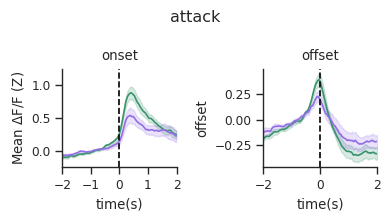

In [87]:
import matplotlib.patches as patches
fig, axes = plt.subplots(1, 2, figsize=(4, 2.2), sharey=False)
fig.suptitle('attack')
sns.lineplot(ax=axes[0],data=attack_timecourse_events_df, x='t', y='onset', hue='rb', ci=68,palette=ggp[[1,2]],legend=False)
axes[0].set_xlabel('time(s)')
axes[0].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[0].set_title('onset')
axes[0].axvline(x=0,color='k',linestyle='--')
axes[0].set(xlim=(-2, 2))
axes[0].set(ylim=(-.25, 1.25))
axes[0].set(xticks=range(-2, 3, 1))#, xticklabels=['a', 'b', 'c', 'd', 'e'])
axes[0].set_facecolor("white")
sns.despine()

sns.lineplot(ax=axes[1],data=attack_timecourse_events_df, x='t', y='offset', hue='rb', ci=68,palette=ggp[[1,2]],legend=False)
axes[1].set_xlabel('time(s)')
#axes[1].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[1].set_title('offset')
axes[1].axvline(x=0,color='k',linestyle='--')
#axes[1] = plt.gca()
axes[1].get_xaxis().set_visible(True)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set(xlim=(-2, 2))
axes[0].set(ylim=(-.25, 1.25))
axes[1].set_facecolor("white")
#plt.title('offset'
plt.savefig('attackvstime6s_ugly.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

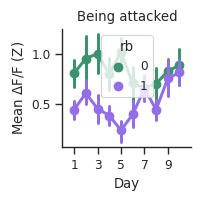

In [295]:
fig, axes = plt.subplots(1, 1, figsize=(2.1, 2.1), sharey=False)
sns.pointplot(data=dat.loc[(dat['c']=='onset')], x="d", y="t", hue="rb",ci=68,palette=pal2,markersize=20,legend=True,)
plt.xlabel('Day')
plt.ylabel('Mean $\Delta$F/F (Z)',va='bottom')
plt.xticks(np.arange(0,10,step=2))
plt.xlim(-1,10)
plt.title('Being attacked')
sns.despine()
plt.savefig('attackvsday6s_ugly.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

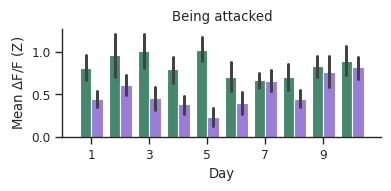

In [296]:
sns.catplot(data=dat.loc[(dat['c']=='onset')], x="d", y="t", hue="rb", kind="bar",ci=68, palette=ggp[[1,2]],legend=False, height=2, aspect=2,
)
plt.xlabel('Day')
plt.ylabel('Mean $\Delta$F/F (Z)',va='bottom')
plt.xticks(np.arange(0,10,step=2))
plt.xlim(-1,10)
plt.title('Being attacked')
sns.despine()
plt.savefig('attackvsday6s_bars.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

In [143]:
attack_alldays = {'m':[],'d':[],'onset':[],'r2s':[],'rb':[],'si':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in preattack2lhb: 
            attack_alldays['m'].append(m)
            attack_alldays['d'].append(d)
            attack_alldays['onset'].append(np.mean(np.mean(np.array(preattack2lhb[k])[:,start_time_on:stop_time_on],1)))
            attack_alldays['r2s'].append(i)
            attack_alldays['rb'].append(i>=RFCUTOFF)
            attack_alldays['si'].append(SI_values[i])
attack_alldays_df=pd.DataFrame(attack_alldays)

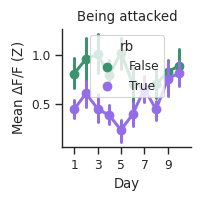

In [258]:
fig, axes = plt.subplots(1, 1, figsize=(2.1, 2.1), sharey=False)
sns.pointplot(data=attack_alldays_df, x="d", y="onset", hue="rb",ci=68,palette=pal2,markersize=20,legend=True,)
plt.xlabel('Day')
plt.ylabel('Mean $\Delta$F/F (Z)',va='bottom')
plt.xticks(np.arange(0,10,step=2))
plt.xlim(-1,10)
plt.title('Being attacked')
sns.despine()
# plt.savefig('tSNE%ivsday0s.pdf' % cluster,transparent=True,dpi=300,
#                     bbox_inches='tight')

In [144]:
attack_day1 = {'m':[],'onset':[],'r2s':[],'rb':[],'si':[]}
for i,m in enumerate(r2s):
    for d in range(1,2):
        k = (m,d)
        if k in preattack2lhb: 
            attack_day1['m'].append(m)
            #attack_days['d'].append(d)
            attack_day1['onset'].append(np.mean(np.mean(np.array(preattack2lhb[k])[:,start_time_on-5:stop_time_on+5],1)))
            attack_day1['r2s'].append(i)
            attack_day1['rb'].append(i>=RFCUTOFF)
            attack_day1['si'].append(SI_values[i])
attack_day1_df=pd.DataFrame(attack_day1)

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


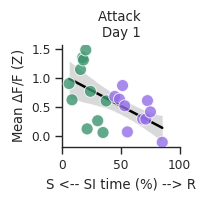

In [341]:
fig, axes = plt.subplots(1, 1, figsize=(2.1, 2.1), sharey=False)
sns.scatterplot(data=attack_day1_df,y='onset',x='si',hue='rb',
                          legend=False,s=75,ci=68, palette=ggp[[1,2]],alpha=0.8,zorder=500,marker='o')
sns.regplot(data=attack_day1_df, x='si', y='onset', scatter=False,color='k')
plt.xlabel('S <-- SI time (%) --> R')
plt.ylabel('Mean $\Delta$F/F (Z)',va='bottom')
plt.xlim(0,100)
plt.title('Attack \nDay 1')
#plt.set_facecolor("white")
sns.despine()

plt.savefig('attackVSday1_ugly.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

In [342]:
r, p = scipy.stats.pearsonr(attack_day1_df['si'], attack_day1_df['onset'])
print(p)
print(r)

0.006033647722870994
-0.5782693936022614


In [148]:
import scipy.stats as stats
s = attack_day1_df.loc[(attack_day1_df['rb']==False),'onset'].mean()
r = attack_day1_df.loc[(attack_day1_df['rb']==True),'onset'].mean()
stats.ttest_ind(attack_day1_df.loc[(attack_day1_df['rb']==False),'onset'], attack_day1_df.loc[(attack_day1_df['rb']==True),'onset'])

Ttest_indResult(statistic=1.9576228733894185, pvalue=0.06512644527911955)

In [146]:
## Calculate number of attacks in R vs S (on day 1)
peak = np.where(attack_timecourse_avged_overall_df['onset']==max(attack_timecourse_avged_overall_df['onset']))[0][0]
start_p = peak-20
stop_p = peak+20

day1 = {'m':[],'onset':[],'visit':[],'r2s':[],'rb':[],'si':[]}

d = 1
for i,m in enumerate(r2s):
    k = (m,d)
    if 'no_filt' in alldat[k]:
        if k not in BAD_SESSIONS:
            visit_avgs = []
            for v in range(0,np.shape(preattack2lhb[k])[0]):
                visit_avgs.append(np.mean(np.array(preattack2lhb[k])[v,start_p:stop_p]))
            
                # place into dataframe  
                day1['m'].append(m)
                day1['onset'].append(visit_avgs[v])
                day1['visit'].append(v)
                day1['r2s'].append(i)
                day1['rb'].append(i>=RFCUTOFF)
                day1['si'].append(SI_values[i])
day1_df=pd.DataFrame(day1)

day1_avg = {'m':[],'onset':[],'visits_max':[],'r2s':[],'rb':[],'si':[]}
d = 1
for i,m in enumerate(r2s):
    k = (m,d)
    if 'no_filt' in alldat[k]:
        if k not in BAD_SESSIONS:
            visit_avgs = []
            for v in range(0,np.shape(preattack2lhb[k])[0]):
                visit_avgs.append(np.mean(np.array(preattack2lhb[k])[v,start_p:stop_p]))
            
            # place into dataframe  
            day1_avg['m'].append(m)
            day1_avg['onset'].append(np.mean(visit_avgs))
            day1_avg['visits_max'].append(len(visit_avgs))
            day1_avg['r2s'].append(i)
            day1_avg['rb'].append(i>=RFCUTOFF)
            day1_avg['si'].append(SI_values[i])
day1_avg_df=pd.DataFrame(day1_avg)

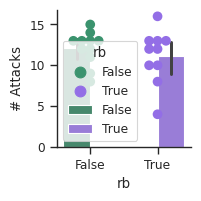

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(2.1, 2.1))
# sns.catplot(data=day1_avg_df, x="rb", y="onset",hue='rb',
#                           palette=ggp[[1,2]],legend=False)
sns.swarmplot(data=day1_avg_df,x='rb',y='visits_max',hue='rb',
                          palette=ggp[[1,2]],size=7)
sns.barplot(data=day1_avg_df,x='rb',y='visits_max',hue='rb',
                          palette=ggp[[1,2]])
plt.ylabel('# Attacks',va='bottom')
sns.despine()
# plt.show()

plt.savefig('attacksnumber_barplot.pdf',transparent=True,dpi=300,
                     bbox_inches='tight')

In [147]:
import scipy.stats as stats
stats.ttest_ind(day1_avg_df.loc[(day1_avg_df['rb']==False),'visits_max'], day1_avg_df.loc[(day1_avg_df['rb']==True),'visits_max'])

Ttest_indResult(statistic=0.8301284000017903, pvalue=0.41677527967556804)

In [149]:
r_v = {'p_val':[],'r_val':[],'visit':[]}   

for v in range(0,12):
#v = 0
    r, p = scipy.stats.pearsonr(day1_df.loc[(day1_df['visit']==v),'onset'], day1_df.loc[(day1_df['visit']==v),'si'])
    r_v['p_val'].append(p)
    r_v['r_val'].append(r)
    r_v['visit'].append(v)
r_v_df=pd.DataFrame(r_v)
# print(p)
# print(r)

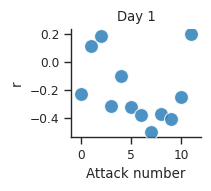

In [152]:
fig, axes = plt.subplots(1, 1, figsize=(2.2, 2), sharey=False)
v =11
sns.scatterplot(data=r_v_df,y='r_val',x='visit',
                          legend=False,s=100,ci=68, alpha=0.8,zorder=500,marker='o')
#sns.regplot(data=r_v_df, x='visit', y='r_val', scatter=False,color='k')
plt.xlabel('Attack number')
plt.ylabel('r')
plt.xlim(-1,12)
plt.title('Day 1')
#plt.set_facecolor("white")
sns.despine()

plt.savefig('attacksnumber_vsR_day1.pdf',transparent=True,dpi=300,
                     bbox_inches='tight')

In [ ]:
r, p = scipy.stats.pearsonr(r_v_df['r_val'],r_v_df['visit'] )
print(p)
print(r)

In [321]:
sparse_time = 6
FS=100
for behavior in ['close proximity']:
    #preattack2nac={}
    #postattack2nac={}
    preattack2lhb={}
    postattack2lhb={}
    #preattack2ts={}
    #postattack2ts={}
    preXs={}
    postXs={}
    span=2*FS
    sns.set_style("ticks")

    for m in r2s:
        #if m ==30 or m in BAD_NAC:
        if m ==30 or m in BAD_LHb:
            continue
        ims={('LHb','onset'):[],
             ('LHb','offset'):[]}
            #('VTA-NAc','onset'):[],
             #('SN-TS','onset'):[],
             #('VTA-NAc','offset'):[],
             #('SN-TS','offset'):[]}
        for d in range(1,11):
            k=(m,d)
            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            if k in BAD_SESSIONS:
                continue
            #if k not in rf_scores or 'fpnac_samp' not in alldat[k]:
            if k not in rf_scores_new or 'no_filt' not in alldat[k]:
                continue
                
            #attack=(alldat[k]['body_part_tracking']['TopBetweenCentroidDistance']<120).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm
            attack=(rf_scores_new[k]['x']==True).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm

            if not np.sum(attack):
                continue
            starts = np.where(attack[1:]-attack[:-1]==1)[0]
            sparse_starts= [a for i,a in enumerate(starts) if np.sum(attack[a-FS*sparse_time:a])==0]

            ends = np.where(attack[:-1]-attack[1:]==1)[0]
            sparse_ends= [a for i,a in enumerate(ends) if np.sum(attack[a+1:a+FS*sparse_time])==0]

            #before=np.array([(np.arange(start-span,start+span)/FS*FP_FS).astype(int) for start in sparse_starts if (start+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])
            #after=np.array([(np.arange(end-span,end+span)/FS*FP_FS).astype(int) for end in sparse_ends if end-span>0 and (end+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])

            before=np.array([(np.arange(start-span,start+span)).astype(int) for start in sparse_starts if (start+span)<len(alldat[k]['no_filt'])])
            after=np.array([(np.arange(end-span,end+span)).astype(int) for end in sparse_ends if end-span>0 and (end+span)<len(alldat[k]['no_filt'])])
            
            if not len(before) or not len(after):
                continue
            #preattack2nac[k]=[alldat[k]['fpnac_samp'][b]-alldat[k]['fpnac_samp'][b][:span].mean() for b in before]
            #postattack2nac[k]=[alldat[k]['fpnac_samp'][a]-alldat[k]['fpnac_samp'][a][:span].mean() for a in after]
            #preattack2ts[k]=[alldat[k]['fpts_samp'][b]-alldat[k]['fpts_samp'][b][:span].mean() for b in before]
            #postattack2ts[k]=[alldat[k]['fpts_samp'][a]-alldat[k]['fpts_samp'][a][:span].mean() for a in after]
            preattack2lhb[k]=[alldat[k]['no_filt'][b]-alldat[k]['no_filt'][b][:span].mean() for b in before]
            #preattack2lhb[k]=[alldat[k]['fp_lhb_samp'][b] for b in before]
            postattack2lhb[k]=[alldat[k]['no_filt'][a]-alldat[k]['no_filt'][a][:span].mean() for a in after]
            #postattack2lhb[k]=[alldat[k]['fp_lhb_samp'][a] for a in after]

            preX=np.zeros((before.shape[0],before.shape[1]))
            postX=np.zeros((before.shape[0],before.shape[1]))
            
#             ims[('VTA-NAc','onset')].append(preattack2nac[k])
#             ims[('VTA-NAc','offset')].append(postattack2nac[k])
#             ims[('SN-TS','onset')].append(preattack2ts[k])
#             ims[('SN-TS','offset')].append(postattack2ts[k])
            ims[('LHb','onset')].append(preattack2lhb[k])
            ims[('LHb','offset')].append(postattack2lhb[k])
            
## Place into a dataframe
time = np.arange(-2,2,1/100)

escape_timecourse_onset = {'m':[],'d':[],'t':[],'onset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in preattack2lhb: 
            for trial in range(0,len(preattack2lhb[k])):
                for frame in range(0,len(preattack2lhb[k][0])):
                    escape_timecourse_onset['m'].append(m)
                    escape_timecourse_onset['d'].append(d)
                    escape_timecourse_onset['t'].append(time[frame])
                    escape_timecourse_onset['onset'].append(preattack2lhb[k][trial][frame])
                    escape_timecourse_onset['r2s'].append(i)
                    escape_timecourse_onset['rb'].append(i>=RFCUTOFF)
escape_timecourse_onset_df=pd.DataFrame(escape_timecourse_onset)

escape_timecourse_offset = {'m':[],'d':[],'t':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in postattack2lhb: 
            for trial in range(0,len(postattack2lhb[k])):
                for frame in range(0,len(postattack2lhb[k][0])):
                    escape_timecourse_offset['m'].append(m)
                    escape_timecourse_offset['d'].append(d)
                    escape_timecourse_offset['t'].append(time[frame])
                    escape_timecourse_offset['offset'].append(postattack2lhb[k][trial][frame])
                    escape_timecourse_offset['r2s'].append(i)
                    escape_timecourse_offset['rb'].append(i>=RFCUTOFF)
escape_timecourse_offset_df=pd.DataFrame(escape_timecourse_offset)

## Average across all events and days at once (per mouse)
escape_timecourse_events = {'m':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        mouse_alldays_onset = []
        mouse_alldays_offset = []
        for d in range(1,11):
            k = (m,d)
            #if k not in BAD_SESSIONS:
            if k in preattack2lhb:
                mouse_alldays_onset.append(np.array(preattack2lhb[k][:]))
                mouse_alldays_offset.append(np.array(postattack2lhb[k][:]))
        mouse_alldays_onset_concat =  mouse_alldays_onset[0]
        mouse_alldays_offset_concat =  mouse_alldays_offset[0]
        for session in range(1,len(mouse_alldays_onset)-1):
            mouse_alldays_onset_concat =np.concatenate((mouse_alldays_onset_concat,mouse_alldays_onset[session]))
            mouse_alldays_offset_concat =np.concatenate((mouse_alldays_offset_concat,mouse_alldays_offset[session]))                
        mouse_alldays_onset_avg = np.mean(mouse_alldays_onset_concat,0) #average across all sessions and all days at once
        mouse_alldays_offset_avg = np.mean(mouse_alldays_offset_concat,0) #average across all sessions and all days at once

        # place into dataframe        
        for frame in range(0,len(time)):
            escape_timecourse_events['m'].append(m)
            escape_timecourse_events['t'].append(time[frame])
            escape_timecourse_events['onset'].append(mouse_alldays_onset_avg[frame])
            escape_timecourse_events['offset'].append(mouse_alldays_offset_avg[frame])
            escape_timecourse_events['r2s'].append(i)
            escape_timecourse_events['rb'].append(i>=RFCUTOFF)
escape_timecourse_events_df=pd.DataFrame(escape_timecourse_events)

## Average across day (per mouse)
escape_timecourse_day_avged = {'m':[],'d':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        for d in range(1,11):
            mouse_dayavg_onset = []
            mouse_dayavg_offset = []
            k = (m,d)
            #if k not in BAD_SESSIONS:
            if k in preattack2lhb:
                mouse_dayavg_onset.append(np.mean(preattack2lhb[k],0))
                mouse_dayavg_offset.append(np.mean(postattack2lhb[k],0))
                for frame in range(0,len(time)):
                    escape_timecourse_day_avged['m'].append(m)
                    escape_timecourse_day_avged['d'].append(d)
                    escape_timecourse_day_avged['t'].append(time[frame])
                    escape_timecourse_day_avged['onset'].append(mouse_dayavg_onset[0][frame])
                    escape_timecourse_day_avged['offset'].append(mouse_dayavg_offset[0][frame])
                    escape_timecourse_day_avged['r2s'].append(i)
                    escape_timecourse_day_avged['rb'].append(i>=RFCUTOFF)
escape_timecourse_day_avged_df=pd.DataFrame(escape_timecourse_day_avged)

## Average across day avgs to get one avg per mouse
escape_timecourse_avged = {'m':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        mouse_dayavg_onset = []
        mouse_dayavg_offset = []
        for d in range(1,11):
            k = (m,d)
            #if k not in BAD_SESSIONS:
            if k in preattack2lhb:
                mouse_dayavg_onset.append(np.mean(preattack2lhb[k],0))
                mouse_dayavg_offset.append(np.mean(postattack2lhb[k],0))
        mouse_dayavg_onset_avg = np.mean(mouse_dayavg_onset,0)
        mouse_dayavg_offset_avg = np.mean(mouse_dayavg_offset,0)
# place into dataframe            
        for frame in range(0,len(time)):
            escape_timecourse_avged['m'].append(m)
            escape_timecourse_avged['t'].append(time[frame])
            escape_timecourse_avged['onset'].append(mouse_dayavg_onset_avg[frame])
            escape_timecourse_avged['offset'].append(mouse_dayavg_offset_avg[frame])
            escape_timecourse_avged['r2s'].append(i)
            escape_timecourse_avged['rb'].append(i>=RFCUTOFF)
escape_timecourse_avged_df=pd.DataFrame(escape_timecourse_avged)

## Average across all mice to get peaks
escape_timecourse_avged_overall = {'t':[],'onset':[],'offset':[]}
for frame in range(0,len(time)):
    escape_timecourse_avged_overall['t'].append(time[frame])
    escape_timecourse_avged_overall['onset'].append(escape_timecourse_day_avged_df.loc[escape_timecourse_day_avged['t']==time[frame], 'onset'].mean())
    escape_timecourse_avged_overall['offset'].append(escape_timecourse_day_avged_df.loc[escape_timecourse_day_avged['t']==time[frame], 'offset'].mean())
escape_timecourse_avged_overall_df=pd.DataFrame(escape_timecourse_avged_overall)

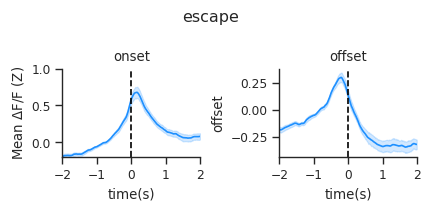

In [96]:
# all mice
fig, axes = plt.subplots(1, 2, figsize=(4.5, 2.1), sharey=False)
fig.suptitle('escape')
sns.lineplot(ax=axes[0],data=escape_timecourse_avged_df, x='t',y='onset', ci=68,color='dodgerblue')
axes[0].set_xlabel('time(s)')
axes[0].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[0].set_title('onset')
axes[0].axvline(x=0,color='k',linestyle='--')
axes[0].set(xlim=(-2, 2))
axes[0].set(ylim=(-0.2, 1))
axes[0].set(xticks=range(-2, 3, 1))#, xticklabels=['a', 'b', 'c', 'd', 'e'])
axes[0].set_facecolor("white")
sns.despine()

sns.lineplot(ax=axes[1],data=escape_timecourse_avged_df, x='t', y='offset', ci=68,color='dodgerblue')
axes[1].set_xlabel('time(s)')
#axes[1].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[1].set_title('offset')
axes[1].axvline(x=0,color='k',linestyle='--')
axes[1] = plt.gca()
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set(xlim=(-2, 2))
axes[1].set(xticks=range(-2, 3, 1))#, xticklabels=['a', 'b', 'c', 'd', 'e'])
axes[1].set_facecolor("white")
#plt.title('offset')

# plt.savefig('attackall.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

close proximity LHb 261 241
196
10 11
onset 1 -0.31561897660376914 0.755732292565602
10 11
onset 2 -2.334118215288657 0.03072167128855679
9 11
onset 3 -0.5883984843598391 0.5635758324904254
10 10
onset 4 -1.6371928866389043 0.1189533831079603
8 10
onset 5 -1.444170924224257 0.16798781919618866
10 9
onset 6 -0.47567169795197145 0.6403632781432517
8 10
onset 7 0.8391071137623753 0.4137710219934284
8 11
onset 8 -0.7963223730775686 0.43682462949934797
10 10
onset 9 0.05008490313931861 0.9606063241712104
10 10
onset 10 0.36590183675121896 0.7187032499670576
onset [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  196
Model:                                 GEE   No. clusters:                       21
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equa

<Figure size 1000x1000 with 0 Axes>

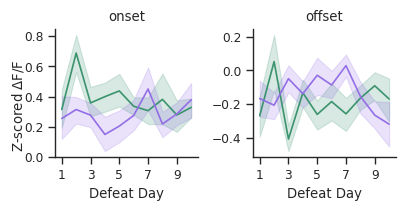

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  196
Model:                                 GEE   No. clusters:                       21
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                 9.3
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Sat, 27 Apr 2024   Scale:                           0.120
Covariance type:                    robust   Time:                         14:05:01
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4671      0.079      5.876      0.000       0.311       0.623
si     

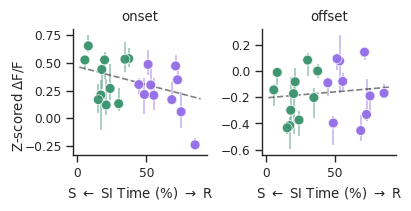

In [322]:
"""
CONSTANTS
"""
#distance = 385
start_time_on = np.where(escape_timecourse_avged_overall_df['onset']==max(escape_timecourse_avged_overall_df['onset']))[0][0]-20#229 #300 for prox 
stop_time_on = np.where(escape_timecourse_avged_overall_df['onset']==max(escape_timecourse_avged_overall_df['onset']))[0][0]+20#269 #400 for prox   
start_time_off = 300 #254 for prox 
stop_time_off = 400 #304 for prox 

"""
PLOTTING
"""
from statsmodels.stats.multitest import multipletests
#def plot_neural(behavior,preattack2nac,postattack2nac,preattack2ts,postattack2ts,
def plot_neural_both(behavior,preattack2lhb,postattack2lhb,
               lims=[-1.5,1.5],save=False):
    sns.set_context("paper")
    sns.set_style("ticks",{
        'legend.frameon':False
    })
    
    
    ggp=np.array([[0.22953434, 0.57685998, 0.42976558, 1.        ],
                  [0.57609486, 0.42953354, 0.90002989, 1.        ],
       [0.133     , 0.133     , 0.133     , 1.        ],
       ])
    
    boxes=[]
          
        
    ms=[]
    ds=[]
    ls=[]
    ts=[]
    r2sc=[]
    rbs=[]
    
    all_ys={}
    summs=[]
#     for PRE,POST,region,color in zip([preattack2nac,preattack2ts],
#                                      [postattack2nac,postattack2ts],
#                                      ['VTA-NAc','SN-TS'],
#                                      ['dodgerblue','orange']):
    for PRE,POST,region,color in zip([preattack2lhb],
                                     [postattack2lhb],
                                     ['LHb'],
                                     ['dodgerblue']):
        pre_extreme=np.abs(np.row_stack([np.row_stack(PRE[k]) for k in PRE if k[0] in r2s[:RFCUTOFF]])[:,start_time_on:stop_time_on].mean(axis=0)).argmax()+240
        #pre_extreme=np.abs(np.row_stack([np.row_stack(PRE[k]) for k in PRE if k[0] in r2s[:RFCUTOFF]])[:,start_time_on:stop_time_on].mean(axis=0)).argmax()+FS*2
        post_extreme=np.abs(np.row_stack([np.row_stack(POST[k]) for k in POST if k[0] in r2s[:RFCUTOFF]])[:,start_time_off:stop_time_off].mean(axis=0)).argmax()+240
        #post_extreme=np.abs(np.row_stack([np.row_stack(POST[k]) for k in POST if k[0] in r2s[:RFCUTOFF]])[:,start_time_off:stop_time_off].mean(axis=0)).argmax()+FS*2
        print(behavior,region,pre_extreme,post_extreme)
        ms=[]
        ds=[]
        ls=[]
        ts=[]
        r2sc=[]
        rbs=[]
        m2weights={}
        j=0
        ys=[[[],[]],[[],[]],[[],[]]]
        noverdays=[]
    
        these_sis=[]

        for j,m in enumerate(r2s):
            i=int(j>RFCUTOFF)

            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            ons1=[]
            offs1=[]
            for d in range(1,11):
                k=(m,d)
                #if k not in postattack2nac:
                if k not in postattack2lhb:
                    continue
                ons1.append(PRE[k])
                offs1.append(POST[k])
                
                ms.append(m)
                ds.append(d)
                ls.append('onset')
                #ts.append(np.row_stack(PRE[k])[:,(pre_extreme-30):(pre_extreme+30)].mean()) #Anna: assuming 30 is FS/4?
                ts.append(np.row_stack(PRE[k])[:,(pre_extreme-25):(pre_extreme+25)].mean())
                r2sc.append(j)
                rbs.append(i)
                ms.append(m)
                ds.append(d)
                ls.append('offset')
                #ts.append(np.row_stack(POST[k])[:,(post_extreme-30):(post_extreme+30)].mean())
                ts.append(np.row_stack(POST[k])[:,(post_extreme-25):(post_extreme+25)].mean())
                r2sc.append(j)
                rbs.append(i)
                
            if len(ons1)==0:
                print(m)
                continue


        df=pd.DataFrame({'m':ms,'d':ds,'c':ls,'t':ts,'r2s':r2sc,'rb':rbs})

        df['si']=[SI_values[i] for i in df.r2s]
        df['sex']='male'

        s=make_behavior_plots(df,offset=0.5,ylabel='Z-scored $\Delta$F/F',
                              order=['onset','offset'],aspect=1.1,height=2.2)
        summs.append(s)
    return(summs,df)

FS=100
for behavior in ['close proximity']:
    #preattack2nac={}
    #postattack2nac={}
    preattack2lhb={}
    postattack2lhb={}
    #preattack2ts={}
    #postattack2ts={}
    preXs={}
    postXs={}
    span=2*FS
    sns.set_style("ticks")

    for m in r2s:
        #if m ==30 or m in BAD_NAC:
        if m ==30 or m in BAD_LHb:
            continue
        ims={('LHb','onset'):[],
             ('LHb','offset'):[]}
            #('VTA-NAc','onset'):[],
             #('SN-TS','onset'):[],
             #('VTA-NAc','offset'):[],
             #('SN-TS','offset'):[]}
        for d in range(1,11):
            k=(m,d)
            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            if k in BAD_SESSIONS:
                continue
            #if k not in rf_scores or 'fpnac_samp' not in alldat[k]:
            #if k not in rf_scores or 'fp_lhb_samp' not in alldat[k]:
            if k not in rf_scores or 'no_filt' not in alldat[k]:
                continue
                
            #attack=(alldat[k]['body_part_tracking']['TopBetweenCentroidDistance']<distance).astype(int)#SHOULD BE #322 120 #Anna: change to 5 as it is in cm
            attack=(rf_scores_new[k]['x']==True).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm
            #attack=(labels[k]==5).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm

            if not np.sum(attack):
                continue
            starts = np.where(attack[1:]-attack[:-1]==1)[0]
            sparse_starts= [a for i,a in enumerate(starts) if np.sum(attack[a-FS*sparse_time:a])==0]

            ends = np.where(attack[:-1]-attack[1:]==1)[0]
            sparse_ends= [a for i,a in enumerate(ends) if np.sum(attack[a+1:a+FS*sparse_time])==0]

            #before=np.array([(np.arange(start-span,start+span)/FS*FP_FS).astype(int) for start in sparse_starts if (start+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])
            #after=np.array([(np.arange(end-span,end+span)/FS*FP_FS).astype(int) for end in sparse_ends if end-span>0 and (end+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])

            #before=np.array([(np.arange(start-span,start+span)).astype(int) for start in sparse_starts if (start+span)<len(alldat[k]['fp_lhb_samp'])])
            before=np.array([(np.arange(start-span,start+span)).astype(int) for start in sparse_starts if (start+span)<len(alldat[k]['no_filt'])])
            #after=np.array([(np.arange(end-span,end+span)).astype(int) for end in sparse_ends if end-span>0 and (end+span)<len(alldat[k]['fp_lhb_samp'])])
            after=np.array([(np.arange(end-span,end+span)).astype(int) for end in sparse_ends if end-span>0 and (end+span)<len(alldat[k]['no_filt'])])
            
            if not len(before) or not len(after):
                continue
            #preattack2nac[k]=[alldat[k]['fpnac_samp'][b]-alldat[k]['fpnac_samp'][b][:span].mean() for b in before]
            #postattack2nac[k]=[alldat[k]['fpnac_samp'][a]-alldat[k]['fpnac_samp'][a][:span].mean() for a in after]
            #preattack2ts[k]=[alldat[k]['fpts_samp'][b]-alldat[k]['fpts_samp'][b][:span].mean() for b in before]
            #postattack2ts[k]=[alldat[k]['fpts_samp'][a]-alldat[k]['fpts_samp'][a][:span].mean() for a in after]
            #preattack2lhb[k]=[alldat[k]['fp_lhb_samp'][b]-alldat[k]['fp_lhb_samp'][b][:span].mean() for b in before]
            preattack2lhb[k]=[alldat[k]['no_filt'][b]-alldat[k]['no_filt'][b][:span].mean() for b in before]
            #postattack2lhb[k]=[alldat[k]['fp_lhb_samp'][a]-alldat[k]['fp_lhb_samp'][a][:span].mean() for a in after]
            postattack2lhb[k]=[alldat[k]['no_filt'][a]-alldat[k]['no_filt'][a][:span].mean() for a in after]

            preX=np.zeros((before.shape[0],before.shape[1]))
            postX=np.zeros((before.shape[0],before.shape[1]))
            
#             ims[('VTA-NAc','onset')].append(preattack2nac[k])
#             ims[('VTA-NAc','offset')].append(postattack2nac[k])
#             ims[('SN-TS','onset')].append(preattack2ts[k])
#             ims[('SN-TS','offset')].append(postattack2ts[k])
            ims[('LHb','onset')].append(preattack2lhb[k])
            ims[('LHb','offset')].append(postattack2lhb[k])
    s,dat=plot_neural_both(behavior,preattack2lhb,postattack2lhb,lims=(-1.5,2),
          save=False)

    prox_summary=s
    
# plt.savefig('attackvsSI.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

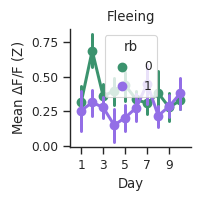

In [307]:
fig, axes = plt.subplots(1, 1, figsize=(2.1, 2.1), sharey=False)
sns.pointplot(data=dat.loc[(dat['c']=='onset')], x="d", y="t", hue="rb",ci=68,palette=pal2,markersize=20,legend=True,)
plt.xlabel('Day')
plt.ylabel('Mean $\Delta$F/F (Z)',va='bottom')
plt.xticks(np.arange(0,10,step=2))
plt.xlim(-1,10)
plt.title('Fleeing')
sns.despine()
plt.savefig('escapevsday6s_ugly.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


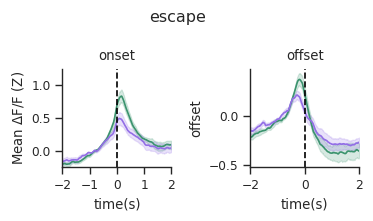

In [98]:
import matplotlib.patches as patches
fig, axes = plt.subplots(1, 2, figsize=(4, 2.2), sharey=False)
fig.suptitle('escape')
sns.lineplot(ax=axes[0],data=escape_timecourse_events_df, x='t', y='onset', hue='rb', ci=68,palette=ggp[[1,2]],legend=False)
axes[0].set_xlabel('time(s)')
axes[0].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[0].set_title('onset')
axes[0].axvline(x=0,color='k',linestyle='--')
axes[0].set(xlim=(-2, 2))
axes[0].set(ylim=(-.25, 1.25))
axes[0].set(xticks=range(-2, 3, 1))#, xticklabels=['a', 'b', 'c', 'd', 'e'])
axes[0].set_facecolor("white")
sns.despine()

sns.lineplot(ax=axes[1],data=escape_timecourse_events_df, x='t', y='offset', hue='rb', ci=68,palette=ggp[[1,2]],legend=False)
axes[1].set_xlabel('time(s)')
#axes[1].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[1].set_title('offset')
axes[1].axvline(x=0,color='k',linestyle='--')
#axes[1] = plt.gca()
axes[1].get_xaxis().set_visible(True)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set(xlim=(-2, 2))
axes[0].set(ylim=(-.25, 1.25))
axes[1].set_facecolor("white")
#plt.title('offset'
# plt.savefig('attackvstime6s.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

In [323]:
escape_day1 = {'m':[],'onset':[],'r2s':[],'rb':[],'si':[]}
for i,m in enumerate(r2s):
    for d in range(1,2):
        k = (m,d)
        if k in preattack2lhb: 
            escape_day1['m'].append(m)
            #escape_days['d'].append(d)
            escape_day1['onset'].append(np.mean(np.mean(np.array(preattack2lhb[k])[:,start_time_on-5:stop_time_on+5],1)))
            escape_day1['r2s'].append(i)
            escape_day1['rb'].append(i>=RFCUTOFF)
            escape_day1['si'].append(SI_values[i])
escape_day1_df=pd.DataFrame(escape_day1)

In [261]:
escape_alldays = {'m':[],'d':[],'onset':[],'r2s':[],'rb':[],'si':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in preattack2lhb: 
            escape_alldays['m'].append(m)
            escape_alldays['d'].append(d)
            escape_alldays['onset'].append(np.mean(np.mean(np.array(preattack2lhb[k])[:,start_time_on:stop_time_on],1)))
            escape_alldays['r2s'].append(i)
            escape_alldays['rb'].append(i>=RFCUTOFF)
            escape_alldays['si'].append(SI_values[i])
escape_alldays_df=pd.DataFrame(escape_alldays)

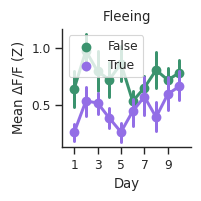

In [262]:
fig, axes = plt.subplots(1, 1, figsize=(2.1, 2.1), sharey=False)
sns.pointplot(data=escape_alldays, x="d", y="onset", hue="rb",ci=68,palette=pal2,markersize=20,legend=True,)
plt.xlabel('Day')
plt.ylabel('Mean $\Delta$F/F (Z)',va='bottom')
plt.xticks(np.arange(0,10,step=2))
plt.xlim(-1,10)
plt.title('Fleeing')
sns.despine()
# plt.savefig('escapevsday6s_ugly.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


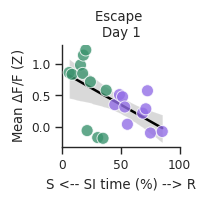

In [339]:
fig, axes = plt.subplots(1, 1, figsize=(2.1, 2.1), sharey=False)
sns.scatterplot(data=escape_day1_df,y='onset',x='si',hue='rb',
                          legend=False,s=75,ci=68, palette=ggp[[1,2]],alpha=0.8,zorder=500,marker='o')
sns.regplot(data=escape_day1_df, x='si', y='onset', scatter=False,color='k')
plt.xlabel('S <-- SI time (%) --> R')
plt.ylabel('Mean $\Delta$F/F (Z)',va='bottom')
plt.xlim(0,100)
plt.title('Escape \nDay 1')
#plt.set_facecolor("white")
sns.despine()

plt.savefig('escapeVSday1_ugly.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

In [340]:
r, p = scipy.stats.pearsonr(escape_day1_df['si'], escape_day1_df['onset'])
print(p)
print(r)

0.005781116061399903
-0.5806517772780413


In [326]:
sparse_time = 6
FS=100
for behavior in ['close proximity']:
    #preattack2nac={}
    #postattack2nac={}
    preattack2lhb={}
    postattack2lhb={}
    #preattack2ts={}
    #postattack2ts={}
    preXs={}
    postXs={}
    span=2*FS
    sns.set_style("ticks")

    for m in r2s:
        #if m ==30 or m in BAD_NAC:
        if m ==30 or m in BAD_LHb:
            continue
        ims={('LHb','onset'):[],
             ('LHb','offset'):[]}
            #('VTA-NAc','onset'):[],
             #('SN-TS','onset'):[],
             #('VTA-NAc','offset'):[],
             #('SN-TS','offset'):[]}
        for d in range(1,11):
            k=(m,d)
            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            if k in BAD_SESSIONS:
                continue
            #if k not in rf_scores or 'fpnac_samp' not in alldat[k]:
            if k not in rf_scores_new or 'no_filt' not in alldat[k]:
                continue
                
            #attack=(alldat[k]['body_part_tracking']['TopBetweenCentroidDistance']<120).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm
            attack=(rf_scores_new[k]['f']==True).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm

            if not np.sum(attack):
                continue
            starts = np.where(attack[1:]-attack[:-1]==1)[0]
            sparse_starts= [a for i,a in enumerate(starts) if np.sum(attack[a-FS*sparse_time:a])==0]

            ends = np.where(attack[:-1]-attack[1:]==1)[0]
            sparse_ends= [a for i,a in enumerate(ends) if np.sum(attack[a+1:a+FS*sparse_time])==0]

            #before=np.array([(np.arange(start-span,start+span)/FS*FP_FS).astype(int) for start in sparse_starts if (start+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])
            #after=np.array([(np.arange(end-span,end+span)/FS*FP_FS).astype(int) for end in sparse_ends if end-span>0 and (end+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])

            before=np.array([(np.arange(start-span,start+span)).astype(int) for start in sparse_starts if (start+span)<len(alldat[k]['no_filt'])])
            after=np.array([(np.arange(end-span,end+span)).astype(int) for end in sparse_ends if end-span>0 and (end+span)<len(alldat[k]['no_filt'])])
            
            if not len(before) or not len(after):
                continue
            #preattack2nac[k]=[alldat[k]['fpnac_samp'][b]-alldat[k]['fpnac_samp'][b][:span].mean() for b in before]
            #postattack2nac[k]=[alldat[k]['fpnac_samp'][a]-alldat[k]['fpnac_samp'][a][:span].mean() for a in after]
            #preattack2ts[k]=[alldat[k]['fpts_samp'][b]-alldat[k]['fpts_samp'][b][:span].mean() for b in before]
            #postattack2ts[k]=[alldat[k]['fpts_samp'][a]-alldat[k]['fpts_samp'][a][:span].mean() for a in after]
            preattack2lhb[k]=[alldat[k]['no_filt'][b]-alldat[k]['no_filt'][b][:span].mean() for b in before]
            #preattack2lhb[k]=[alldat[k]['fp_lhb_samp'][b] for b in before]
            postattack2lhb[k]=[alldat[k]['no_filt'][a]-alldat[k]['no_filt'][a][:span].mean() for a in after]
            #postattack2lhb[k]=[alldat[k]['fp_lhb_samp'][a] for a in after]

            preX=np.zeros((before.shape[0],before.shape[1]))
            postX=np.zeros((before.shape[0],before.shape[1]))
            
#             ims[('VTA-NAc','onset')].append(preattack2nac[k])
#             ims[('VTA-NAc','offset')].append(postattack2nac[k])
#             ims[('SN-TS','onset')].append(preattack2ts[k])
#             ims[('SN-TS','offset')].append(postattack2ts[k])
            ims[('LHb','onset')].append(preattack2lhb[k])
            ims[('LHb','offset')].append(postattack2lhb[k])
            
## Place into a dataframe
time = np.arange(-2,2,1/100)

fightback_timecourse_onset = {'m':[],'d':[],'t':[],'onset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in preattack2lhb: 
            for trial in range(0,len(preattack2lhb[k])):
                for frame in range(0,len(preattack2lhb[k][0])):
                    fightback_timecourse_onset['m'].append(m)
                    fightback_timecourse_onset['d'].append(d)
                    fightback_timecourse_onset['t'].append(time[frame])
                    fightback_timecourse_onset['onset'].append(preattack2lhb[k][trial][frame])
                    fightback_timecourse_onset['r2s'].append(i)
                    fightback_timecourse_onset['rb'].append(i>=RFCUTOFF)
fightback_timecourse_onset_df=pd.DataFrame(fightback_timecourse_onset)

fightback_timecourse_offset = {'m':[],'d':[],'t':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in postattack2lhb: 
            for trial in range(0,len(postattack2lhb[k])):
                for frame in range(0,len(postattack2lhb[k][0])):
                    fightback_timecourse_offset['m'].append(m)
                    fightback_timecourse_offset['d'].append(d)
                    fightback_timecourse_offset['t'].append(time[frame])
                    fightback_timecourse_offset['offset'].append(postattack2lhb[k][trial][frame])
                    fightback_timecourse_offset['r2s'].append(i)
                    fightback_timecourse_offset['rb'].append(i>=RFCUTOFF)
fightback_timecourse_offset_df=pd.DataFrame(fightback_timecourse_offset)

## Average across all events and days at once (per mouse)
fightback_timecourse_events = {'m':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        mouse_alldays_onset = []
        mouse_alldays_offset = []
        for d in range(1,11):
            k = (m,d)
            #if k not in BAD_SESSIONS:
            if k in preattack2lhb:
                mouse_alldays_onset.append(np.array(preattack2lhb[k][:]))
                mouse_alldays_offset.append(np.array(postattack2lhb[k][:]))
        mouse_alldays_onset_concat =  mouse_alldays_onset[0]
        mouse_alldays_offset_concat =  mouse_alldays_offset[0]
        for session in range(1,len(mouse_alldays_onset)-1):
            mouse_alldays_onset_concat =np.concatenate((mouse_alldays_onset_concat,mouse_alldays_onset[session]))
            mouse_alldays_offset_concat =np.concatenate((mouse_alldays_offset_concat,mouse_alldays_offset[session]))                
        mouse_alldays_onset_avg = np.mean(mouse_alldays_onset_concat,0) #average across all sessions and all days at once
        mouse_alldays_offset_avg = np.mean(mouse_alldays_offset_concat,0) #average across all sessions and all days at once

        # place into dataframe        
        for frame in range(0,len(time)):
            fightback_timecourse_events['m'].append(m)
            fightback_timecourse_events['t'].append(time[frame])
            fightback_timecourse_events['onset'].append(mouse_alldays_onset_avg[frame])
            fightback_timecourse_events['offset'].append(mouse_alldays_offset_avg[frame])
            fightback_timecourse_events['r2s'].append(i)
            fightback_timecourse_events['rb'].append(i>=RFCUTOFF)
fightback_timecourse_events_df=pd.DataFrame(fightback_timecourse_events)

## Average across day (per mouse)
fightback_timecourse_day_avged = {'m':[],'d':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        for d in range(1,11):
            mouse_dayavg_onset = []
            mouse_dayavg_offset = []
            k = (m,d)
            #if k not in BAD_SESSIONS:
            if k in preattack2lhb:
                mouse_dayavg_onset.append(np.mean(preattack2lhb[k],0))
                mouse_dayavg_offset.append(np.mean(postattack2lhb[k],0))
                for frame in range(0,len(time)):
                    fightback_timecourse_day_avged['m'].append(m)
                    fightback_timecourse_day_avged['d'].append(d)
                    fightback_timecourse_day_avged['t'].append(time[frame])
                    fightback_timecourse_day_avged['onset'].append(mouse_dayavg_onset[0][frame])
                    fightback_timecourse_day_avged['offset'].append(mouse_dayavg_offset[0][frame])
                    fightback_timecourse_day_avged['r2s'].append(i)
                    fightback_timecourse_day_avged['rb'].append(i>=RFCUTOFF)
fightback_timecourse_day_avged_df=pd.DataFrame(fightback_timecourse_day_avged)

## Average across day avgs to get one avg per mouse
fightback_timecourse_avged = {'m':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        mouse_dayavg_onset = []
        mouse_dayavg_offset = []
        for d in range(1,11):
            k = (m,d)
            #if k not in BAD_SESSIONS:
            if k in preattack2lhb:
                mouse_dayavg_onset.append(np.mean(preattack2lhb[k],0))
                mouse_dayavg_offset.append(np.mean(postattack2lhb[k],0))
        mouse_dayavg_onset_avg = np.mean(mouse_dayavg_onset,0)
        mouse_dayavg_offset_avg = np.mean(mouse_dayavg_offset,0)
# place into dataframe            
        for frame in range(0,len(time)):
            fightback_timecourse_avged['m'].append(m)
            fightback_timecourse_avged['t'].append(time[frame])
            fightback_timecourse_avged['onset'].append(mouse_dayavg_onset_avg[frame])
            fightback_timecourse_avged['offset'].append(mouse_dayavg_offset_avg[frame])
            fightback_timecourse_avged['r2s'].append(i)
            fightback_timecourse_avged['rb'].append(i>=RFCUTOFF)
fightback_timecourse_avged_df=pd.DataFrame(fightback_timecourse_avged)

## Average across all mice to get peaks
fightback_timecourse_avged_overall = {'t':[],'onset':[],'offset':[]}
for frame in range(0,len(time)):
    fightback_timecourse_avged_overall['t'].append(time[frame])
    fightback_timecourse_avged_overall['onset'].append(fightback_timecourse_day_avged_df.loc[fightback_timecourse_day_avged['t']==time[frame], 'onset'].mean())
    fightback_timecourse_avged_overall['offset'].append(fightback_timecourse_day_avged_df.loc[fightback_timecourse_day_avged['t']==time[frame], 'offset'].mean())
fightback_timecourse_avged_overall_df=pd.DataFrame(fightback_timecourse_avged_overall)

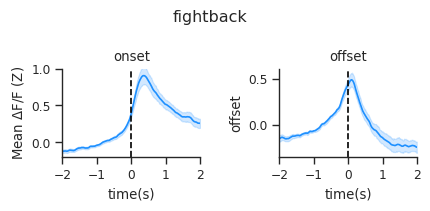

In [104]:
# all mice
fig, axes = plt.subplots(1, 2, figsize=(4.5, 2.1), sharey=False)
fig.suptitle('fightback')
sns.lineplot(ax=axes[0],data=fightback_timecourse_avged_df, x='t',y='onset', ci=68,color='dodgerblue')
axes[0].set_xlabel('time(s)')
axes[0].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[0].set_title('onset')
axes[0].axvline(x=0,color='k',linestyle='--')
axes[0].set(xlim=(-2, 2))
axes[0].set(ylim=(-0.2, 1))
axes[0].set(xticks=range(-2, 3, 1))#, xticklabels=['a', 'b', 'c', 'd', 'e'])
axes[0].set_facecolor("white")
sns.despine()

sns.lineplot(ax=axes[1],data=fightback_timecourse_avged_df, x='t', y='offset', ci=68,color='dodgerblue')
axes[1].set_xlabel('time(s)')
#axes[1].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[1].set_title('offset')
axes[1].axvline(x=0,color='k',linestyle='--')
axes[1] = plt.gca()
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set(xlim=(-2, 2))
axes[1].set(xticks=range(-2, 3, 1))#, xticklabels=['a', 'b', 'c', 'd', 'e'])
axes[1].set_facecolor("white")
#plt.title('offset')

# plt.savefig('attackall.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

close proximity LHb 261 339
196
10 11
onset 1 -1.1895144042085588 0.24889038097475125
10 11
onset 2 -1.4567139738511585 0.16152365485760042
9 11
onset 3 -1.7059823468416686 0.10520624180182321
10 10
onset 4 -1.7243117188064203 0.10178219832258022
8 10
onset 5 -1.8016407746197973 0.09047475117977812
10 9
onset 6 -1.445493381989934 0.1665022156894402
8 10
onset 7 -0.9928237151275399 0.33557421848026314
8 11
onset 8 -0.6157396906378142 0.5462225848784981
10 10
onset 9 -1.4490534374781479 0.1645210768260821
10 10
onset 10 -1.2237963838571901 0.23680754224613268
onset [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  196
Model:                                 GEE   No. clusters:                       21
Method:                        Generalized   Min. cluster size:                   6
                      Estimating

<Figure size 1000x1000 with 0 Axes>

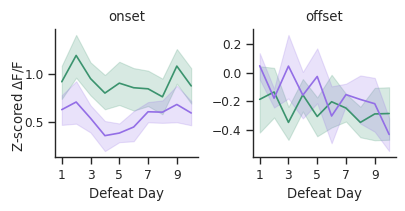

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  196
Model:                                 GEE   No. clusters:                       21
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                 9.3
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Sat, 27 Apr 2024   Scale:                           0.328
Covariance type:                    robust   Time:                         14:05:53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0386      0.153      6.771      0.000       0.738       1.339
si     

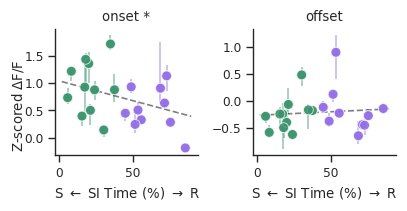

In [327]:
"""
CONSTANTS
"""
#distance = 385
start_time_on = np.where(fightback_timecourse_avged_overall_df['onset']==max(fightback_timecourse_avged_overall_df['onset']))[0][0]-20#229 #300 for prox 
stop_time_on = np.where(fightback_timecourse_avged_overall_df['onset']==max(fightback_timecourse_avged_overall_df['onset']))[0][0]+20#269 #400 for prox   
start_time_off = 300 #254 for prox 
stop_time_off = 400 #304 for prox 

"""
PLOTTING
"""
from statsmodels.stats.multitest import multipletests
#def plot_neural(behavior,preattack2nac,postattack2nac,preattack2ts,postattack2ts,
def plot_neural_both(behavior,preattack2lhb,postattack2lhb,
               lims=[-1.5,1.5],save=False):
    sns.set_context("paper")
    sns.set_style("ticks",{
        'legend.frameon':False
    })
    
    
    ggp=np.array([[0.22953434, 0.57685998, 0.42976558, 1.        ],
                  [0.57609486, 0.42953354, 0.90002989, 1.        ],
       [0.133     , 0.133     , 0.133     , 1.        ],
       ])
    
    boxes=[]
          
        
    ms=[]
    ds=[]
    ls=[]
    ts=[]
    r2sc=[]
    rbs=[]
    
    all_ys={}
    summs=[]
#     for PRE,POST,region,color in zip([preattack2nac,preattack2ts],
#                                      [postattack2nac,postattack2ts],
#                                      ['VTA-NAc','SN-TS'],
#                                      ['dodgerblue','orange']):
    for PRE,POST,region,color in zip([preattack2lhb],
                                     [postattack2lhb],
                                     ['LHb'],
                                     ['dodgerblue']):
        pre_extreme=np.abs(np.row_stack([np.row_stack(PRE[k]) for k in PRE if k[0] in r2s[:RFCUTOFF]])[:,start_time_on:stop_time_on].mean(axis=0)).argmax()+240
        #pre_extreme=np.abs(np.row_stack([np.row_stack(PRE[k]) for k in PRE if k[0] in r2s[:RFCUTOFF]])[:,start_time_on:stop_time_on].mean(axis=0)).argmax()+FS*2
        post_extreme=np.abs(np.row_stack([np.row_stack(POST[k]) for k in POST if k[0] in r2s[:RFCUTOFF]])[:,start_time_off:stop_time_off].mean(axis=0)).argmax()+240
        #post_extreme=np.abs(np.row_stack([np.row_stack(POST[k]) for k in POST if k[0] in r2s[:RFCUTOFF]])[:,start_time_off:stop_time_off].mean(axis=0)).argmax()+FS*2
        print(behavior,region,pre_extreme,post_extreme)
        ms=[]
        ds=[]
        ls=[]
        ts=[]
        r2sc=[]
        rbs=[]
        m2weights={}
        j=0
        ys=[[[],[]],[[],[]],[[],[]]]
        noverdays=[]
    
        these_sis=[]

        for j,m in enumerate(r2s):
            i=int(j>RFCUTOFF)

            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            ons1=[]
            offs1=[]
            for d in range(1,11):
                k=(m,d)
                #if k not in postattack2nac:
                if k not in postattack2lhb:
                    continue
                ons1.append(PRE[k])
                offs1.append(POST[k])
                
                ms.append(m)
                ds.append(d)
                ls.append('onset')
                #ts.append(np.row_stack(PRE[k])[:,(pre_extreme-30):(pre_extreme+30)].mean()) #Anna: assuming 30 is FS/4?
                ts.append(np.row_stack(PRE[k])[:,(pre_extreme-25):(pre_extreme+25)].mean())
                r2sc.append(j)
                rbs.append(i)
                ms.append(m)
                ds.append(d)
                ls.append('offset')
                #ts.append(np.row_stack(POST[k])[:,(post_extreme-30):(post_extreme+30)].mean())
                ts.append(np.row_stack(POST[k])[:,(post_extreme-25):(post_extreme+25)].mean())
                r2sc.append(j)
                rbs.append(i)
                
            if len(ons1)==0:
                print(m)
                continue


        df=pd.DataFrame({'m':ms,'d':ds,'c':ls,'t':ts,'r2s':r2sc,'rb':rbs})

        df['si']=[SI_values[i] for i in df.r2s]
        df['sex']='male'

        s=make_behavior_plots(df,offset=0.5,ylabel='Z-scored $\Delta$F/F',
                              order=['onset','offset'],aspect=1.1,height=2.2)
        summs.append(s)
    return(summs,df)

FS=100
for behavior in ['close proximity']:
    #preattack2nac={}
    #postattack2nac={}
    preattack2lhb={}
    postattack2lhb={}
    #preattack2ts={}
    #postattack2ts={}
    preXs={}
    postXs={}
    span=2*FS
    sns.set_style("ticks")

    for m in r2s:
        #if m ==30 or m in BAD_NAC:
        if m ==30 or m in BAD_LHb:
            continue
        ims={('LHb','onset'):[],
             ('LHb','offset'):[]}
            #('VTA-NAc','onset'):[],
             #('SN-TS','onset'):[],
             #('VTA-NAc','offset'):[],
             #('SN-TS','offset'):[]}
        for d in range(1,11):
            k=(m,d)
            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            if k in BAD_SESSIONS:
                continue
            #if k not in rf_scores or 'fpnac_samp' not in alldat[k]:
            #if k not in rf_scores or 'fp_lhb_samp' not in alldat[k]:
            if k not in rf_scores or 'no_filt' not in alldat[k]:
                continue
                
            #attack=(alldat[k]['body_part_tracking']['TopBetweenCentroidDistance']<distance).astype(int)#SHOULD BE #322 120 #Anna: change to 5 as it is in cm
            attack=(rf_scores_new[k]['f']==True).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm
            #attack=(labels[k]==5).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm

            if not np.sum(attack):
                continue
            starts = np.where(attack[1:]-attack[:-1]==1)[0]
            sparse_starts= [a for i,a in enumerate(starts) if np.sum(attack[a-FS*sparse_time:a])==0]

            ends = np.where(attack[:-1]-attack[1:]==1)[0]
            sparse_ends= [a for i,a in enumerate(ends) if np.sum(attack[a+1:a+FS*sparse_time])==0]

            #before=np.array([(np.arange(start-span,start+span)/FS*FP_FS).astype(int) for start in sparse_starts if (start+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])
            #after=np.array([(np.arange(end-span,end+span)/FS*FP_FS).astype(int) for end in sparse_ends if end-span>0 and (end+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])

            #before=np.array([(np.arange(start-span,start+span)).astype(int) for start in sparse_starts if (start+span)<len(alldat[k]['fp_lhb_samp'])])
            before=np.array([(np.arange(start-span,start+span)).astype(int) for start in sparse_starts if (start+span)<len(alldat[k]['no_filt'])])
            #after=np.array([(np.arange(end-span,end+span)).astype(int) for end in sparse_ends if end-span>0 and (end+span)<len(alldat[k]['fp_lhb_samp'])])
            after=np.array([(np.arange(end-span,end+span)).astype(int) for end in sparse_ends if end-span>0 and (end+span)<len(alldat[k]['no_filt'])])
            
            if not len(before) or not len(after):
                continue
            #preattack2nac[k]=[alldat[k]['fpnac_samp'][b]-alldat[k]['fpnac_samp'][b][:span].mean() for b in before]
            #postattack2nac[k]=[alldat[k]['fpnac_samp'][a]-alldat[k]['fpnac_samp'][a][:span].mean() for a in after]
            #preattack2ts[k]=[alldat[k]['fpts_samp'][b]-alldat[k]['fpts_samp'][b][:span].mean() for b in before]
            #postattack2ts[k]=[alldat[k]['fpts_samp'][a]-alldat[k]['fpts_samp'][a][:span].mean() for a in after]
            #preattack2lhb[k]=[alldat[k]['fp_lhb_samp'][b]-alldat[k]['fp_lhb_samp'][b][:span].mean() for b in before]
            preattack2lhb[k]=[alldat[k]['no_filt'][b]-alldat[k]['no_filt'][b][:span].mean() for b in before]
            #postattack2lhb[k]=[alldat[k]['fp_lhb_samp'][a]-alldat[k]['fp_lhb_samp'][a][:span].mean() for a in after]
            postattack2lhb[k]=[alldat[k]['no_filt'][a]-alldat[k]['no_filt'][a][:span].mean() for a in after]

            preX=np.zeros((before.shape[0],before.shape[1]))
            postX=np.zeros((before.shape[0],before.shape[1]))
            
#             ims[('VTA-NAc','onset')].append(preattack2nac[k])
#             ims[('VTA-NAc','offset')].append(postattack2nac[k])
#             ims[('SN-TS','onset')].append(preattack2ts[k])
#             ims[('SN-TS','offset')].append(postattack2ts[k])
            ims[('LHb','onset')].append(preattack2lhb[k])
            ims[('LHb','offset')].append(postattack2lhb[k])
    s,dat=plot_neural_both(behavior,preattack2lhb,postattack2lhb,lims=(-1.5,2),
          save=False)

    prox_summary=s
    
# plt.savefig('attackvsSI.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

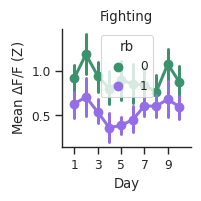

In [310]:
fig, axes = plt.subplots(1, 1, figsize=(2.1, 2.1), sharey=False)
sns.pointplot(data=dat.loc[(dat['c']=='onset')], x="d", y="t", hue="rb",ci=68,palette=pal2,markersize=20,legend=True,)
plt.xlabel('Day')
plt.ylabel('Mean $\Delta$F/F (Z)',va='bottom')
plt.xticks(np.arange(0,10,step=2))
plt.xlim(-1,10)
plt.title('Fighting')
sns.despine()
plt.savefig('fightvsday6s_ugly.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


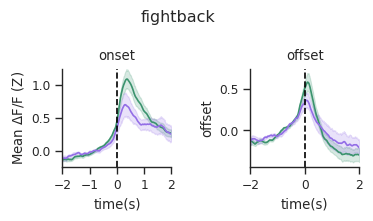

In [106]:
import matplotlib.patches as patches
fig, axes = plt.subplots(1, 2, figsize=(4, 2.2), sharey=False)
fig.suptitle('fightback')
sns.lineplot(ax=axes[0],data=fightback_timecourse_events_df, x='t', y='onset', hue='rb', ci=68,palette=ggp[[1,2]],legend=False)
axes[0].set_xlabel('time(s)')
axes[0].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[0].set_title('onset')
axes[0].axvline(x=0,color='k',linestyle='--')
axes[0].set(xlim=(-2, 2))
axes[0].set(ylim=(-.25, 1.25))
axes[0].set(xticks=range(-2, 3, 1))#, xticklabels=['a', 'b', 'c', 'd', 'e'])
axes[0].set_facecolor("white")
sns.despine()

sns.lineplot(ax=axes[1],data=fightback_timecourse_events_df, x='t', y='offset', hue='rb', ci=68,palette=ggp[[1,2]],legend=False)
axes[1].set_xlabel('time(s)')
#axes[1].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[1].set_title('offset')
axes[1].axvline(x=0,color='k',linestyle='--')
#axes[1] = plt.gca()
axes[1].get_xaxis().set_visible(True)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set(xlim=(-2, 2))
axes[0].set(ylim=(-.25, 1.25))
axes[1].set_facecolor("white")
#plt.title('offset'
# plt.savefig('attackvstime6s.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

In [328]:
fightback_day1 = {'m':[],'onset':[],'r2s':[],'rb':[],'si':[]}
for i,m in enumerate(r2s):
    for d in range(1,2):
        k = (m,d)
        if k in preattack2lhb: 
            fightback_day1['m'].append(m)
            #fightback_days['d'].append(d)
            fightback_day1['onset'].append(np.mean(np.mean(np.array(preattack2lhb[k])[:,start_time_on-5:stop_time_on+5],1)))
            fightback_day1['r2s'].append(i)
            fightback_day1['rb'].append(i>=RFCUTOFF)
            fightback_day1['si'].append(SI_values[i])
fightback_day1_df=pd.DataFrame(fightback_day1)

In [265]:
fightback_alldays = {'m':[],'d':[],'onset':[],'r2s':[],'rb':[],'si':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in preattack2lhb: 
            fightback_alldays['m'].append(m)
            fightback_alldays['d'].append(d)
            fightback_alldays['onset'].append(np.mean(np.mean(np.array(preattack2lhb[k])[:,start_time_on:stop_time_on],1)))
            fightback_alldays['r2s'].append(i)
            fightback_alldays['rb'].append(i>=RFCUTOFF)
            fightback_alldays['si'].append(SI_values[i])
fightback_alldays_df=pd.DataFrame(fightback_alldays)

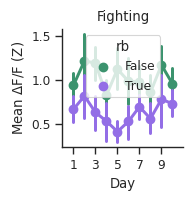

In [266]:
fig, axes = plt.subplots(1, 1, figsize=(2.1, 2.1), sharey=False)
sns.pointplot(data=fightback_alldays_df, x="d", y="onset", hue="rb",ci=68,palette=pal2,markersize=20,legend=True,)
plt.xlabel('Day')
plt.ylabel('Mean $\Delta$F/F (Z)',va='bottom')
plt.xticks(np.arange(0,10,step=2))
plt.xlim(-1,10)
plt.title('Fighting')
sns.despine()
# plt.savefig('fightvsday6s_ugly.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


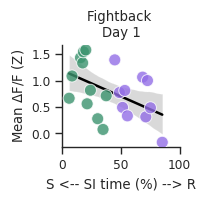

In [337]:
fig, axes = plt.subplots(1, 1, figsize=(2.1, 2.1), sharey=False)
sns.scatterplot(data=fightback_day1_df,y='onset',x='si',hue='rb',
                          legend=False,s=75,ci=68, palette=ggp[[1,2]],alpha=0.8,zorder=500,marker='o')
sns.regplot(data=fightback_day1_df, x='si', y='onset', scatter=False,color='k')
plt.xlabel('S <-- SI time (%) --> R')
plt.ylabel('Mean $\Delta$F/F (Z)',va='bottom')
plt.xlim(0,100)
plt.title('Fightback \nDay 1')
#plt.set_facecolor("white")
sns.despine()

plt.savefig('fightbackVSday1_ugly.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

In [338]:
r, p = scipy.stats.pearsonr(fightback_day1_df['si'], fightback_day1_df['onset'])
print(p)
print(r)

0.027427672522076486
-0.4806141320487471


In [331]:
sparse_time = 1
FS=100
for behavior in ['close proximity']:
    #preattack2nac={}
    #postattack2nac={}
    preattack2lhb={}
    postattack2lhb={}
    #preattack2ts={}
    #postattack2ts={}
    preXs={}
    postXs={}
    span=2*FS
    sns.set_style("ticks")

    for m in r2s:
        #if m ==30 or m in BAD_NAC:
        if m ==30 or m in BAD_LHb:
            continue
        ims={('LHb','onset'):[],
             ('LHb','offset'):[]}
            #('VTA-NAc','onset'):[],
             #('SN-TS','onset'):[],
             #('VTA-NAc','offset'):[],
             #('SN-TS','offset'):[]}
        for d in range(1,11):
            k=(m,d)
            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            if k in BAD_SESSIONS:
                continue
            #if k not in rf_scores or 'fpnac_samp' not in alldat[k]:
            if k not in rf_scores_new or 'no_filt' not in alldat[k]:
                continue
                
            #attack=(alldat[k]['body_part_tracking']['TopBetweenCentroidDistance']<120).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm
            attack=(rf_scores_new[k]['u']==True).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm

            if not np.sum(attack):
                continue
            starts = np.where(attack[1:]-attack[:-1]==1)[0]
            sparse_starts= [a for i,a in enumerate(starts) if np.sum(attack[a-FS*sparse_time:a])==0]

            ends = np.where(attack[:-1]-attack[1:]==1)[0]
            sparse_ends= [a for i,a in enumerate(ends) if np.sum(attack[a+1:a+FS*sparse_time])==0]

            #before=np.array([(np.arange(start-span,start+span)/FS*FP_FS).astype(int) for start in sparse_starts if (start+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])
            #after=np.array([(np.arange(end-span,end+span)/FS*FP_FS).astype(int) for end in sparse_ends if end-span>0 and (end+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])

            before=np.array([(np.arange(start-span,start+span)).astype(int) for start in sparse_starts if (start+span)<len(alldat[k]['no_filt'])])
            after=np.array([(np.arange(end-span,end+span)).astype(int) for end in sparse_ends if end-span>0 and (end+span)<len(alldat[k]['no_filt'])])
            
            if not len(before) or not len(after):
                continue
            #preattack2nac[k]=[alldat[k]['fpnac_samp'][b]-alldat[k]['fpnac_samp'][b][:span].mean() for b in before]
            #postattack2nac[k]=[alldat[k]['fpnac_samp'][a]-alldat[k]['fpnac_samp'][a][:span].mean() for a in after]
            #preattack2ts[k]=[alldat[k]['fpts_samp'][b]-alldat[k]['fpts_samp'][b][:span].mean() for b in before]
            #postattack2ts[k]=[alldat[k]['fpts_samp'][a]-alldat[k]['fpts_samp'][a][:span].mean() for a in after]
            preattack2lhb[k]=[alldat[k]['no_filt'][b]-alldat[k]['no_filt'][b][:span].mean() for b in before]
            #preattack2lhb[k]=[alldat[k]['fp_lhb_samp'][b] for b in before]
            postattack2lhb[k]=[alldat[k]['no_filt'][a]-alldat[k]['no_filt'][a][:span].mean() for a in after]
            #postattack2lhb[k]=[alldat[k]['fp_lhb_samp'][a] for a in after]

            preX=np.zeros((before.shape[0],before.shape[1]))
            postX=np.zeros((before.shape[0],before.shape[1]))
            
#             ims[('VTA-NAc','onset')].append(preattack2nac[k])
#             ims[('VTA-NAc','offset')].append(postattack2nac[k])
#             ims[('SN-TS','onset')].append(preattack2ts[k])
#             ims[('SN-TS','offset')].append(postattack2ts[k])
            ims[('LHb','onset')].append(preattack2lhb[k])
            ims[('LHb','offset')].append(postattack2lhb[k])
            
## Place into a dataframe
time = np.arange(-2,2,1/100)

vigilance_timecourse_onset = {'m':[],'d':[],'t':[],'onset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in preattack2lhb: 
            for trial in range(0,len(preattack2lhb[k])):
                for frame in range(0,len(preattack2lhb[k][0])):
                    vigilance_timecourse_onset['m'].append(m)
                    vigilance_timecourse_onset['d'].append(d)
                    vigilance_timecourse_onset['t'].append(time[frame])
                    vigilance_timecourse_onset['onset'].append(preattack2lhb[k][trial][frame])
                    vigilance_timecourse_onset['r2s'].append(i)
                    vigilance_timecourse_onset['rb'].append(i>=RFCUTOFF)
vigilance_timecourse_onset_df=pd.DataFrame(vigilance_timecourse_onset)

vigilance_timecourse_offset = {'m':[],'d':[],'t':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in postattack2lhb: 
            for trial in range(0,len(postattack2lhb[k])):
                for frame in range(0,len(postattack2lhb[k][0])):
                    vigilance_timecourse_offset['m'].append(m)
                    vigilance_timecourse_offset['d'].append(d)
                    vigilance_timecourse_offset['t'].append(time[frame])
                    vigilance_timecourse_offset['offset'].append(postattack2lhb[k][trial][frame])
                    vigilance_timecourse_offset['r2s'].append(i)
                    vigilance_timecourse_offset['rb'].append(i>=RFCUTOFF)
vigilance_timecourse_offset_df=pd.DataFrame(vigilance_timecourse_offset)

## Average across all events and days at once (per mouse)
vigilance_timecourse_events = {'m':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        mouse_alldays_onset = []
        mouse_alldays_offset = []
        for d in range(1,11):
            k = (m,d)
            #if k not in BAD_SESSIONS:
            if k in preattack2lhb:
                mouse_alldays_onset.append(np.array(preattack2lhb[k][:]))
                mouse_alldays_offset.append(np.array(postattack2lhb[k][:]))
        mouse_alldays_onset_concat =  mouse_alldays_onset[0]
        mouse_alldays_offset_concat =  mouse_alldays_offset[0]
        for session in range(1,len(mouse_alldays_onset)-1):
            mouse_alldays_onset_concat =np.concatenate((mouse_alldays_onset_concat,mouse_alldays_onset[session]))
            mouse_alldays_offset_concat =np.concatenate((mouse_alldays_offset_concat,mouse_alldays_offset[session]))                
        mouse_alldays_onset_avg = np.mean(mouse_alldays_onset_concat,0) #average across all sessions and all days at once
        mouse_alldays_offset_avg = np.mean(mouse_alldays_offset_concat,0) #average across all sessions and all days at once

        # place into dataframe        
        for frame in range(0,len(time)):
            vigilance_timecourse_events['m'].append(m)
            vigilance_timecourse_events['t'].append(time[frame])
            vigilance_timecourse_events['onset'].append(mouse_alldays_onset_avg[frame])
            vigilance_timecourse_events['offset'].append(mouse_alldays_offset_avg[frame])
            vigilance_timecourse_events['r2s'].append(i)
            vigilance_timecourse_events['rb'].append(i>=RFCUTOFF)
vigilance_timecourse_events_df=pd.DataFrame(vigilance_timecourse_events)

## Average across day (per mouse)
vigilance_timecourse_day_avged = {'m':[],'d':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        for d in range(1,11):
            mouse_dayavg_onset = []
            mouse_dayavg_offset = []
            k = (m,d)
            #if k not in BAD_SESSIONS:
            if k in preattack2lhb:
                mouse_dayavg_onset.append(np.mean(preattack2lhb[k],0))
                mouse_dayavg_offset.append(np.mean(postattack2lhb[k],0))
                for frame in range(0,len(time)):
                    vigilance_timecourse_day_avged['m'].append(m)
                    vigilance_timecourse_day_avged['d'].append(d)
                    vigilance_timecourse_day_avged['t'].append(time[frame])
                    vigilance_timecourse_day_avged['onset'].append(mouse_dayavg_onset[0][frame])
                    vigilance_timecourse_day_avged['offset'].append(mouse_dayavg_offset[0][frame])
                    vigilance_timecourse_day_avged['r2s'].append(i)
                    vigilance_timecourse_day_avged['rb'].append(i>=RFCUTOFF)
vigilance_timecourse_day_avged_df=pd.DataFrame(vigilance_timecourse_day_avged)

## Average across day avgs to get one avg per mouse
vigilance_timecourse_avged = {'m':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        mouse_dayavg_onset = []
        mouse_dayavg_offset = []
        for d in range(1,11):
            k = (m,d)
            #if k not in BAD_SESSIONS:
            if k in preattack2lhb:
                mouse_dayavg_onset.append(np.mean(preattack2lhb[k],0))
                mouse_dayavg_offset.append(np.mean(postattack2lhb[k],0))
        mouse_dayavg_onset_avg = np.mean(mouse_dayavg_onset,0)
        mouse_dayavg_offset_avg = np.mean(mouse_dayavg_offset,0)
# place into dataframe            
        for frame in range(0,len(time)):
            vigilance_timecourse_avged['m'].append(m)
            vigilance_timecourse_avged['t'].append(time[frame])
            vigilance_timecourse_avged['onset'].append(mouse_dayavg_onset_avg[frame])
            vigilance_timecourse_avged['offset'].append(mouse_dayavg_offset_avg[frame])
            vigilance_timecourse_avged['r2s'].append(i)
            vigilance_timecourse_avged['rb'].append(i>=RFCUTOFF)
vigilance_timecourse_avged_df=pd.DataFrame(vigilance_timecourse_avged)

## Average across all mice to get peaks
vigilance_timecourse_avged_overall = {'t':[],'onset':[],'offset':[]}
for frame in range(0,len(time)):
    vigilance_timecourse_avged_overall['t'].append(time[frame])
    vigilance_timecourse_avged_overall['onset'].append(vigilance_timecourse_day_avged_df.loc[vigilance_timecourse_day_avged['t']==time[frame], 'onset'].mean())
    vigilance_timecourse_avged_overall['offset'].append(vigilance_timecourse_day_avged_df.loc[vigilance_timecourse_day_avged['t']==time[frame], 'offset'].mean())
vigilance_timecourse_avged_overall_df=pd.DataFrame(vigilance_timecourse_avged_overall)

close proximity LHb 274 249
194
10 11
onset 1 2.125895802371729 0.04684321733473176
10 11
onset 2 0.7184006761824399 0.4812520222897838
9 11
onset 3 1.112144455350893 0.2807097194028426
10 10
onset 4 0.9670028798393835 0.34635669234596544
7 10
onset 5 2.5425345624700153 0.022528840628178566
10 9
onset 6 -1.2253012421714875 0.2371677195679665
8 10
onset 7 1.6687615702127114 0.11461165760858177
8 11
onset 8 1.5089181088609243 0.14968050488621587
10 10
onset 9 0.6356623658323997 0.5329956702078178
10 9
onset 10 1.5706392378887215 0.1346915268024846
onset [False False False False False False False False False False]
                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  194
Model:                                 GEE   No. clusters:                       21
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equations  

<Figure size 1000x1000 with 0 Axes>

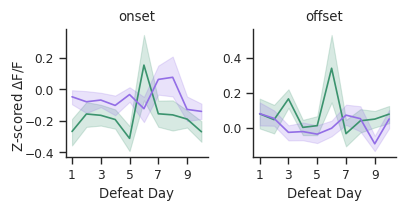

                               GEE Regression Results                              
Dep. Variable:                           t   No. Observations:                  194
Model:                                 GEE   No. clusters:                       21
Method:                        Generalized   Min. cluster size:                   6
                      Estimating Equations   Max. cluster size:                  10
Family:                           Gaussian   Mean cluster size:                 9.2
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Sat, 27 Apr 2024   Scale:                           0.077
Covariance type:                    robust   Time:                         14:06:57
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2139      0.053     -4.044      0.000      -0.318      -0.110
si     

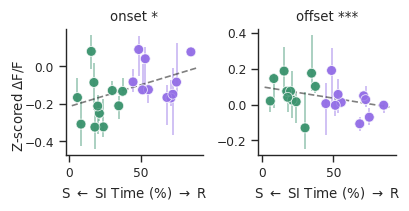

In [332]:
"""
CONSTANTS
"""
#distance = 385
start_time_on = np.where(vigilance_timecourse_avged_overall_df['onset']==min(vigilance_timecourse_avged_overall_df['onset']))[0][0]-20#229 #300 for prox 
stop_time_on = np.where(vigilance_timecourse_avged_overall_df['onset']==min(vigilance_timecourse_avged_overall_df['onset']))[0][0]+20#269 #400 for prox   
start_time_off = 300 #254 for prox 
stop_time_off = 400 #304 for prox 

"""
PLOTTING
"""
from statsmodels.stats.multitest import multipletests
#def plot_neural(behavior,preattack2nac,postattack2nac,preattack2ts,postattack2ts,
def plot_neural_both(behavior,preattack2lhb,postattack2lhb,
               lims=[-1.5,1.5],save=False):
    sns.set_context("paper")
    sns.set_style("ticks",{
        'legend.frameon':False
    })
    
    
    ggp=np.array([[0.22953434, 0.57685998, 0.42976558, 1.        ],
                  [0.57609486, 0.42953354, 0.90002989, 1.        ],
       [0.133     , 0.133     , 0.133     , 1.        ],
       ])
    
    boxes=[]
          
        
    ms=[]
    ds=[]
    ls=[]
    ts=[]
    r2sc=[]
    rbs=[]
    
    all_ys={}
    summs=[]
#     for PRE,POST,region,color in zip([preattack2nac,preattack2ts],
#                                      [postattack2nac,postattack2ts],
#                                      ['VTA-NAc','SN-TS'],
#                                      ['dodgerblue','orange']):
    for PRE,POST,region,color in zip([preattack2lhb],
                                     [postattack2lhb],
                                     ['LHb'],
                                     ['dodgerblue']):
        pre_extreme=np.abs(np.row_stack([np.row_stack(PRE[k]) for k in PRE if k[0] in r2s[:RFCUTOFF]])[:,start_time_on:stop_time_on].mean(axis=0)).argmax()+240
        #pre_extreme=np.abs(np.row_stack([np.row_stack(PRE[k]) for k in PRE if k[0] in r2s[:RFCUTOFF]])[:,start_time_on:stop_time_on].mean(axis=0)).argmax()+FS*2
        post_extreme=np.abs(np.row_stack([np.row_stack(POST[k]) for k in POST if k[0] in r2s[:RFCUTOFF]])[:,start_time_off:stop_time_off].mean(axis=0)).argmax()+240
        #post_extreme=np.abs(np.row_stack([np.row_stack(POST[k]) for k in POST if k[0] in r2s[:RFCUTOFF]])[:,start_time_off:stop_time_off].mean(axis=0)).argmax()+FS*2
        print(behavior,region,pre_extreme,post_extreme)
        ms=[]
        ds=[]
        ls=[]
        ts=[]
        r2sc=[]
        rbs=[]
        m2weights={}
        j=0
        ys=[[[],[]],[[],[]],[[],[]]]
        noverdays=[]
    
        these_sis=[]

        for j,m in enumerate(r2s):
            i=int(j>RFCUTOFF)

            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            ons1=[]
            offs1=[]
            for d in range(1,11):
                k=(m,d)
                #if k not in postattack2nac:
                if k not in postattack2lhb:
                    continue
                ons1.append(PRE[k])
                offs1.append(POST[k])
                
                ms.append(m)
                ds.append(d)
                ls.append('onset')
                #ts.append(np.row_stack(PRE[k])[:,(pre_extreme-30):(pre_extreme+30)].mean()) #Anna: assuming 30 is FS/4?
                ts.append(np.row_stack(PRE[k])[:,(pre_extreme-25):(pre_extreme+25)].mean())
                r2sc.append(j)
                rbs.append(i)
                ms.append(m)
                ds.append(d)
                ls.append('offset')
                #ts.append(np.row_stack(POST[k])[:,(post_extreme-30):(post_extreme+30)].mean())
                ts.append(np.row_stack(POST[k])[:,(post_extreme-25):(post_extreme+25)].mean())
                r2sc.append(j)
                rbs.append(i)
                
            if len(ons1)==0:
                print(m)
                continue


        df=pd.DataFrame({'m':ms,'d':ds,'c':ls,'t':ts,'r2s':r2sc,'rb':rbs})

        df['si']=[SI_values[i] for i in df.r2s]
        df['sex']='male'

        s=make_behavior_plots(df,offset=0.5,ylabel='Z-scored $\Delta$F/F',
                              order=['onset','offset'],aspect=1.1,height=2.2)
        summs.append(s)
    return(summs,df)

FS=100
for behavior in ['close proximity']:
    #preattack2nac={}
    #postattack2nac={}
    preattack2lhb={}
    postattack2lhb={}
    #preattack2ts={}
    #postattack2ts={}
    preXs={}
    postXs={}
    span=2*FS
    sns.set_style("ticks")

    for m in r2s:
        #if m ==30 or m in BAD_NAC:
        if m ==30 or m in BAD_LHb:
            continue
        ims={('LHb','onset'):[],
             ('LHb','offset'):[]}
            #('VTA-NAc','onset'):[],
             #('SN-TS','onset'):[],
             #('VTA-NAc','offset'):[],
             #('SN-TS','offset'):[]}
        for d in range(1,11):
            k=(m,d)
            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            if k in BAD_SESSIONS:
                continue
            #if k not in rf_scores or 'fpnac_samp' not in alldat[k]:
            #if k not in rf_scores or 'fp_lhb_samp' not in alldat[k]:
            if k not in rf_scores or 'no_filt' not in alldat[k]:
                continue
                
            #attack=(alldat[k]['body_part_tracking']['TopBetweenCentroidDistance']<distance).astype(int)#SHOULD BE #322 120 #Anna: change to 5 as it is in cm
            attack=(rf_scores_new[k]['u']==True).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm
            #attack=(labels[k]==5).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm

            if not np.sum(attack):
                continue
            starts = np.where(attack[1:]-attack[:-1]==1)[0]
            sparse_starts= [a for i,a in enumerate(starts) if np.sum(attack[a-FS*sparse_time:a])==0]

            ends = np.where(attack[:-1]-attack[1:]==1)[0]
            sparse_ends= [a for i,a in enumerate(ends) if np.sum(attack[a+1:a+FS*sparse_time])==0]

            #before=np.array([(np.arange(start-span,start+span)/FS*FP_FS).astype(int) for start in sparse_starts if (start+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])
            #after=np.array([(np.arange(end-span,end+span)/FS*FP_FS).astype(int) for end in sparse_ends if end-span>0 and (end+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])

            #before=np.array([(np.arange(start-span,start+span)).astype(int) for start in sparse_starts if (start+span)<len(alldat[k]['fp_lhb_samp'])])
            before=np.array([(np.arange(start-span,start+span)).astype(int) for start in sparse_starts if (start+span)<len(alldat[k]['no_filt'])])
            #after=np.array([(np.arange(end-span,end+span)).astype(int) for end in sparse_ends if end-span>0 and (end+span)<len(alldat[k]['fp_lhb_samp'])])
            after=np.array([(np.arange(end-span,end+span)).astype(int) for end in sparse_ends if end-span>0 and (end+span)<len(alldat[k]['no_filt'])])
            
            if not len(before) or not len(after):
                continue
            #preattack2nac[k]=[alldat[k]['fpnac_samp'][b]-alldat[k]['fpnac_samp'][b][:span].mean() for b in before]
            #postattack2nac[k]=[alldat[k]['fpnac_samp'][a]-alldat[k]['fpnac_samp'][a][:span].mean() for a in after]
            #preattack2ts[k]=[alldat[k]['fpts_samp'][b]-alldat[k]['fpts_samp'][b][:span].mean() for b in before]
            #postattack2ts[k]=[alldat[k]['fpts_samp'][a]-alldat[k]['fpts_samp'][a][:span].mean() for a in after]
            #preattack2lhb[k]=[alldat[k]['fp_lhb_samp'][b]-alldat[k]['fp_lhb_samp'][b][:span].mean() for b in before]
            preattack2lhb[k]=[alldat[k]['no_filt'][b]-alldat[k]['no_filt'][b][:span].mean() for b in before]
            #postattack2lhb[k]=[alldat[k]['fp_lhb_samp'][a]-alldat[k]['fp_lhb_samp'][a][:span].mean() for a in after]
            postattack2lhb[k]=[alldat[k]['no_filt'][a]-alldat[k]['no_filt'][a][:span].mean() for a in after]

            preX=np.zeros((before.shape[0],before.shape[1]))
            postX=np.zeros((before.shape[0],before.shape[1]))
            
#             ims[('VTA-NAc','onset')].append(preattack2nac[k])
#             ims[('VTA-NAc','offset')].append(postattack2nac[k])
#             ims[('SN-TS','onset')].append(preattack2ts[k])
#             ims[('SN-TS','offset')].append(postattack2ts[k])
            ims[('LHb','onset')].append(preattack2lhb[k])
            ims[('LHb','offset')].append(postattack2lhb[k])
    s,dat=plot_neural_both(behavior,preattack2lhb,postattack2lhb,lims=(-1.5,2),
          save=False)

    prox_summary=s
    
# plt.savefig('attackvsSI.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

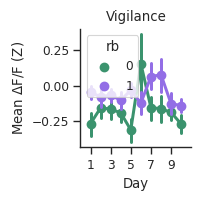

In [313]:
fig, axes = plt.subplots(1, 1, figsize=(2.1, 2.1), sharey=False)
sns.pointplot(data=dat.loc[(dat['c']=='onset')], x="d", y="t", hue="rb",ci=68,palette=pal2,markersize=20,legend=True,)
plt.xlabel('Day')
plt.ylabel('Mean $\Delta$F/F (Z)',va='bottom')
plt.xticks(np.arange(0,10,step=2))
plt.xlim(-1,10)
plt.title('Vigilance')
sns.despine()
plt.savefig('vigilancevsday6s_ugly.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


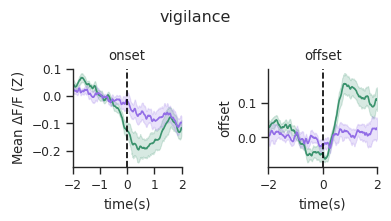

In [124]:
import matplotlib.patches as patches
fig, axes = plt.subplots(1, 2, figsize=(4, 2.2), sharey=False)
fig.suptitle('vigilance')
sns.lineplot(ax=axes[0],data=vigilance_timecourse_events_df, x='t', y='onset', hue='rb', ci=68,palette=ggp[[1,2]],legend=False)
axes[0].set_xlabel('time(s)')
axes[0].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[0].set_title('onset')
axes[0].axvline(x=0,color='k',linestyle='--')
axes[0].set(xlim=(-2, 2))
#axes[0].set(ylim=(-.25, 0.05))
axes[0].set(xticks=range(-2, 3, 1))#, xticklabels=['a', 'b', 'c', 'd', 'e'])
axes[0].set_facecolor("white")
sns.despine()

sns.lineplot(ax=axes[1],data=vigilance_timecourse_events_df, x='t', y='offset', hue='rb', ci=68,palette=ggp[[1,2]],legend=False)
axes[1].set_xlabel('time(s)')
#axes[1].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[1].set_title('offset')
axes[1].axvline(x=0,color='k',linestyle='--')
#axes[1] = plt.gca()
axes[1].get_xaxis().set_visible(True)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set(xlim=(-2, 2))
#axes[1].set(ylim=(-.25, 1.25))
axes[1].set_facecolor("white")
#plt.title('offset'
# plt.savefig('attackvstime6s.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

In [333]:
vigilance_day1 = {'m':[],'onset':[],'r2s':[],'rb':[],'si':[]}
for i,m in enumerate(r2s):
    for d in range(1,2):
        k = (m,d)
        if k in preattack2lhb: 
            vigilance_day1['m'].append(m)
            #vigilance_days['d'].append(d)
            vigilance_day1['onset'].append(np.mean(np.mean(np.array(preattack2lhb[k])[:,start_time_on-5:stop_time_on+5],1)))
            vigilance_day1['r2s'].append(i)
            vigilance_day1['rb'].append(i>=RFCUTOFF)
            vigilance_day1['si'].append(SI_values[i])
vigilance_day1_df=pd.DataFrame(vigilance_day1)

In [269]:
vigilance_alldays = {'m':[],'d':[],'onset':[],'r2s':[],'rb':[],'si':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in preattack2lhb: 
            vigilance_alldays['m'].append(m)
            vigilance_alldays['d'].append(d)
            vigilance_alldays['onset'].append(np.mean(np.mean(np.array(preattack2lhb[k])[:,start_time_on:stop_time_on],1)))
            vigilance_alldays['r2s'].append(i)
            vigilance_alldays['rb'].append(i>=RFCUTOFF)
            vigilance_alldays['si'].append(SI_values[i])
vigilance_alldays_df=pd.DataFrame(vigilance_alldays)

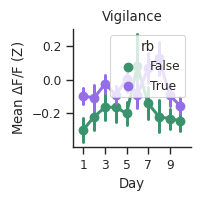

In [270]:
fig, axes = plt.subplots(1, 1, figsize=(2.1, 2.1), sharey=False)
sns.pointplot(data=vigilance_alldays_df, x="d", y="onset", hue="rb",ci=68,palette=pal2,markersize=20,legend=True,)
plt.xlabel('Day')
plt.ylabel('Mean $\Delta$F/F (Z)',va='bottom')
plt.xticks(np.arange(0,10,step=2))
plt.xlim(-1,10)
plt.title('Vigilance')
sns.despine()
# plt.savefig('vigilancevsday6s_ugly.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')

/usr/people/az3/.conda/envs/RF_anna/lib/python3.7/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


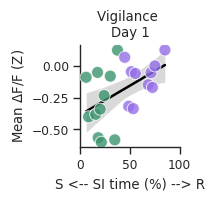

In [336]:
fig, axes = plt.subplots(1, 1, figsize=(2.1, 2.1), sharey=False)
sns.scatterplot(data=vigilance_day1_df,y='onset',x='si',hue='rb',
                          legend=False,s=75,ci=68, palette=ggp[[1,2]],alpha=0.8,zorder=500,marker='o')
sns.regplot(data=vigilance_day1_df, x='si', y='onset', scatter=False,color='k')
plt.xlabel('S <-- SI time (%) --> R')
plt.ylabel('Mean $\Delta$F/F (Z)',va='bottom')
plt.xlim(0,100)
plt.title('Vigilance \nDay 1')
#plt.set_facecolor("white")
sns.despine()

plt.savefig('vigilanceVSday1_ugly.pdf',transparent=True,dpi=300,
                    bbox_inches='tight')

In [335]:
r, p = scipy.stats.pearsonr(vigilance_day1_df['si'], vigilance_day1_df['onset'])
print(p)
print(r)

0.022405416382063902
0.4953717620856509


In [95]:
sparse_time = 6
FS=100
for behavior in ['close proximity']:
    #preattack2nac={}
    #postattack2nac={}
    preattack2lhb={}
    postattack2lhb={}
    #preattack2ts={}
    #postattack2ts={}
    preXs={}
    postXs={}
    span=2*FS
    sns.set_style("ticks")

    for m in r2s:
        #if m ==30 or m in BAD_NAC:
        if m ==30 or m in BAD_LHb:
            continue
        ims={('LHb','onset'):[],
             ('LHb','offset'):[]}
            #('VTA-NAc','onset'):[],
             #('SN-TS','onset'):[],
             #('VTA-NAc','offset'):[],
             #('SN-TS','offset'):[]}
        for d in range(1,11):
            k=(m,d)
            #if m in BAD_NAC:
            if m in BAD_LHb:
                continue
            if k in BAD_SESSIONS:
                continue
            #if k not in rf_scores or 'fpnac_samp' not in alldat[k]:
            if k not in rf_scores_new or 'no_filt' not in alldat[k]:
                continue
                
            #attack=(alldat[k]['body_part_tracking']['TopBetweenCentroidDistance']<120).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm
            attack=(rf_scores_new[k]['s']==True).astype(int)#SHOULD BE 120 #Anna: change to 5 as it is in cm

            if not np.sum(attack):
                continue
            starts = np.where(attack[1:]-attack[:-1]==1)[0]
            sparse_starts= [a for i,a in enumerate(starts) if np.sum(attack[a-FS*sparse_time:a])==0]

            ends = np.where(attack[:-1]-attack[1:]==1)[0]
            sparse_ends= [a for i,a in enumerate(ends) if np.sum(attack[a+1:a+FS*sparse_time])==0]

            #before=np.array([(np.arange(start-span,start+span)/FS*FP_FS).astype(int) for start in sparse_starts if (start+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])
            #after=np.array([(np.arange(end-span,end+span)/FS*FP_FS).astype(int) for end in sparse_ends if end-span>0 and (end+span)/FS*FP_FS<len(alldat[k]['fpnac_samp'])])

            before=np.array([(np.arange(start-span,start+span)).astype(int) for start in sparse_starts if (start+span)<len(alldat[k]['no_filt'])])
            after=np.array([(np.arange(end-span,end+span)).astype(int) for end in sparse_ends if end-span>0 and (end+span)<len(alldat[k]['no_filt'])])
            
            if not len(before) or not len(after):
                continue
            #preattack2nac[k]=[alldat[k]['fpnac_samp'][b]-alldat[k]['fpnac_samp'][b][:span].mean() for b in before]
            #postattack2nac[k]=[alldat[k]['fpnac_samp'][a]-alldat[k]['fpnac_samp'][a][:span].mean() for a in after]
            #preattack2ts[k]=[alldat[k]['fpts_samp'][b]-alldat[k]['fpts_samp'][b][:span].mean() for b in before]
            #postattack2ts[k]=[alldat[k]['fpts_samp'][a]-alldat[k]['fpts_samp'][a][:span].mean() for a in after]
            preattack2lhb[k]=[alldat[k]['no_filt'][b]-alldat[k]['no_filt'][b][:span].mean() for b in before]
            #preattack2lhb[k]=[alldat[k]['fp_lhb_samp'][b] for b in before]
            postattack2lhb[k]=[alldat[k]['no_filt'][a]-alldat[k]['no_filt'][a][:span].mean() for a in after]
            #postattack2lhb[k]=[alldat[k]['fp_lhb_samp'][a] for a in after]

            preX=np.zeros((before.shape[0],before.shape[1]))
            postX=np.zeros((before.shape[0],before.shape[1]))
            
#             ims[('VTA-NAc','onset')].append(preattack2nac[k])
#             ims[('VTA-NAc','offset')].append(postattack2nac[k])
#             ims[('SN-TS','onset')].append(preattack2ts[k])
#             ims[('SN-TS','offset')].append(postattack2ts[k])
            ims[('LHb','onset')].append(preattack2lhb[k])
            ims[('LHb','offset')].append(postattack2lhb[k])
            
## Place into a dataframe
time = np.arange(-2,2,1/100)

sniff_timecourse_onset = {'m':[],'d':[],'t':[],'onset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in preattack2lhb: 
            for trial in range(0,len(preattack2lhb[k])):
                for frame in range(0,len(preattack2lhb[k][0])):
                    sniff_timecourse_onset['m'].append(m)
                    sniff_timecourse_onset['d'].append(d)
                    sniff_timecourse_onset['t'].append(time[frame])
                    sniff_timecourse_onset['onset'].append(preattack2lhb[k][trial][frame])
                    sniff_timecourse_onset['r2s'].append(i)
                    sniff_timecourse_onset['rb'].append(i>=RFCUTOFF)
sniff_timecourse_onset_df=pd.DataFrame(sniff_timecourse_onset)

sniff_timecourse_offset = {'m':[],'d':[],'t':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    for d in range(1,11):
        k = (m,d)
        if k in postattack2lhb: 
            for trial in range(0,len(postattack2lhb[k])):
                for frame in range(0,len(postattack2lhb[k][0])):
                    sniff_timecourse_offset['m'].append(m)
                    sniff_timecourse_offset['d'].append(d)
                    sniff_timecourse_offset['t'].append(time[frame])
                    sniff_timecourse_offset['offset'].append(postattack2lhb[k][trial][frame])
                    sniff_timecourse_offset['r2s'].append(i)
                    sniff_timecourse_offset['rb'].append(i>=RFCUTOFF)
sniff_timecourse_offset_df=pd.DataFrame(sniff_timecourse_offset)

## Average across all events and days at once (per mouse)
sniff_timecourse_events = {'m':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        mouse_alldays_onset = []
        mouse_alldays_offset = []
        for d in range(1,11):
            k = (m,d)
            #if k not in BAD_SESSIONS:
            if k in preattack2lhb:
                mouse_alldays_onset.append(np.array(preattack2lhb[k][:]))
                mouse_alldays_offset.append(np.array(postattack2lhb[k][:]))
        mouse_alldays_onset_concat =  mouse_alldays_onset[0]
        mouse_alldays_offset_concat =  mouse_alldays_offset[0]
        for session in range(1,len(mouse_alldays_onset)-1):
            mouse_alldays_onset_concat =np.concatenate((mouse_alldays_onset_concat,mouse_alldays_onset[session]))
            mouse_alldays_offset_concat =np.concatenate((mouse_alldays_offset_concat,mouse_alldays_offset[session]))                
        mouse_alldays_onset_avg = np.mean(mouse_alldays_onset_concat,0) #average across all sessions and all days at once
        mouse_alldays_offset_avg = np.mean(mouse_alldays_offset_concat,0) #average across all sessions and all days at once

        # place into dataframe        
        for frame in range(0,len(time)):
            sniff_timecourse_events['m'].append(m)
            sniff_timecourse_events['t'].append(time[frame])
            sniff_timecourse_events['onset'].append(mouse_alldays_onset_avg[frame])
            sniff_timecourse_events['offset'].append(mouse_alldays_offset_avg[frame])
            sniff_timecourse_events['r2s'].append(i)
            sniff_timecourse_events['rb'].append(i>=RFCUTOFF)
sniff_timecourse_events_df=pd.DataFrame(sniff_timecourse_events)

## Average across day (per mouse)
sniff_timecourse_day_avged = {'m':[],'d':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        for d in range(1,11):
            mouse_dayavg_onset = []
            mouse_dayavg_offset = []
            k = (m,d)
            #if k not in BAD_SESSIONS:
            if k in preattack2lhb:
                mouse_dayavg_onset.append(np.mean(preattack2lhb[k],0))
                mouse_dayavg_offset.append(np.mean(postattack2lhb[k],0))
                for frame in range(0,len(time)):
                    sniff_timecourse_day_avged['m'].append(m)
                    sniff_timecourse_day_avged['d'].append(d)
                    sniff_timecourse_day_avged['t'].append(time[frame])
                    sniff_timecourse_day_avged['onset'].append(mouse_dayavg_onset[0][frame])
                    sniff_timecourse_day_avged['offset'].append(mouse_dayavg_offset[0][frame])
                    sniff_timecourse_day_avged['r2s'].append(i)
                    sniff_timecourse_day_avged['rb'].append(i>=RFCUTOFF)
sniff_timecourse_day_avged_df=pd.DataFrame(sniff_timecourse_day_avged)

## Average across day avgs to get one avg per mouse
sniff_timecourse_avged = {'m':[],'t':[],'onset':[],'offset':[],'r2s':[],'rb':[]}
for i,m in enumerate(r2s):
    if m not in BAD_LHb:
        mouse_dayavg_onset = []
        mouse_dayavg_offset = []
        for d in range(1,11):
            k = (m,d)
            #if k not in BAD_SESSIONS:
            if k in preattack2lhb:
                mouse_dayavg_onset.append(np.mean(preattack2lhb[k],0))
                mouse_dayavg_offset.append(np.mean(postattack2lhb[k],0))
        mouse_dayavg_onset_avg = np.mean(mouse_dayavg_onset,0)
        mouse_dayavg_offset_avg = np.mean(mouse_dayavg_offset,0)
# place into dataframe            
        for frame in range(0,len(time)):
            sniff_timecourse_avged['m'].append(m)
            sniff_timecourse_avged['t'].append(time[frame])
            sniff_timecourse_avged['onset'].append(mouse_dayavg_onset_avg[frame])
            sniff_timecourse_avged['offset'].append(mouse_dayavg_offset_avg[frame])
            sniff_timecourse_avged['r2s'].append(i)
            sniff_timecourse_avged['rb'].append(i>=RFCUTOFF)
sniff_timecourse_avged_df=pd.DataFrame(sniff_timecourse_avged)

## Average across all mice to get peaks
sniff_timecourse_avged_overall = {'t':[],'onset':[],'offset':[]}
for frame in range(0,len(time)):
    sniff_timecourse_avged_overall['t'].append(time[frame])
    sniff_timecourse_avged_overall['onset'].append(sniff_timecourse_day_avged_df.loc[sniff_timecourse_day_avged['t']==time[frame], 'onset'].mean())
    sniff_timecourse_avged_overall['offset'].append(sniff_timecourse_day_avged_df.loc[sniff_timecourse_day_avged['t']==time[frame], 'offset'].mean())
sniff_timecourse_avged_overall_df=pd.DataFrame(sniff_timecourse_avged_overall)

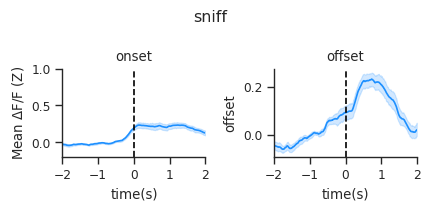

In [129]:
# all mice
fig, axes = plt.subplots(1, 2, figsize=(4.5, 2.1), sharey=False)
fig.suptitle('sniff')
sns.lineplot(ax=axes[0],data=sniff_timecourse_avged_df, x='t',y='onset', ci=68,color='dodgerblue')
axes[0].set_xlabel('time(s)')
axes[0].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[0].set_title('onset')
axes[0].axvline(x=0,color='k',linestyle='--')
axes[0].set(xlim=(-2, 2))
axes[0].set(ylim=(-0.2, 1))
axes[0].set(xticks=range(-2, 3, 1))#, xticklabels=['a', 'b', 'c', 'd', 'e'])
axes[0].set_facecolor("white")
sns.despine()

sns.lineplot(ax=axes[1],data=sniff_timecourse_avged_df, x='t', y='offset', ci=68,color='dodgerblue')
axes[1].set_xlabel('time(s)')
#axes[1].set_ylabel('Mean $\Delta$F/F (Z)',va='bottom')
axes[1].set_title('offset')
axes[1].axvline(x=0,color='k',linestyle='--')
axes[1] = plt.gca()
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set(xlim=(-2, 2))
axes[1].set(xticks=range(-2, 3, 1))#, xticklabels=['a', 'b', 'c', 'd', 'e'])
axes[1].set_facecolor("white")
#plt.title('offset')

# plt.savefig('attackall.pdf',transparent=True,dpi=300,
#                     bbox_inches='tight')